# Sommaire

1. # Import
    - ### Import de la librairie Pandas
    - ### Import du fichier df_final
2. # Itération 1 : (Analyse 7 variables originales avec les outliers)
    - ### ACP : *Normalisation, Variance expliquée, Composantes, Cercles de corrélations, Projection des individus*
    - ### CAH : *Projection des individus avec clusters, Analyse des clusters*
    - ### K-means : *Méthode du coude, Méthode silhouette, Projection des clusters, Projection des centroids, Analyse des clusters*
3. # Itération 2 : (Analyse 12 variables : variables dérivées avec les outliers)
    - ### ACP : *Normalisation, Variance expliquée, Composantes, Cercles de corrélations, Projection des individus*
    - ### CAH : *Projection des individus avec clusters, Analyse des clusters*
    - ### K-means : *Méthode du coude, Méthode silhouette, Projection des clusters, Projection des centroids, Analyse des clusters*
4. # Itération 3 : (Analyse 9 variables originales sans les outliers)
    - ### ACP : *Normalisation, Variance expliquée, Composantes, Cercles de corrélations, Projection des individus*
    - ### CAH : *Projection des individus avec clusters, Analyse des clusters*
    - ### K-means : *Méthode du coude, Méthode silhouette, Projection des clusters, Projection des centroids, Analyse des clusters*

In [1272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import datasets
from sklearn import decomposition, preprocessing
sns.set()
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Suppress FutureWarning messages
import warnings
warnings.filterwarnings('ignore')

In [1273]:
df = pd.read_csv('Data/df_final.csv', index_col=0)

In [1274]:
# Arrondir à deux décimales dans Python Pandas

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [1275]:
df.shape

(153, 13)

In [1276]:
df.head()

Zone  croissance_annuelle  Stabilité politique  \
0     Afghanistan             19034.30                -2.79   
1  Afrique du Sud            380851.44                -0.28   
2         Albanie             13019.73                 0.37   
3         Algérie            170096.99                -0.92   
4       Allemagne           3690849.15                 0.57   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               1.53        
1                                              35.69        
2                                              16.36        
3                                               6.38        
4                                              19.47        

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                               0.54          
1                                              14.11          
2                                               6.26          
3                                               1.97          
4                                               7.96          

   Disponibilité intérieure  Exportations - Quantité  Importations - Quantité  \
0                  57000.00                 -1530.00              -1530000.00   
1                2118000.00                 63000.00              63000000.00   
2                  47000.00                     0.00                     0.00   
3                 277000.00                     0.00                     0.00   
4                1739000.00                646000.00             646000000.00   

   Prod_moyenne_par_personne  Production  Dispo_int_par_personne  \
0                       0.00    28000.00                    0.00   
1                       0.03  1667000.00                    0.04   
2                       0.00    13000.00                    0.02   
3                       0.01   275000.00                    0.01   
4                       0.02  1514000.00                    0.02   

   Nourriture_par_personne  Population  
0                     0.00 36296000.00  
1                     0.04 57009000.00  
2                     0.02  2884000.00  
3                     0.01 41389000.00  
4                     0.02 82658000.00

In [1277]:
# Il y a 3 pays : (États-Unis, Brésil et Inde) avec des valeurs aberrantes 

outliers = df.loc[(df['Zone'] =="États-Unis d\'Amérique") | (df['Zone'] == "Inde")  | (df['Zone'] == "Brésil"), :]
outliers

Zone  croissance_annuelle  Stabilité politique  \
26                  Brésil           2063514.69                -0.48   
75                    Inde           2624329.04                -0.77   
197  États-Unis d'Amérique          19612100.00                 0.26   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
26                                               48.03        
75                                                2.22        
197                                              55.68        

     Disponibilité de protéines en quantité (g/personne/jour)  \
26                                               15.68          
75                                                0.75          
197                                              19.93          

     Disponibilité intérieure  Exportations - Quantité  \
26                 9982000.00               4223000.00   
75                 3661000.00                  4000.00   
197               18266000.00               3692000.00   

     Importations - Quantité  Prod_moyenne_par_personne  Production  \
26             4223000000.00                       0.07 14201000.00   
75                4000000.00                       0.00  3545000.00   
197            3692000000.00                       0.07 21914000.00   

     Dispo_int_par_personne  Nourriture_par_personne    Population  
26                     0.05                     0.05  207833000.00  
75                     0.00                     0.00 1338676000.00  
197                    0.06                     0.06  325084000.00

In [1278]:
# Créer une copie du DF pour des manipulations plus tard

copy_df = df.copy()

In [1279]:
# Utiliser la colonne Zone comme index désormais

df.set_index('Zone', inplace=True)
df.head()

croissance_annuelle  Stabilité politique  \
Zone                                                       
Afghanistan                19034.30                -2.79   
Afrique du Sud            380851.44                -0.28   
Albanie                    13019.73                 0.37   
Algérie                   170096.99                -0.92   
Allemagne                3690849.15                 0.57   

                Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                     
Afghanistan                                                  1.53        
Afrique du Sud                                              35.69        
Albanie                                                     16.36        
Algérie                                                      6.38        
Allemagne                                                   19.47        

                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                       
Afghanistan                                                  0.54          
Afrique du Sud                                              14.11          
Albanie                                                      6.26          
Algérie                                                      1.97          
Allemagne                                                    7.96          

                Disponibilité intérieure  Exportations - Quantité  \
Zone                                                                
Afghanistan                     57000.00                 -1530.00   
Afrique du Sud                2118000.00                 63000.00   
Albanie                         47000.00                     0.00   
Algérie                        277000.00                     0.00   
Allemagne                     1739000.00                646000.00   

                Importations - Quantité  Prod_moyenne_par_personne  \
Zone                                                                 
Afghanistan                 -1530000.00                       0.00   
Afrique du Sud              63000000.00                       0.03   
Albanie                            0.00                       0.00   
Algérie                            0.00                       0.01   
Allemagne                  646000000.00                       0.02   

                Production  Dispo_int_par_personne  Nourriture_par_personne  \
Zone                                                                          
Afghanistan       28000.00                    0.00                     0.00   
Afrique du Sud  1667000.00                    0.04                     0.04   
Albanie           13000.00                    0.02                     0.02   
Algérie          275000.00                    0.01                     0.01   
Allemagne       1514000.00                    0.02                     0.02   

                Population  
Zone                        
Afghanistan    36296000.00  
Afrique du Sud 57009000.00  
Albanie         2884000.00  
Algérie        41389000.00  
Allemagne      82658000.00

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Itération 1 : Analyse avec les 7 variables originales</h2>
</div>

In [1281]:
new_df = df[["Disponibilité alimentaire en quantité (kg/personne/an)", "Disponibilité de protéines en quantité (g/personne/jour)", 
             "Disponibilité intérieure", "Exportations - Quantité", "Production", "Importations - Quantité", "Population"]]  

In [1282]:
new_df

Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                            
Afghanistan                                                         1.53        
Afrique du Sud                                                     35.69        
Albanie                                                            16.36        
Algérie                                                             6.38        
Allemagne                                                          19.47        
...                                                                  ...        
Émirats arabes unis                                                43.47        
Équateur                                                           19.31        
États-Unis d'Amérique                                              55.68        
Éthiopie                                                            0.13        
Îles Salomon                                                        4.45        

                       Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                              
Afghanistan                                                         0.54          
Afrique du Sud                                                     14.11          
Albanie                                                             6.26          
Algérie                                                             1.97          
Allemagne                                                           7.96          
...                                                                  ...          
Émirats arabes unis                                                14.80          
Équateur                                                            6.15          
États-Unis d'Amérique                                              19.93          
Éthiopie                                                            0.04          
Îles Salomon                                                        1.51          

                       Disponibilité intérieure  Exportations - Quantité  \
Zone                                                                       
Afghanistan                            57000.00                 -1530.00   
Afrique du Sud                       2118000.00                 63000.00   
Albanie                                47000.00                     0.00   
Algérie                               277000.00                     0.00   
Allemagne                            1739000.00                646000.00   
...                                         ...                      ...   
Émirats arabes unis                   412000.00                 94000.00   
Équateur                              341000.00                     0.00   
États-Unis d'Amérique               18266000.00               3692000.00   
Éthiopie                               14000.00                   870.00   
Îles Salomon                            3000.00                     0.00   

                       Production  Importations - Quantité   Population  
Zone                                                                     
Afghanistan              28000.00              -1530000.00  36296000.00  
Afrique du Sud         1667000.00              63000000.00  57009000.00  
Albanie                  13000.00                     0.00   2884000.00  
Algérie                 275000.00                     0.00  41389000.00  
Allemagne              1514000.00             646000000.00  82658000.00  
...                           ...                      ...          ...  
Émirats arabes unis      48000.00              94000000.00   9487000.00  
Équateur                340000.00                     0.00  16785000.00  
États-Unis d'Amérique 21914000.00            3692000000.00 325084000.00  
Éthiopie                 14000.00                870000.00 106399000.00  
Îles Salomon

In [1283]:
new_df.shape

(153, 7)

# ACP

In [1285]:
# Réduction de dimensionalité
# Data viz
# Extraction de features

In [1286]:
x = new_df
names = new_df.index
features = new_df.columns

### Scaling (Standardisation)

In [1288]:
# une méthode statistique permettant de placer toutes les variables d'un ensemble de données sur la même échelle

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

### Les composantes

In [1290]:
# On va d'abord voir combien de variances les 6 variables détiennent 

pca = PCA(n_components = 7)

Prin_Components = pca.fit_transform(x_scaled)

In [1291]:
pca.explained_variance_ratio_

array([6.01043481e-01, 2.46759476e-01, 1.20011707e-01, 2.92258691e-02,
       2.48354622e-03, 4.75920758e-04, 6.65410099e-33])

### Screeplot

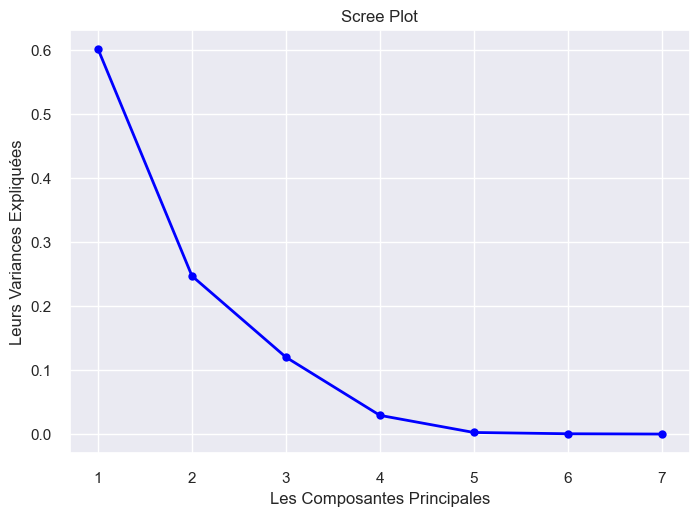

In [1293]:
# On va plotter un scree plot vour visualiser combien chaque composante détient en variance

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Les Composantes Principales')
plt.ylabel('Leurs Variances Expliquées')
plt.show()

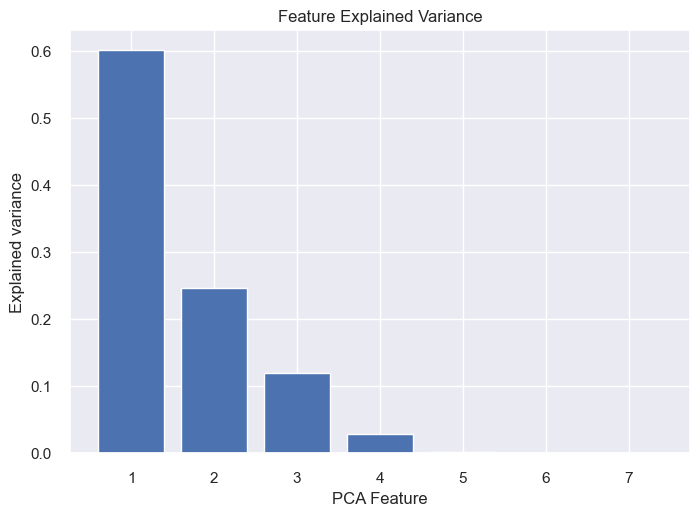

In [1294]:
sns.set()
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

La 1ère composante principale détient 60% de la variance totale.

La 2ème composante principale détient 24% de la variance totale.

In [1296]:
# On constate que les 2 premières composantes ont presque 84% de la variance totale

In [1297]:
pca_2c = PCA(n_components=2)

# Fit et transformer la data
Prin_Components = pca_2c.fit_transform(x_scaled)

Prin_Df = pd.DataFrame(data = Prin_Components, columns = ['PC1', 'PC2'])

In [1298]:
Prin_Df 

PC1   PC2
0   -1.10  1.34
1    1.24 -1.41
2   -0.59 -0.12
3   -0.82  1.01
4    1.67  0.40
..    ...   ...
148  0.63 -2.23
149 -0.38 -0.14
150 17.72  2.73
151 -1.06  1.68
152 -1.06  0.97

[153 rows x 2 columns]

In [1299]:
import plotly.express as px

fig = px.scatter(Prin_Df, x=  Prin_Df["PC1"], y=  Prin_Df["PC2"], color= Prin_Df["PC2"], width=700, height=500)
fig.show()

# Cercle de Corrélation des ACP

In [1301]:
# On définit une fonction qui traçe un cercle de corrélation avec 2 composantes

def correlation_circle(pca, x_y, features):
    x,y = x_y
    fig, ax = plt.subplots(figsize=(10, 9))
    for i in range(0, pca.components_.shape[1]):
        ax.arrow(
            0,0,
            pca.components_[x, i],
            pca.components_[y, i],
            head_width=0.07,
            head_length=0.07,
            width=0.02,
        )
        plt.text(
            pca.components_[x, i] + 0.05,
            pca.components_[y, i] + 0.05,
            features[i]
        )   
    plt.plot([-1, 1], [0,0], color="red", ls="--")
    plt.plot([0,0], [-1, 1], color="green", ls="--")
    plt.xlabel('PC{} ({})%'.format(x+1, round(100*pca.explained_variance_ratio_[x], 1)))
    plt.ylabel('PC{} ({})%'.format(y+1, round(100*pca.explained_variance_ratio_[y], 1)))
    plt.title("Le Cercle des corrélations : (PC{} et PC{})".format(x+1, y+1))
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))
    plt.axis('equal')
    plt.show(block=False)

### PC1 et PC2

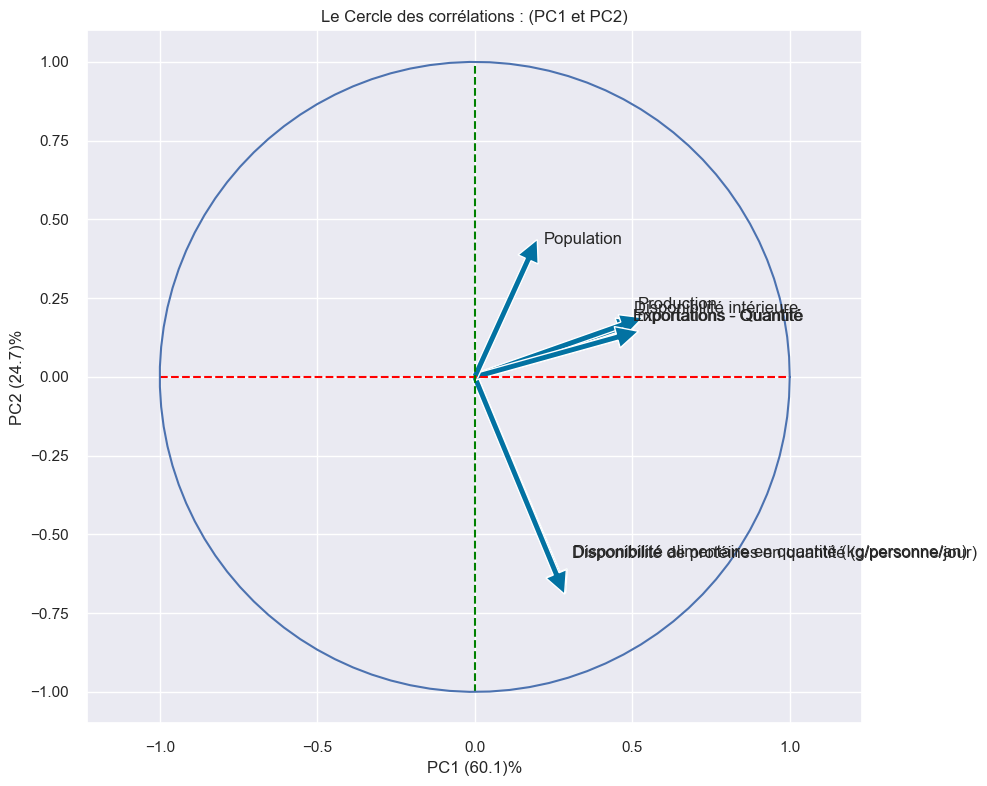

In [1303]:
correlation_circle(pca_2c, (0,1), features)

In [1304]:
# L'idée du cercle de corrélation est de calculer la corrélation de chacune des quatre caractéristiques originales avec les deux composantes principales.
# Par corrélation, ca veut dire le coefficient de corrélation de Pearson, dont la valeur est comprise entre 1 (corrélation parfaite) et -1 
# (anticorrélation parfaite).

Ici, nous constatons que la feature "Population" est très peu corrélées à PC1 mais assez corrélée avec PC2. Aussi les features comme "Production", "Dispo Interieure", "Exportation-Quantité" sont moyennement corrélés avec PC1 et PC2. Finalement, "Disponibilité alimentaire en quantité (kg/personne/an)" est négativement corrélée avec PC2 et peu corrélée positivement avec PC1

### Projection sur individus

In [1307]:
def show_projections(X_projected, x_y, pca=None, labels=None, clusters=None, alpha=1, figsize=[10,8], colors=None, marker="." ):
    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
        
    # Les points    
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, s=100, palette="deep")

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'PC{x+1} {v1}', fontsize=18)
    ax.set_ylabel(f'PC{y+1} {v2}', fontsize=18)

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='16', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur PC{x+1} et PC{y+1})", fontsize=20)
    plt.legend(fontsize='18', title_fontsize='14')
    plt.show()

In [1308]:
x_proj = pca_2c.transform(x_scaled)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


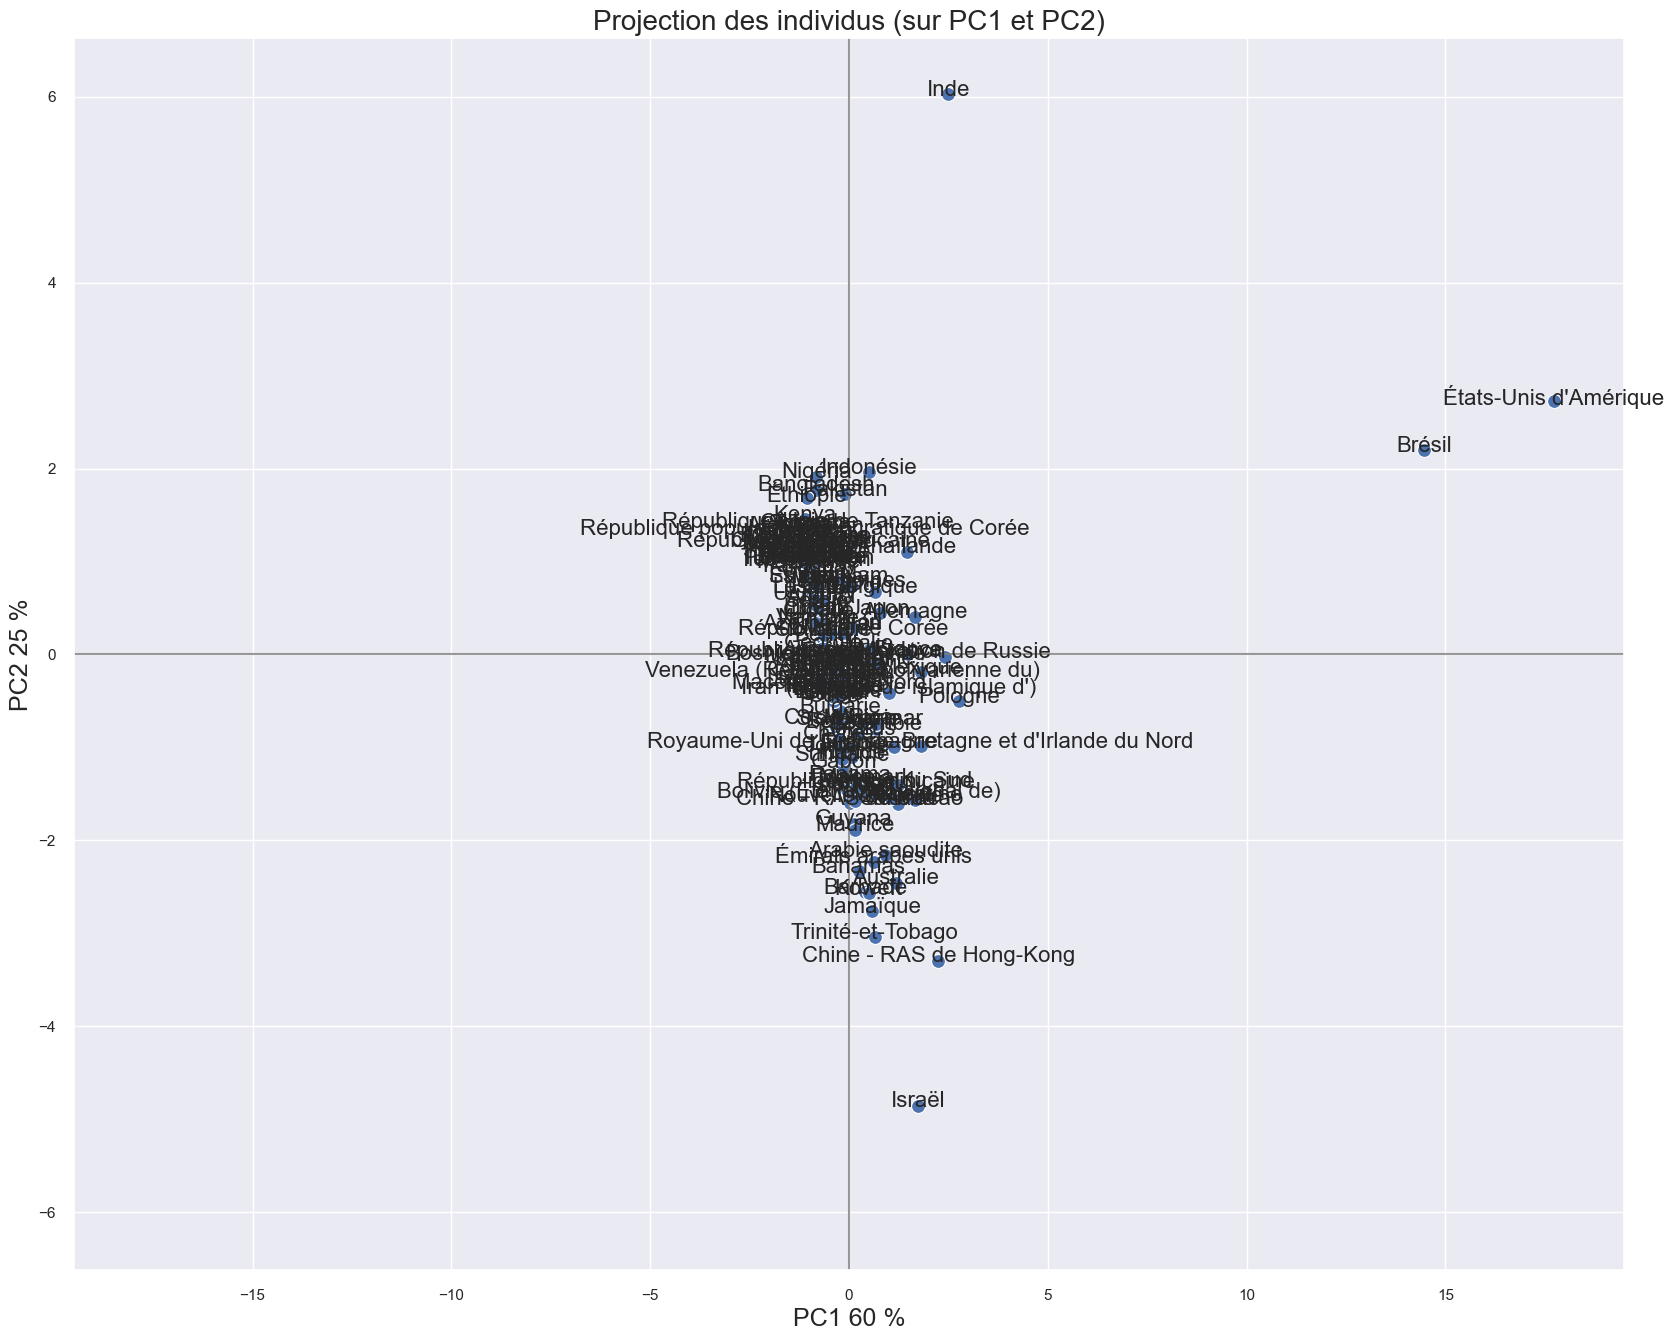

In [1309]:
show_projections(x_proj, (0,1), pca, labels=names, figsize=(20,16), marker="o")

# Classification Agglomérative hierarchique (CAH)

In [1311]:
# On standardise d'abord les données

scaler = StandardScaler()

x_scaled = StandardScaler().fit_transform(x)

In [1312]:
z = linkage(x_scaled, "ward")

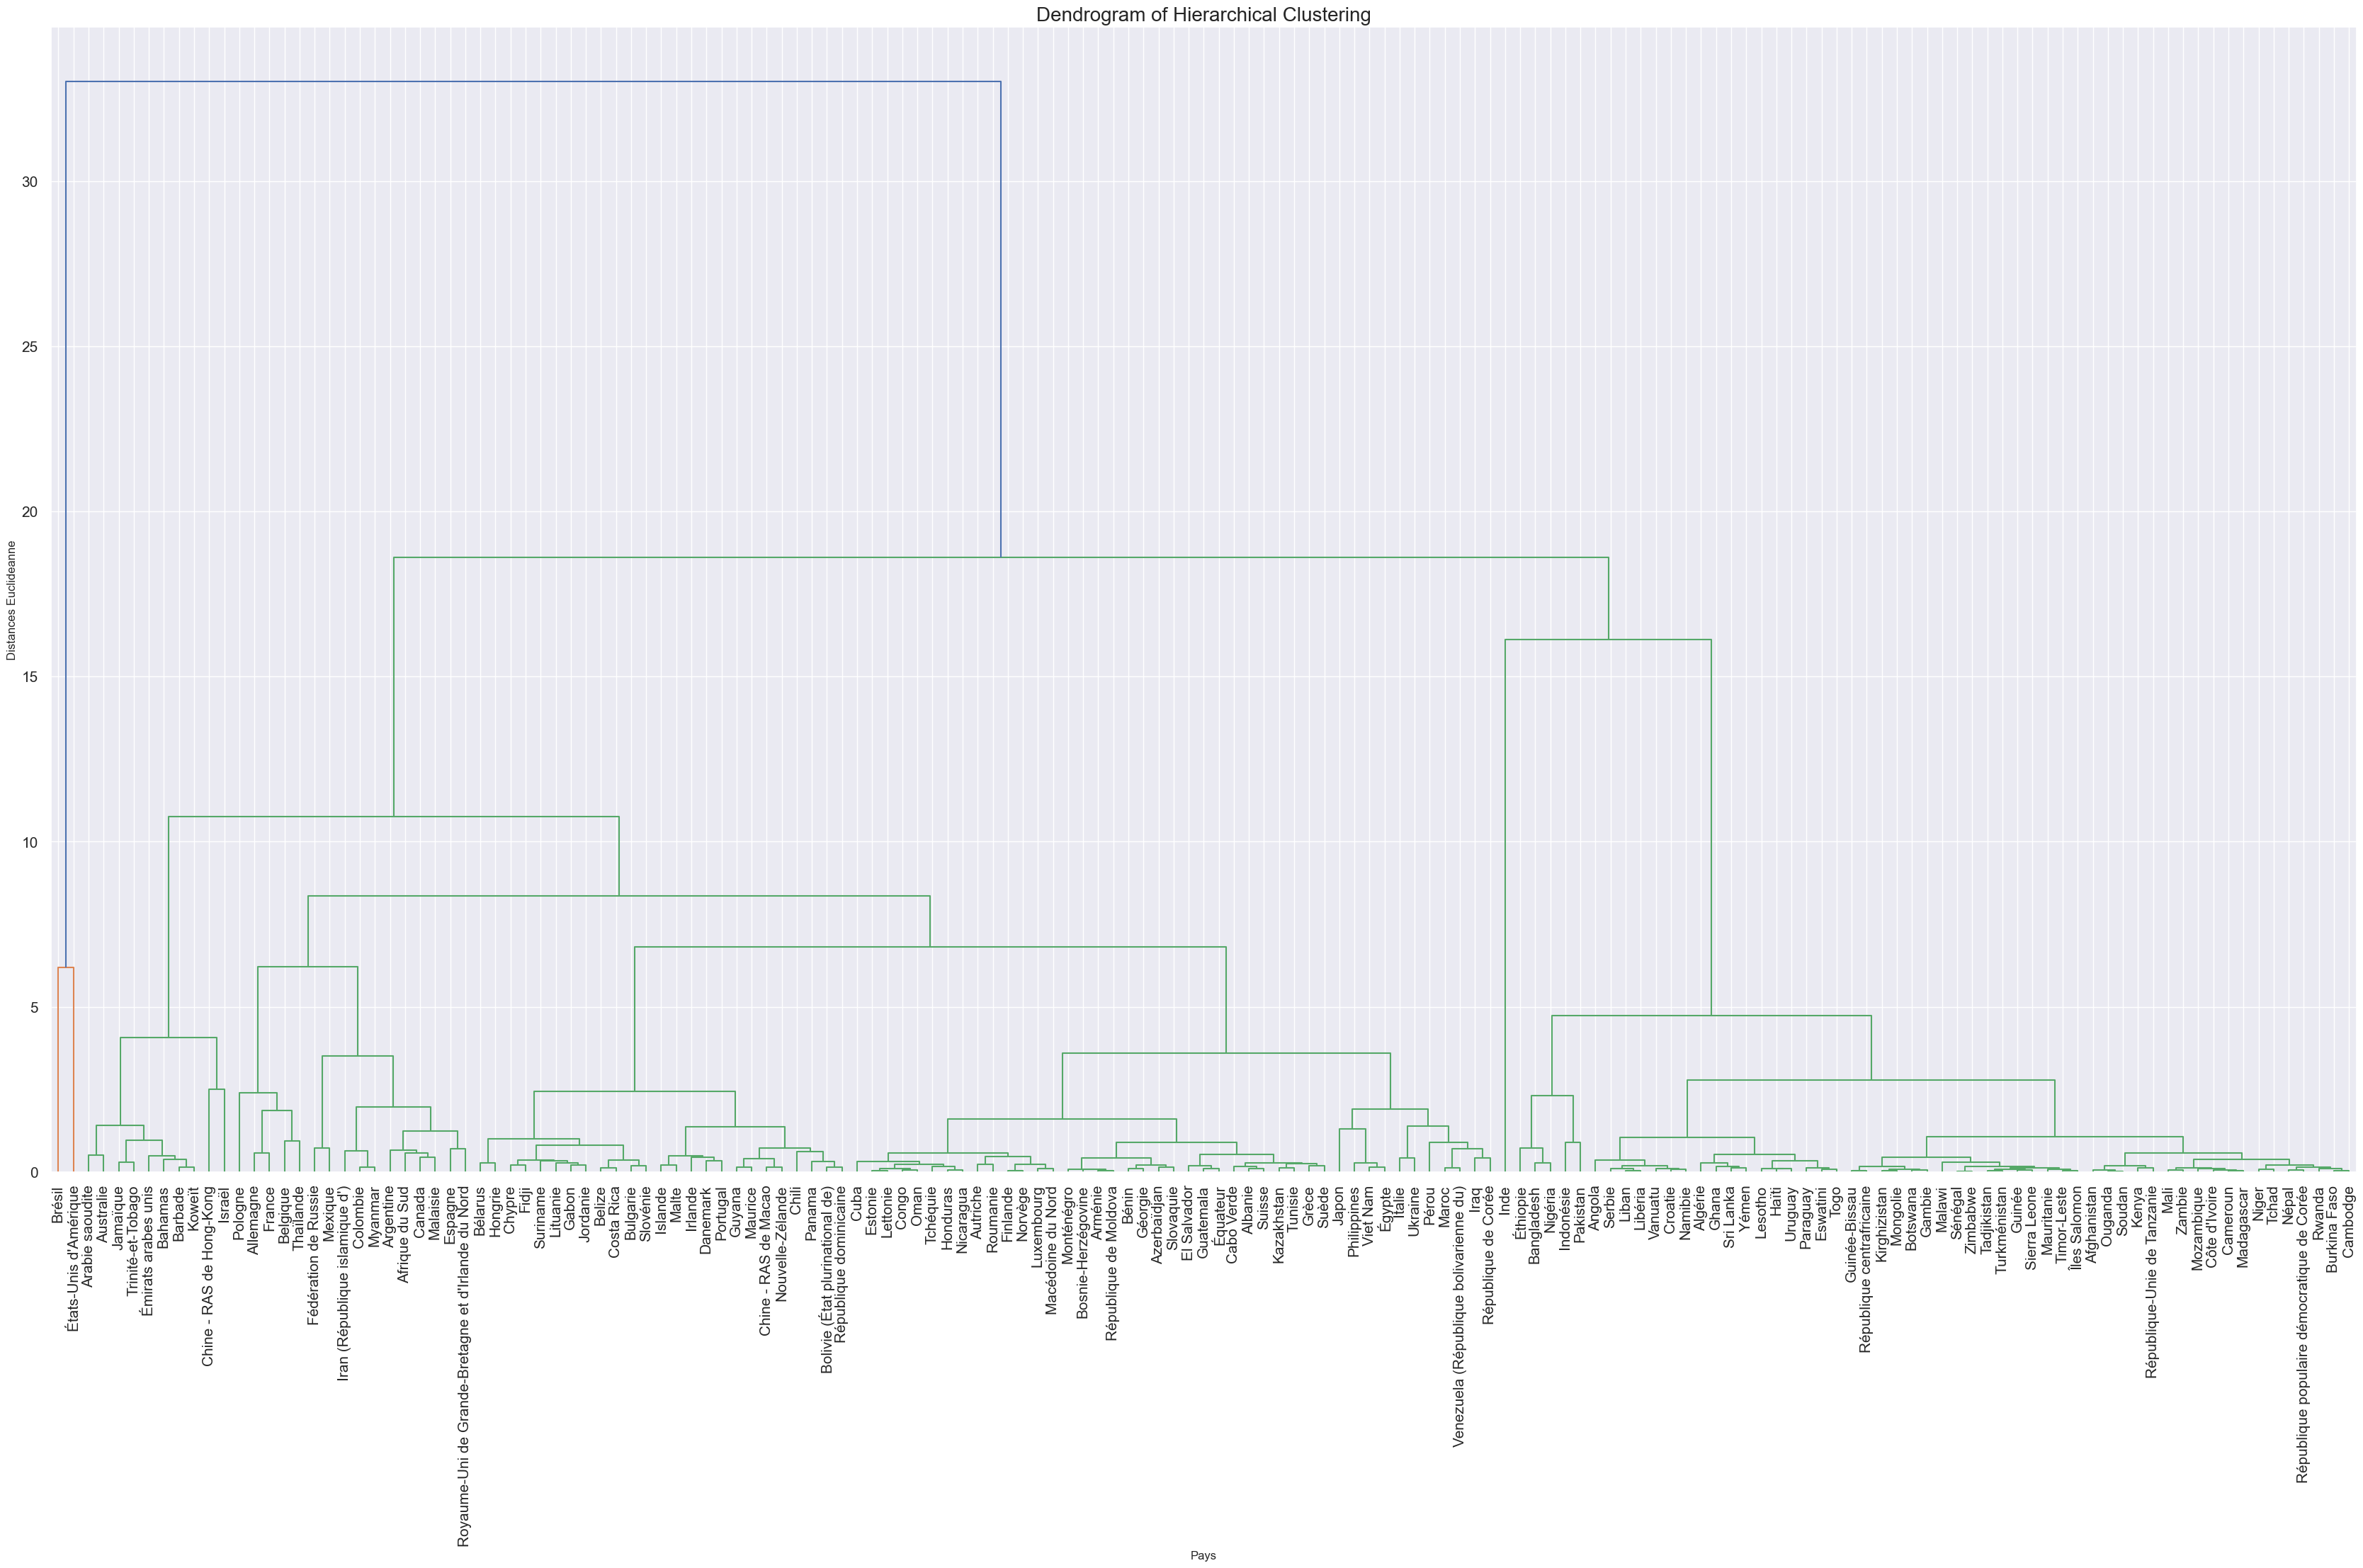

In [1313]:
def my_dendrogram(Z, names):
    fig, ax = plt.subplots(1, 1, figsize=(42, 21))

    _ = dendrogram(Z, ax=ax, labels=names, orientation = "top")

    plt.title("Dendrogram of Hierarchical Clustering", fontsize=20)
    ax.tick_params(axis='x', which='major', labelsize=15)
    ax.tick_params(axis='y', which='major', labelsize=15)
    plt.xlabel('Pays')
    plt.ylabel('Distances Euclideanne')
    plt.show()
    
my_dendrogram(z, names)

In [1314]:
# Visualiser les 3 clusters 

clusters = fcluster(z, 3, criterion="maxclust")
clusters

array([3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 1, 2,
       3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 2, 3, 3, 2, 2,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3,
       2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 2, 1, 3, 3],
      dtype=int32)

In [1315]:
# Création d'un autre DF pour stocker les clusters avec le pays

newdf_clusters = pd.DataFrame({"cluster" : clusters, "Zone" : names})

display(newdf_clusters.head())
newdf_clusters.shape

cluster            Zone
0        3     Afghanistan
1        2  Afrique du Sud
2        2         Albanie
3        3         Algérie
4        2       Allemagne

(153, 2)

### Projection avec clusters

In [1317]:
x_proj = pca_2c.transform(x_scaled)

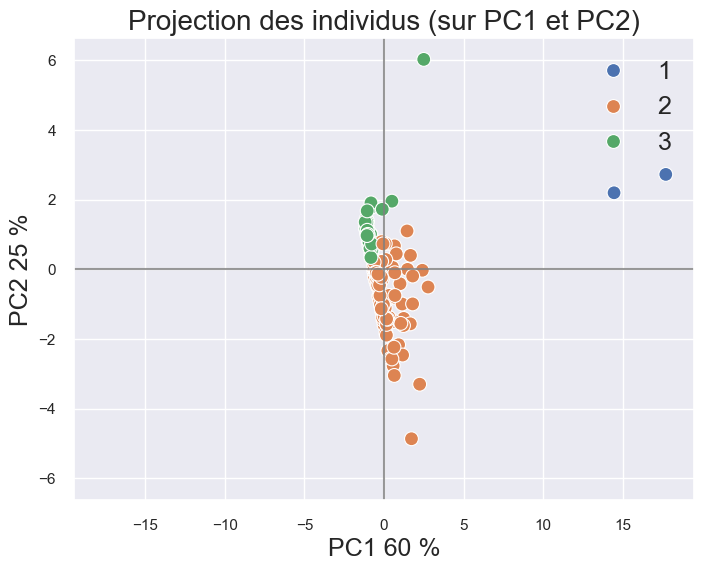

In [1318]:
show_projections(x_proj, (0,1), pca_2c, figsize=(8,6), clusters=clusters)

### Analyse des clusters

In [1320]:
# Créér un nouveau DF avec les données du x_scaled

new_df_scaled = pd.DataFrame(x_scaled, columns= new_df.columns, index= new_df.index)

display(new_df_scaled.head())

Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                     
Afghanistan                                                 -1.20        
Afrique du Sud                                               1.19        
Albanie                                                     -0.16        
Algérie                                                     -0.86        
Allemagne                                                    0.05        

                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                       
Afghanistan                                                 -1.19          
Afrique du Sud                                               1.46          
Albanie                                                     -0.07          
Algérie                                                     -0.91          
Allemagne                                                    0.26          

                Disponibilité intérieure  Exportations - Quantité  Production  \
Zone                                                                            
Afghanistan                        -0.32                    -0.22       -0.29   
Afrique du Sud                      0.83                    -0.08        0.47   
Albanie                            -0.32                    -0.21       -0.29   
Algérie                            -0.19                    -0.21       -0.17   
Allemagne                           0.62                     1.16        0.40   

                Importations - Quantité  Population  
Zone                                                 
Afghanistan                       -0.22       -0.01  
Afrique du Sud                    -0.08        0.16  
Albanie                           -0.21       -0.30  
Algérie                           -0.21        0.03  
Allemagne                          1.16        0.39

In [1321]:
# Merger les données standardisées avec la colonne "cluster" et mettre dans un nouveau DF

new_df_scaled_clust = pd.merge(new_df_scaled, newdf_clusters, on='Zone')
display(new_df_scaled_clust.head())

Zone  Disponibilité alimentaire en quantité (kg/personne/an)  \
0     Afghanistan                                              -1.20        
1  Afrique du Sud                                               1.19        
2         Albanie                                              -0.16        
3         Algérie                                              -0.86        
4       Allemagne                                               0.05        

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              -1.19          
1                                               1.46          
2                                              -0.07          
3                                              -0.91          
4                                               0.26          

   Disponibilité intérieure  Exportations - Quantité  Production  \
0                     -0.32                    -0.22       -0.29   
1                      0.83                    -0.08        0.47   
2                     -0.32                    -0.21       -0.29   
3                     -0.19                    -0.21       -0.17   
4                      0.62                     1.16        0.40   

   Importations - Quantité  Population  cluster  
0                    -0.22       -0.01        3  
1                    -0.08        0.16        2  
2                    -0.21       -0.30        2  
3                    -0.21        0.03        3  
4                     1.16        0.39        2

In [1322]:
# Utiliser la colonne Zone comme index

new_df_scaled_clust.set_index('Zone', inplace=True)

In [1323]:
new_df_scaled_clust.head()

Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                     
Afghanistan                                                 -1.20        
Afrique du Sud                                               1.19        
Albanie                                                     -0.16        
Algérie                                                     -0.86        
Allemagne                                                    0.05        

                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                       
Afghanistan                                                 -1.19          
Afrique du Sud                                               1.46          
Albanie                                                     -0.07          
Algérie                                                     -0.91          
Allemagne                                                    0.26          

                Disponibilité intérieure  Exportations - Quantité  Production  \
Zone                                                                            
Afghanistan                        -0.32                    -0.22       -0.29   
Afrique du Sud                      0.83                    -0.08        0.47   
Albanie                            -0.32                    -0.21       -0.29   
Algérie                            -0.19                    -0.21       -0.17   
Allemagne                           0.62                     1.16        0.40   

                Importations - Quantité  Population  cluster  
Zone                                                          
Afghanistan                       -0.22       -0.01        3  
Afrique du Sud                    -0.08        0.16        2  
Albanie                           -0.21       -0.30        2  
Algérie                           -0.21        0.03        3  
Allemagne                          1.16        0.39        2

In [1324]:
# Calculer la moyenne de chaque cluster par variable

new_df_scaled_mean = new_df_scaled_clust.groupby('cluster').mean()

new_df_scaled_mean

Disponibilité alimentaire en quantité (kg/personne/an)  \
cluster                                                           
1                                                     2.32        
2                                                     0.55        
3                                                    -0.98        

         Disponibilité de protéines en quantité (g/personne/jour)  \
cluster                                                             
1                                                     2.18          
2                                                     0.55          
3                                                    -0.98          

         Disponibilité intérieure  Exportations - Quantité  Production  \
cluster                                                                  
1                            7.50                     8.22        7.97   
2                           -0.01                    -0.05       -0.04   
3                           -0.24                    -0.21       -0.22   

         Importations - Quantité  Population  
cluster                                       
1                           8.22        1.96  
2                          -0.05       -0.13  
3                          -0.21        0.14

### Interprétation des clusters

Cluster 1 : index Production élevé, index importation élevé, index population le maximum

Cluster 2 : index Production négative, index importation négative, index population négative

Cluster 3 : index Production négative, index importation négative, index population faible

### Heatmap des clusters

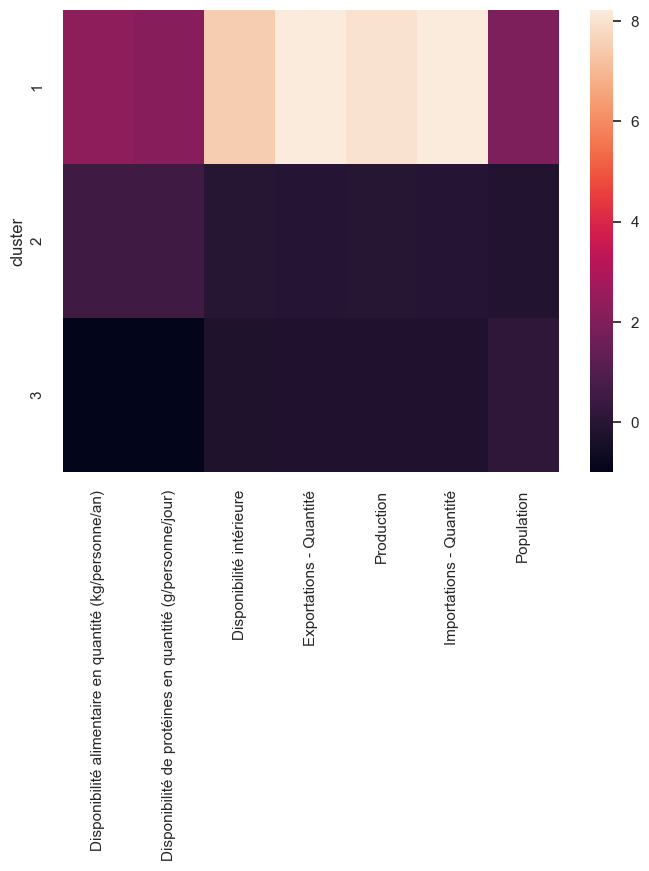

In [1330]:
plt.figure(figsize=(8, 6))
sns.heatmap(new_df_scaled_mean)
plt.show()

### Boxplot des clusters

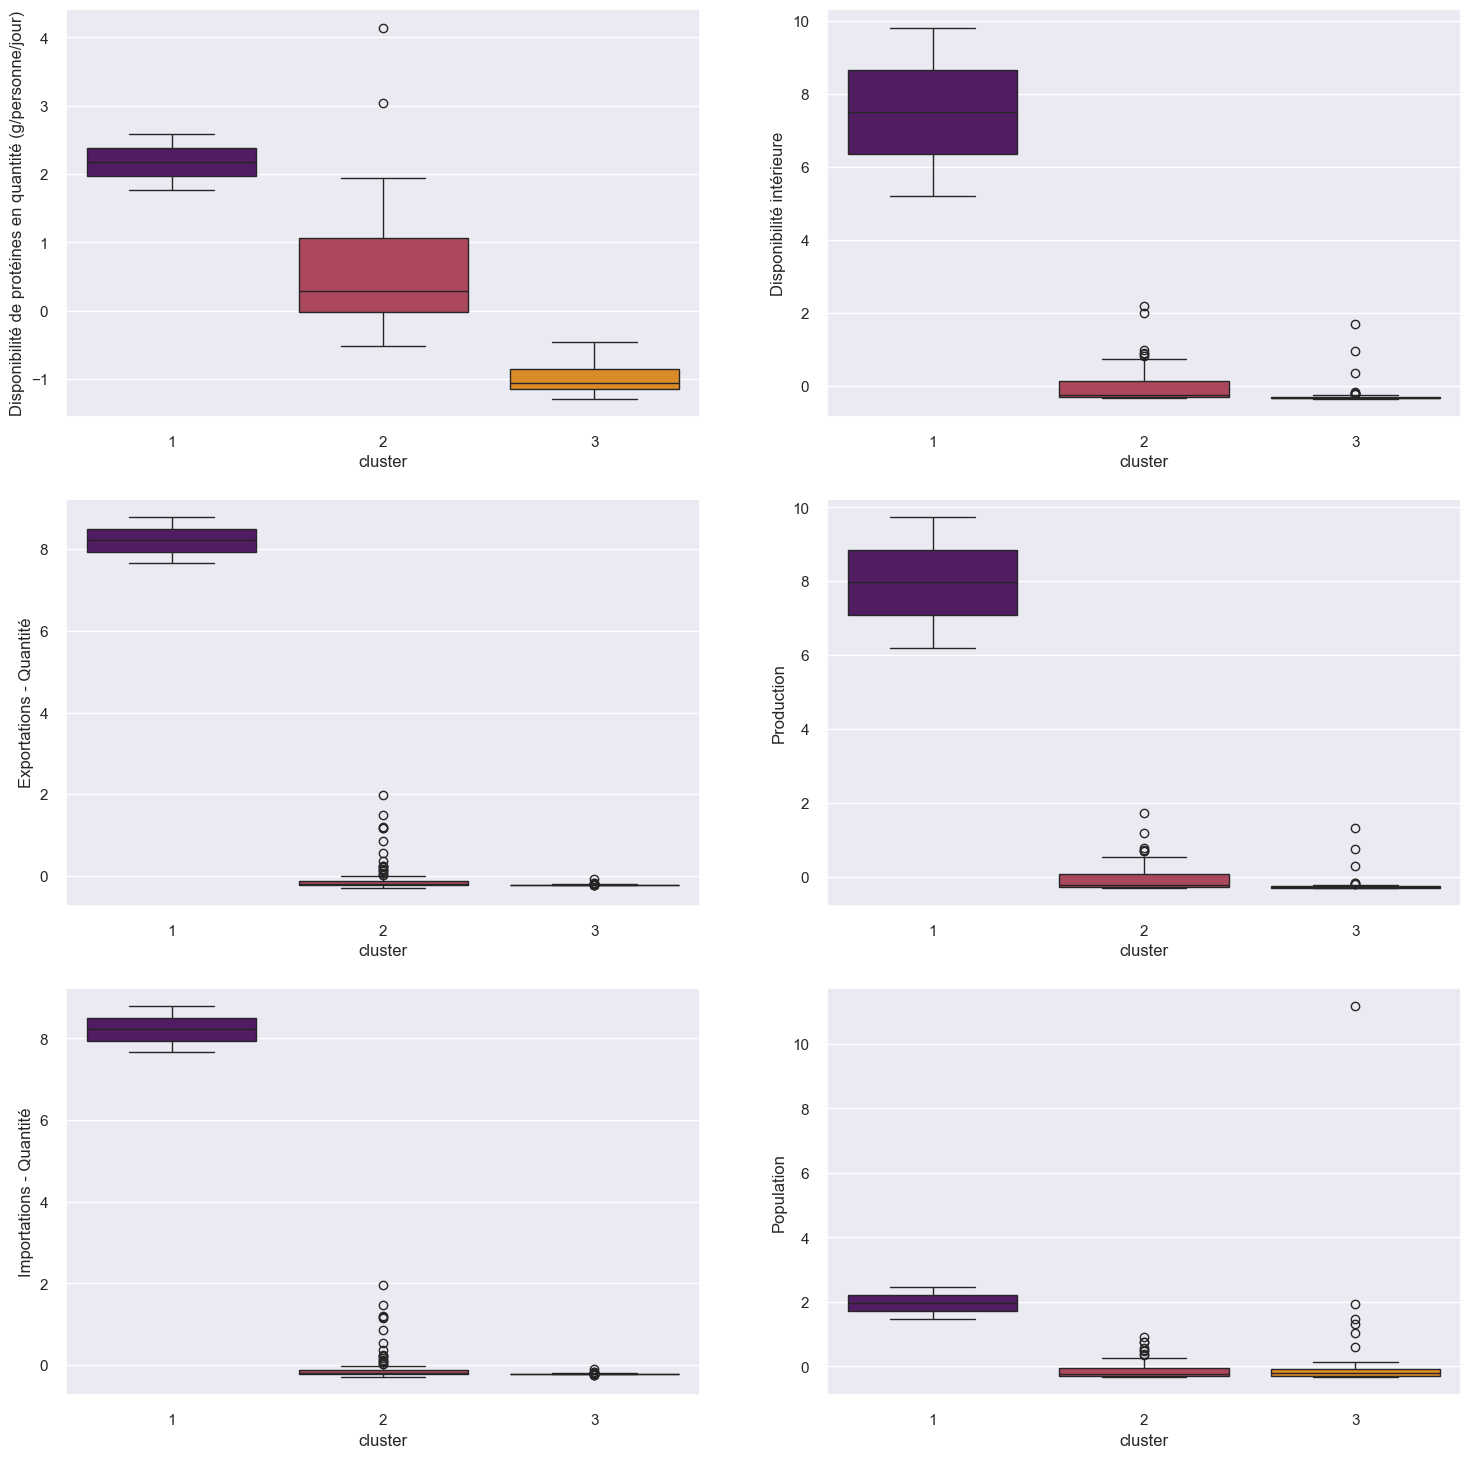

In [1332]:
fig, axes = plt.subplots(3, 2, figsize=(18,18))

for i in range(3):
    for j in range(2):
        sns.boxplot(ax=axes[i,j], data=new_df_scaled_clust, x='cluster', y=new_df_scaled_clust.columns[1:-1][2*i+j], palette = "inferno")
plt.show()

### Radar chart des clusters

In [1334]:
cluster_list = []

# Création d'une boucle pour stocker les informations de chaque cluster dans un df
for i in range(3):
    cluster_df = pd.DataFrame({
        f'Cluster {i} Col A': new_df_scaled_clust.columns[0:-1],
        f'Cluster {i} Col B': new_df_scaled_mean.iloc[i].values
    })
    cluster_list.append(cluster_df)

# Concaténation des df
new_cluster_df_concat = pd.concat(cluster_list, axis=1)
    
new_cluster_df_concat

Cluster 0 Col A  Cluster 0 Col B  \
0  Disponibilité alimentaire en quantité (kg/pers...             2.32   
1  Disponibilité de protéines en quantité (g/pers...             2.18   
2                           Disponibilité intérieure             7.50   
3                            Exportations - Quantité             8.22   
4                                         Production             7.97   
5                            Importations - Quantité             8.22   
6                                         Population             1.96   

                                     Cluster 1 Col A  Cluster 1 Col B  \
0  Disponibilité alimentaire en quantité (kg/pers...             0.55   
1  Disponibilité de protéines en quantité (g/pers...             0.55   
2                           Disponibilité intérieure            -0.01   
3                            Exportations - Quantité            -0.05   
4                                         Production            -0.04   
5                            Importations - Quantité            -0.05   
6                                         Population            -0.13   

                                     Cluster 2 Col A  Cluster 2 Col B  
0  Disponibilité alimentaire en quantité (kg/pers...            -0.98  
1  Disponibilité de protéines en quantité (g/pers...            -0.98  
2                           Disponibilité intérieure            -0.24  
3                            Exportations - Quantité            -0.21  
4                                         Production            -0.22  
5                            Importations - Quantité            -0.21  
6                                         Population             0.14

In [1335]:
# Création d'une boucle pour générer les 3 radar charts à travers les informations récupérées dans "cluster_list"
import plotly.express as px

for i, cluster_df in enumerate(cluster_list):
    theta = cluster_df[f'Cluster {i} Col A'].values
    values = cluster_df[f'Cluster {i} Col B'].values
    fig = px.line_polar(cluster_df, 
                        r=f'Cluster {i} Col B', 
                        theta=f'Cluster {i} Col A', 
                        line_close=True,
                        title=f'Cluster {i}')
    fig.show()

In [1336]:
import plotly.graph_objs as go

In [1337]:
for i, cluster_df in enumerate(cluster_list):
    theta = cluster_df[f'Cluster {i} Col A'].values
    values = cluster_df[f'Cluster {i} Col B'].values
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=theta,
        fill='toself',
        name=f'Cluster {i}'
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[-5, 5]
        )),
    showlegend=True
)

fig.show()

# K-Means Clustering

In [1339]:
# Récupération de la scaled data

x_scaled

array([[-1.20424562, -1.18687603, -0.31625947, ..., -0.28545526,
        -0.21744923, -0.01293708],
       [ 1.1898075 ,  1.45751678,  0.82902796, ...,  0.46518713,
        -0.07988458,  0.16490167],
       [-0.16490699, -0.07221672, -0.32181642, ..., -0.29232508,
        -0.21418759, -0.29980757],
       ...,
       [ 2.59077712,  2.59166314,  9.8023911 , ...,  9.73807086,
         7.65639487,  2.46655393],
       [-1.30236256, -1.28431128, -0.34015436, ..., -0.29186709,
        -0.21233293,  0.5889569 ],
       [-0.99960174, -0.99785164, -0.346267  , ..., -0.29827893,
        -0.21418759, -0.31910856]])

### La méthode Elbow (Coude)

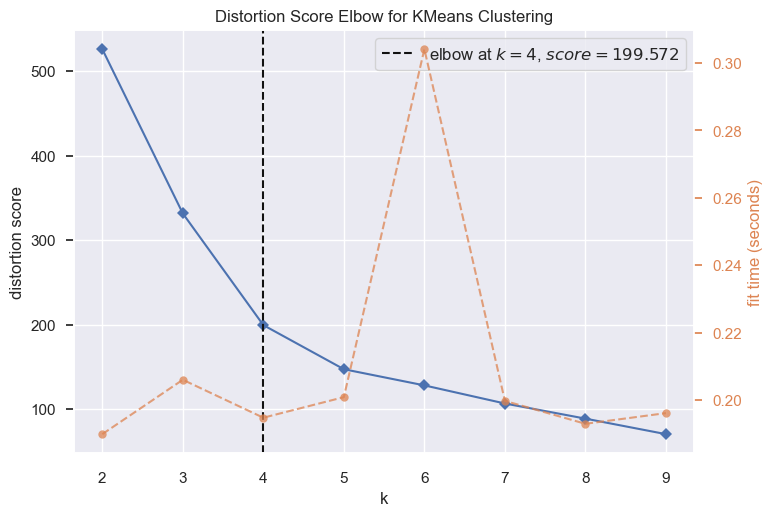

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1341]:
# Instantiate the clustering model and visualizer

from yellowbrick.cluster import KElbowVisualizer ,silhouette_visualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler

km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(x_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### La méthode Silhouette

In [1343]:
SK = range(3,13)
sil_score = []
for i in SK:
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(x_scaled).labels_
    score = metrics.silhouette_score(x_scaled,labels,metric="euclidean",sample_size=1000,random_state=200)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(x_scaled,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.46697710950861465
Silhouette score for k(clusters) = 4 is 0.48572005529334866
Silhouette score for k(clusters) = 5 is 0.4776190303501676
Silhouette score for k(clusters) = 6 is 0.430960597226994
Silhouette score for k(clusters) = 7 is 0.4490279880720637
Silhouette score for k(clusters) = 8 is 0.4677287031784805
Silhouette score for k(clusters) = 9 is 0.48701717282069484
Silhouette score for k(clusters) = 10 is 0.483317304311316
Silhouette score for k(clusters) = 11 is 0.481592553550546
Silhouette score for k(clusters) = 12 is 0.42459643162194155


In [1344]:
sil_centers = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sil_centers

Clusters  Sil Score
0         3       0.47
1         4       0.49
2         5       0.48
3         6       0.43
4         7       0.45
5         8       0.47
6         9       0.49
7        10       0.48
8        11       0.48
9        12       0.42

<Axes: xlabel='Clusters', ylabel='Sil Score'>

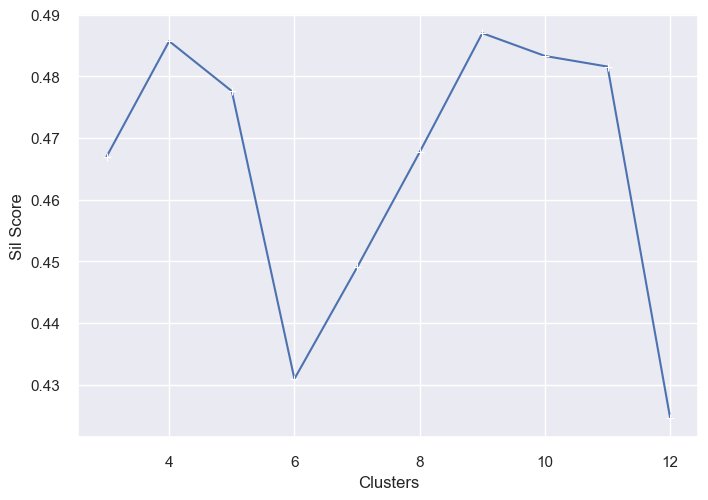

In [1345]:
sns.lineplot(x = 'Clusters', y = 'Sil Score', data = sil_centers, marker="+")

Nous avons déterminé que le nombre optimal de k = 4

In [1347]:
pca = decomposition.PCA(n_components= 4).fit(x_scaled)
V_projected = pca.transform(x_scaled)

### Projection avec les clusters (k= 4)

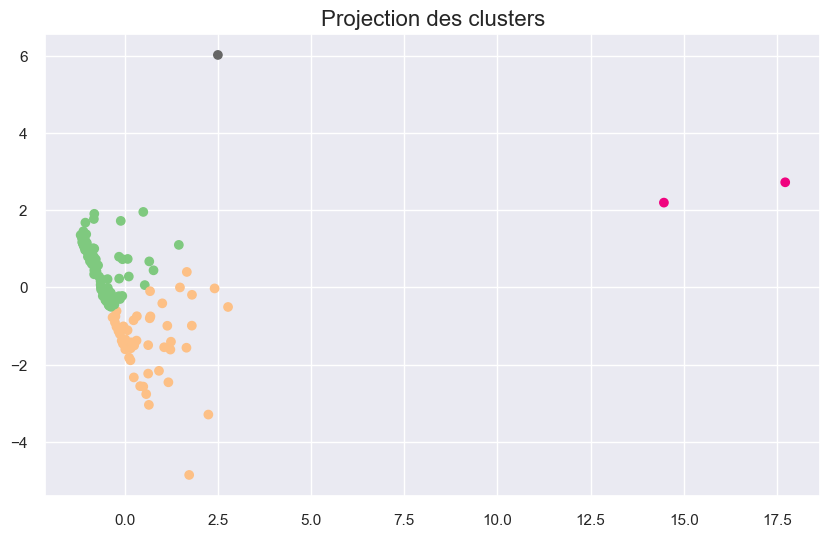

In [1349]:
model = KMeans(n_clusters= 4, random_state=3)
model.fit(x_scaled)
clusters = model.labels_

plt.figure(figsize=(10,6))
plt.scatter(V_projected[:, 0], V_projected[:, 1], c=model.labels_, cmap='Accent')
plt.title('Projection des clusters', fontsize=16)

plt.show()

### Projection des clusters

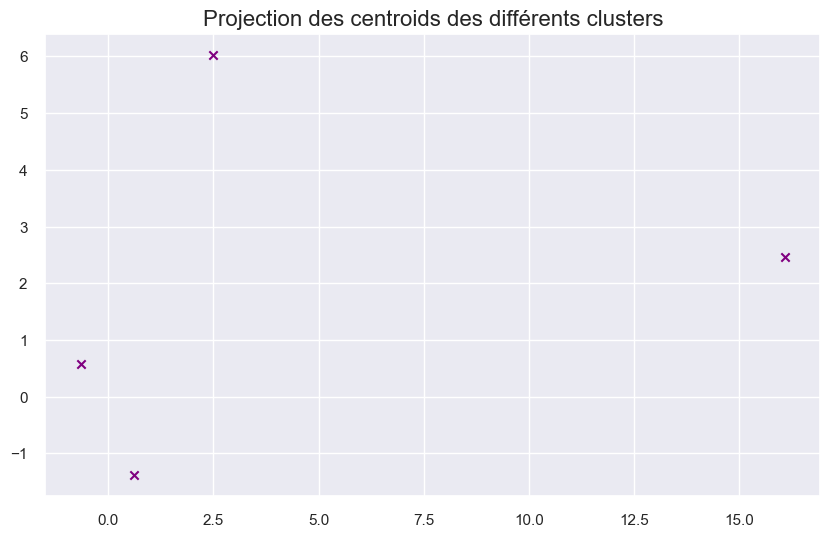

In [1351]:
centroids = model.cluster_centers_
centroids_projected = pca.transform(centroids)

# Affichage des centroids
plt.figure(figsize=(10,6))
plt.scatter(centroids_projected[:,0], centroids_projected[:,1], marker='x', c='purple')
plt.title('Projection des centroids des différents clusters', fontsize=16)
plt.show()

### Traçage des centroids avec le graphique

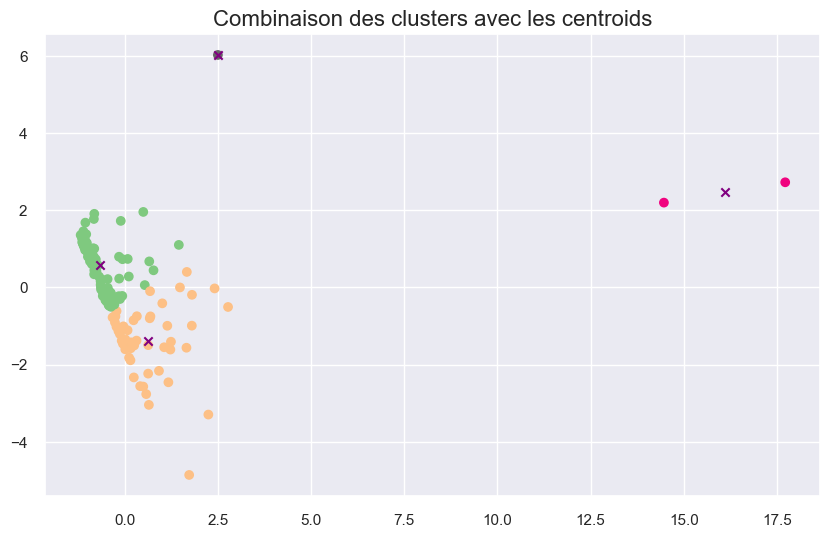

In [1353]:
# Combinaison des deux graphiques précédents
# Affichage des centroids
plt.figure(figsize=(10,6))

plt.scatter(V_projected[:, 0], V_projected[:, 1], c=model.labels_, cmap='Accent')
plt.scatter(centroids_projected[:,0], centroids_projected[:,1], marker='x', c='purple')
plt.title('Combinaison des clusters avec les centroids', fontsize=16)
plt.show()

### Analyse des clusters

In [1355]:
# Créér un nouveau DF avec les données du x_scaled

new_df_scaled = pd.DataFrame(x_scaled, columns= new_df.columns, index= new_df.index)

new_df_scaled.head()

Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                     
Afghanistan                                                 -1.20        
Afrique du Sud                                               1.19        
Albanie                                                     -0.16        
Algérie                                                     -0.86        
Allemagne                                                    0.05        

                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                       
Afghanistan                                                 -1.19          
Afrique du Sud                                               1.46          
Albanie                                                     -0.07          
Algérie                                                     -0.91          
Allemagne                                                    0.26          

                Disponibilité intérieure  Exportations - Quantité  Production  \
Zone                                                                            
Afghanistan                        -0.32                    -0.22       -0.29   
Afrique du Sud                      0.83                    -0.08        0.47   
Albanie                            -0.32                    -0.21       -0.29   
Algérie                            -0.19                    -0.21       -0.17   
Allemagne                           0.62                     1.16        0.40   

                Importations - Quantité  Population  
Zone                                                 
Afghanistan                       -0.22       -0.01  
Afrique du Sud                    -0.08        0.16  
Albanie                           -0.21       -0.30  
Algérie                           -0.21        0.03  
Allemagne                          1.16        0.39

In [1356]:
# Regroupement des clusters modifiés

clusters = model.labels_
df_clusters = pd.DataFrame(index=[new_df.index])
df_clusters['Cluster'] = clusters
df_clusters = df_clusters.reset_index()
display(df_clusters.head())
df_clusters['Cluster'].value_counts()

Zone  Cluster
0     Afghanistan        0
1  Afrique du Sud        1
2         Albanie        0
3         Algérie        0
4       Allemagne        1

Cluster
0    100
1     50
2      2
3      1
Name: count, dtype: int64

In [1357]:
df_kmeans2 = pd.merge(new_df_scaled, df_clusters, on='Zone')
display(df_kmeans2.head())

Zone  Disponibilité alimentaire en quantité (kg/personne/an)  \
0     Afghanistan                                              -1.20        
1  Afrique du Sud                                               1.19        
2         Albanie                                              -0.16        
3         Algérie                                              -0.86        
4       Allemagne                                               0.05        

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              -1.19          
1                                               1.46          
2                                              -0.07          
3                                              -0.91          
4                                               0.26          

   Disponibilité intérieure  Exportations - Quantité  Production  \
0                     -0.32                    -0.22       -0.29   
1                      0.83                    -0.08        0.47   
2                     -0.32                    -0.21       -0.29   
3                     -0.19                    -0.21       -0.17   
4                      0.62                     1.16        0.40   

   Importations - Quantité  Population  Cluster  
0                    -0.22       -0.01        0  
1                    -0.08        0.16        1  
2                    -0.21       -0.30        0  
3                    -0.21        0.03        0  
4                     1.16        0.39        1

In [1358]:
# Utiliser la colonne Zone comme index désormais

df_kmeans2.set_index('Zone', inplace=True)

In [1359]:
# Calculer la moyenne de chaque cluster

df_kmeans2_mean = df_kmeans2.groupby('Cluster').agg(['mean'])

display(df_kmeans2_mean.head())

Disponibilité alimentaire en quantité (kg/personne/an)  \
                                                          mean   
Cluster                                                          
0                                                    -0.58       
1                                                     1.09       
2                                                     2.32       
3                                                    -1.16       

        Disponibilité de protéines en quantité (g/personne/jour)  \
                                                            mean   
Cluster                                                            
0                                                    -0.57         
1                                                     1.08         
2                                                     2.18         
3                                                    -1.15         

        Disponibilité intérieure Exportations - Quantité Production  \
                            mean                    mean       mean   
Cluster                                                               
0                          -0.21                   -0.17      -0.20   
1                           0.09                    0.02       0.05   
2                           7.50                    8.22       7.97   
3                           1.69                   -0.21       1.33   

        Importations - Quantité Population  
                           mean       mean  
Cluster                                     
0                         -0.17      -0.09  
1                          0.02      -0.12  
2                          8.22       1.96  
3                         -0.21      11.17

### Interprétation des clusters

Cluster 0 : index Production négatif, index importation négatif, index population faible

Cluster 1 : index Production faible, index importation faible, index population négatif

Cluster 2 : index Production le maximum de tous les clusters, index importation très élevé, index population élevé

Cluster 3 : index Production positif, index importation négatif, index population le maximum de tous les clusters

### Heatmap des clusters

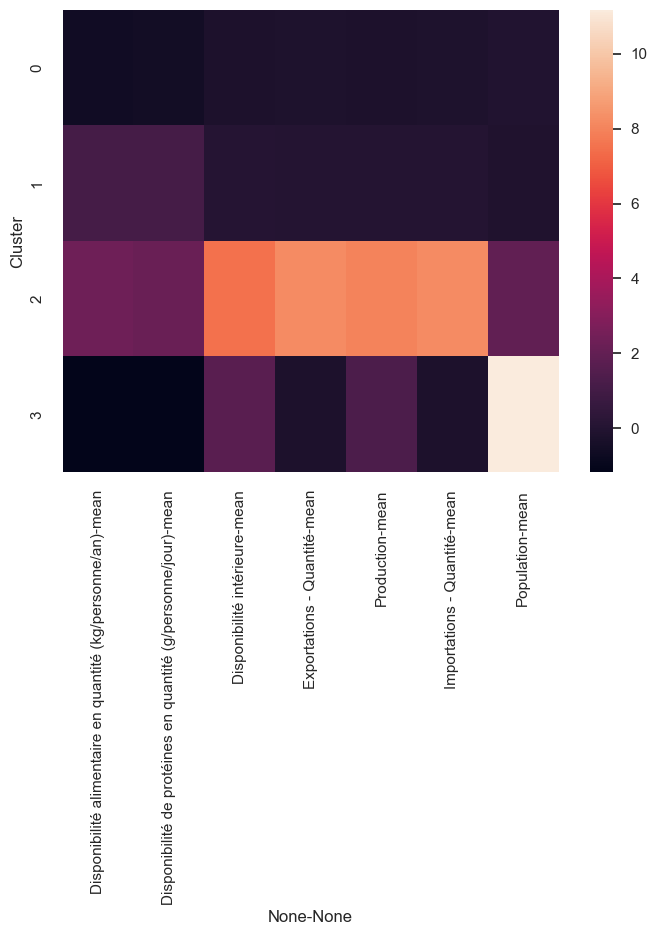

In [1366]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_kmeans2_mean)
plt.show()

### Boxplot des clusters

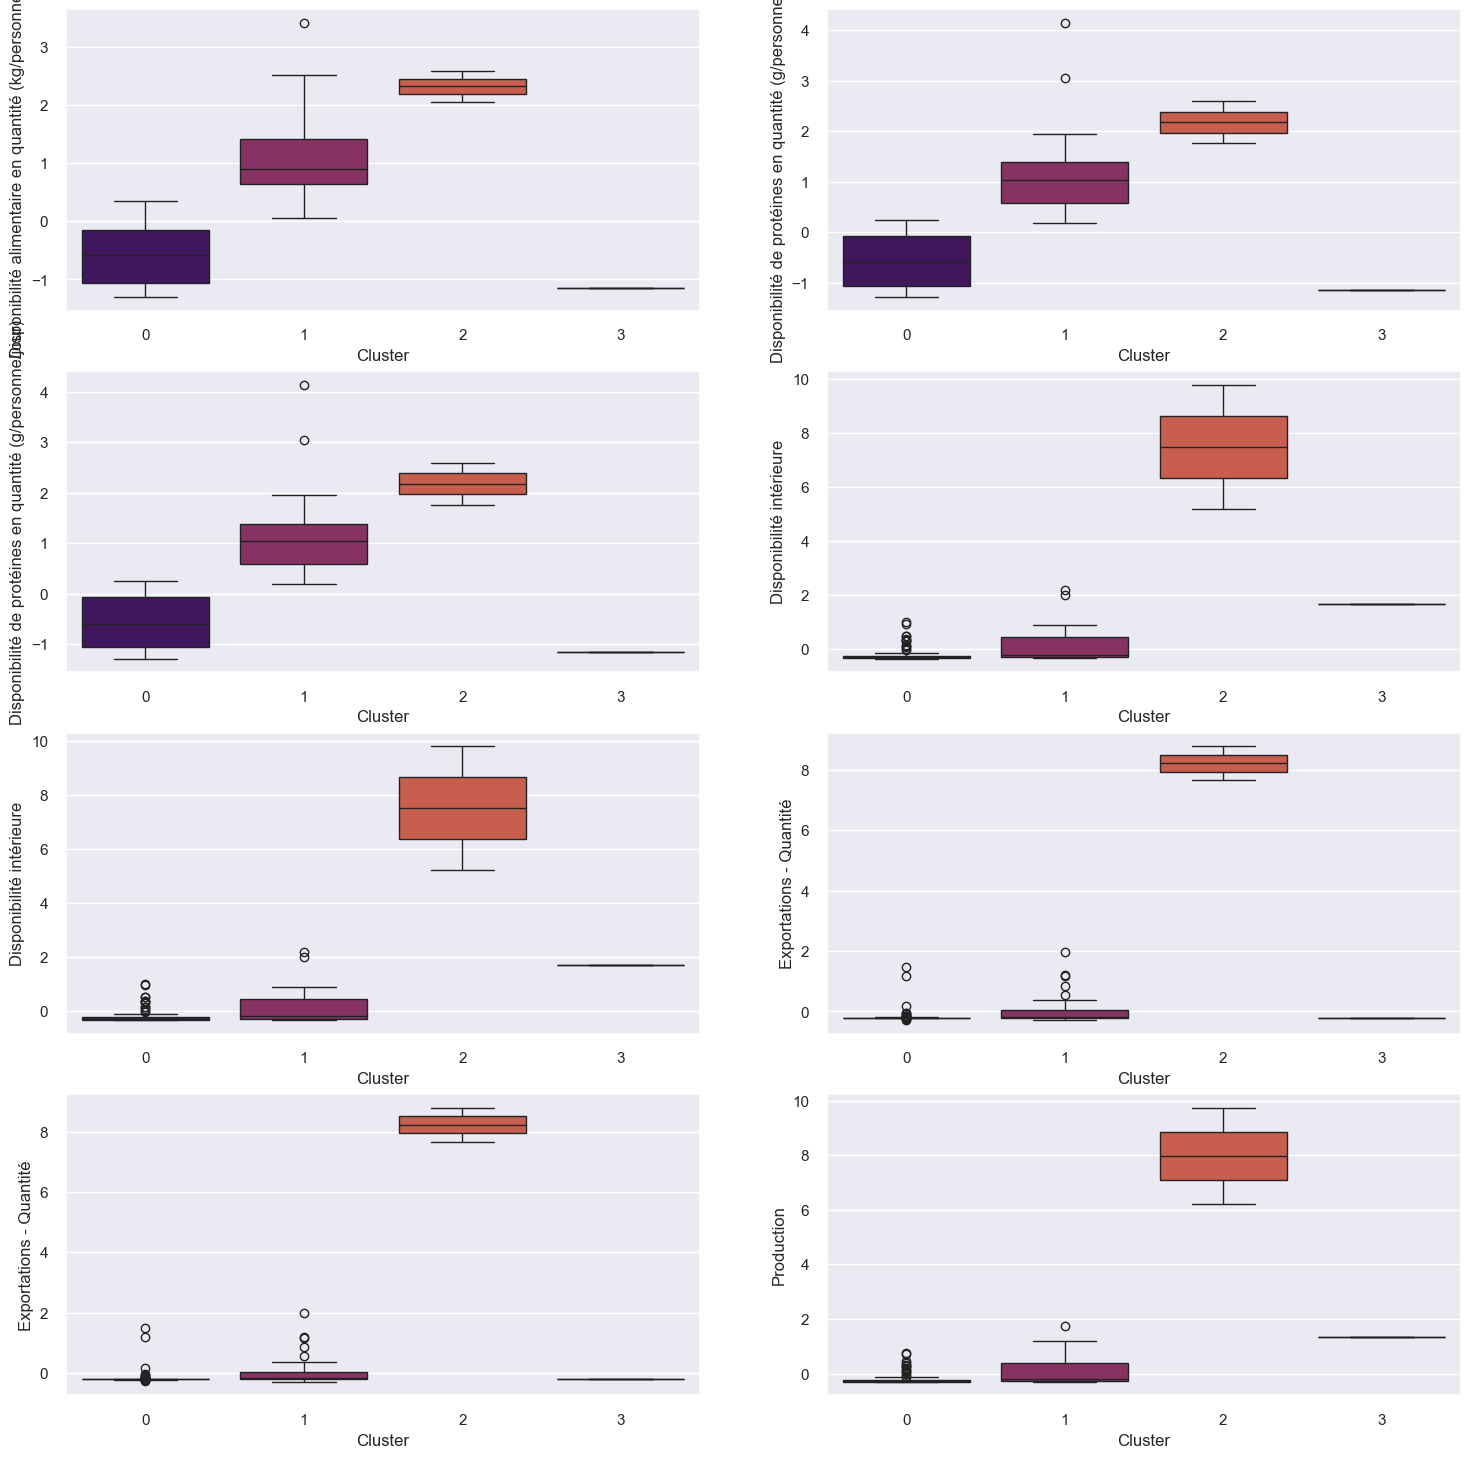

In [1368]:
fig, axes = plt.subplots(4, 2, figsize=(18,18))

for i in range(4):
    for j in range(2):
        sns.boxplot(ax=axes[i,j], 
                    data= df_kmeans2, 
                    x='Cluster', 
                    y=df_kmeans2.columns[0:-1][i+j], palette = "inferno")

plt.show()

### Radar chart des clusters

In [1370]:
cluster_kmeans_list = []

# Création d'une boucle pour stocker les informations de chaque cluster dans un df
for i in range(4):
    cluster_df_kmeans = pd.DataFrame({
        f'Cluster {i} Col A': df_kmeans2.columns[0:-1],
        f'Cluster {i} Col B': df_kmeans2_mean.iloc[i].values
    })
    cluster_kmeans_list.append(cluster_df_kmeans)

# Concaténation des df
cluster_df_kmeans_concat = pd.concat(cluster_kmeans_list, axis=1)
    
cluster_df_kmeans_concat

Cluster 0 Col A  Cluster 0 Col B  \
0  Disponibilité alimentaire en quantité (kg/pers...            -0.58   
1  Disponibilité de protéines en quantité (g/pers...            -0.57   
2                           Disponibilité intérieure            -0.21   
3                            Exportations - Quantité            -0.17   
4                                         Production            -0.20   
5                            Importations - Quantité            -0.17   
6                                         Population            -0.09   

                                     Cluster 1 Col A  Cluster 1 Col B  \
0  Disponibilité alimentaire en quantité (kg/pers...             1.09   
1  Disponibilité de protéines en quantité (g/pers...             1.08   
2                           Disponibilité intérieure             0.09   
3                            Exportations - Quantité             0.02   
4                                         Production             0.05   
5                            Importations - Quantité             0.02   
6                                         Population            -0.12   

                                     Cluster 2 Col A  Cluster 2 Col B  \
0  Disponibilité alimentaire en quantité (kg/pers...             2.32   
1  Disponibilité de protéines en quantité (g/pers...             2.18   
2                           Disponibilité intérieure             7.50   
3                            Exportations - Quantité             8.22   
4                                         Production             7.97   
5                            Importations - Quantité             8.22   
6                                         Population             1.96   

                                     Cluster 3 Col A  Cluster 3 Col B  
0  Disponibilité alimentaire en quantité (kg/pers...            -1.16  
1  Disponibilité de protéines en quantité (g/pers...            -1.15  
2                           Disponibilité intérieure             1.69  
3                            Exportations - Quantité            -0.21  
4                                         Production             1.33  
5                            Importations - Quantité            -0.21  
6                                         Population            11.17

In [1371]:
# Création d'une boucle pour générer les 5 radar charts à travers les informations récupérées dans "cluster_kmeans_list"
for i, cluster_df_kmeans in enumerate(cluster_kmeans_list):
    theta = cluster_df_kmeans[f'Cluster {i} Col A'].values
    values = cluster_df_kmeans[f'Cluster {i} Col B'].values
    fig = px.line_polar(cluster_df_kmeans, 
                        r=f'Cluster {i} Col B', 
                        theta=f'Cluster {i} Col A', 
                        line_close=True,
                        start_angle=90,
                        range_r=[-1, 5],
                        title=f'Cluster {i}')
    fig.show()

In [1372]:
fig = go.Figure()

for i, cluster_df_kmeans in enumerate(cluster_kmeans_list):
    theta = cluster_df_kmeans[f'Cluster {i} Col A'].values
    values = cluster_df_kmeans[f'Cluster {i} Col B'].values
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=theta,
        fill='toself',
        name=f'Cluster {i}'
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[-1, 5]
        )),
    showlegend=True
)

fig.show()

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Itération 2 (Analyse 12 variables : variables dérivées avec les outliers)</h2>
</div>

In [1374]:
df.shape

(153, 12)

In [1375]:
df.head()

croissance_annuelle  Stabilité politique  \
Zone                                                       
Afghanistan                19034.30                -2.79   
Afrique du Sud            380851.44                -0.28   
Albanie                    13019.73                 0.37   
Algérie                   170096.99                -0.92   
Allemagne                3690849.15                 0.57   

                Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                     
Afghanistan                                                  1.53        
Afrique du Sud                                              35.69        
Albanie                                                     16.36        
Algérie                                                      6.38        
Allemagne                                                   19.47        

                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                       
Afghanistan                                                  0.54          
Afrique du Sud                                              14.11          
Albanie                                                      6.26          
Algérie                                                      1.97          
Allemagne                                                    7.96          

                Disponibilité intérieure  Exportations - Quantité  \
Zone                                                                
Afghanistan                     57000.00                 -1530.00   
Afrique du Sud                2118000.00                 63000.00   
Albanie                         47000.00                     0.00   
Algérie                        277000.00                     0.00   
Allemagne                     1739000.00                646000.00   

                Importations - Quantité  Prod_moyenne_par_personne  \
Zone                                                                 
Afghanistan                 -1530000.00                       0.00   
Afrique du Sud              63000000.00                       0.03   
Albanie                            0.00                       0.00   
Algérie                            0.00                       0.01   
Allemagne                  646000000.00                       0.02   

                Production  Dispo_int_par_personne  Nourriture_par_personne  \
Zone                                                                          
Afghanistan       28000.00                    0.00                     0.00   
Afrique du Sud  1667000.00                    0.04                     0.04   
Albanie           13000.00                    0.02                     0.02   
Algérie          275000.00                    0.01                     0.01   
Allemagne       1514000.00                    0.02                     0.02   

                Population  
Zone                        
Afghanistan    36296000.00  
Afrique du Sud 57009000.00  
Albanie         2884000.00  
Algérie        41389000.00  
Allemagne      82658000.00

In [1377]:
df.shape

(153, 12)

# ACP 

In [1379]:
# Réduction de dimensionalité
# Data viz
# Extraction de features

In [1380]:
# Initialisation des variables

X = df
names = df.index
features = df.columns

### Standardisation des données

In [1382]:
# Une technique de transformation de données qui redimensionne les données de sorte que chaque attribut ait une moyenne de 0 et un écart type de 1.

In [1383]:
# Scaling des variables quantitatives

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [1384]:
X_scaled

array([[-0.24251484, -3.00970732, -1.20424562, ..., -1.16735812,
        -1.20592616, -0.01293708],
       [-0.02972972, -0.17543095,  1.1898075 , ...,  1.07344783,
         1.19236911,  0.16490167],
       [-0.24605201,  0.558545  , -0.16490699, ..., -0.23994134,
        -0.16878304, -0.29980757],
       ...,
       [11.28019174,  0.43433368,  2.59077712, ...,  2.27230203,
         2.59439172,  2.46655393],
       [-0.20854588, -1.75630223, -1.30236256, ..., -1.25797131,
        -1.30301614,  0.5889569 ],
       [-0.25284455,  0.35529012, -0.99960174, ..., -0.9691987 ,
        -0.98128155, -0.31910856]])

### Composantes

In [1386]:
# On va d'abord voir combien de variances les 6 variables détiennent 

pca = PCA(n_components = 12)

principalComponents = pca.fit_transform(X_scaled)

In [1387]:
pca.explained_variance_ratio_

array([5.17580757e-01, 2.70265828e-01, 7.56473854e-02, 6.33724827e-02,
       3.43672307e-02, 2.52486459e-02, 7.19068586e-03, 4.50379266e-03,
       1.58187219e-03, 2.30974809e-04, 1.03451620e-05, 2.01980003e-33])

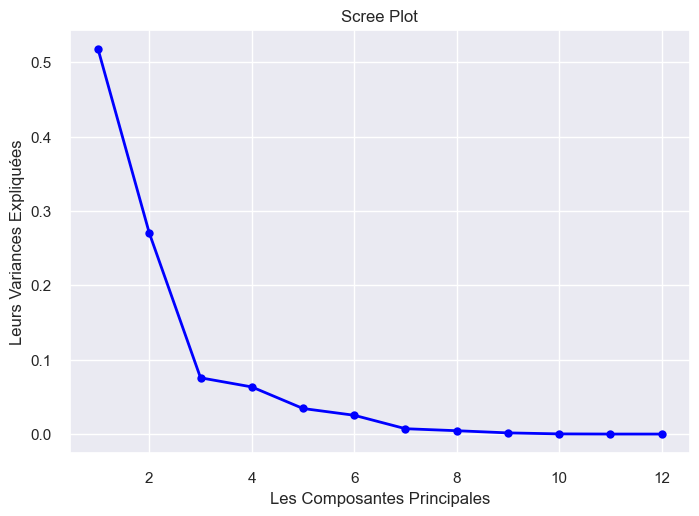

In [1388]:
# On va plotter un scree plot vour visualiser combien chaque composante détient en variance

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Les Composantes Principales')
plt.ylabel('Leurs Variances Expliquées')
plt.show()

La 1ère composante principale détient 51,7 % de la variance totale.

La 2ème composante principale détient 27% de la variance totale.

La 3ème composante principale détient 7,7 % de la variance totale.

In [1390]:
# On voit que les 3 premières composantes ont presque 85% de la variance totale

In [1391]:
pca = PCA(n_components=3)

# Fit et transformer la data
principalComponents = pca.fit_transform(X_scaled)

principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])

In [1392]:
principalDf

PC1   PC2   PC3
0   -2.59  1.97  0.87
1    2.16 -1.17  0.90
2   -0.78 -0.29 -0.50
3   -1.71  1.11  0.11
4    1.84  1.33 -0.72
..    ...   ...   ...
148  1.84 -2.28  0.14
149 -0.22 -0.38 -0.02
150 18.37 10.98 -1.42
151 -2.53  1.95  0.70
152 -1.97  0.80 -0.82

[153 rows x 3 columns]

In [1393]:
# Traçage du 3D avec plotly

import plotly.express as px

fig = px.scatter_3d(principalDf, x= "PC1", y="PC2", z="PC3",color=principalDf['PC3'])
fig.show()

### Cercles de Corrélation des ACP

Le cercle de corrélation est une visualisation montrant dans quelle mesure les variables d'origine sont corrélées avec les deux premières composantes principales.

In [1396]:
# On définit une fonction qui traçe un cercle de corrélation avec 2 composantes

def correlation_circle(pca, x_y, features):
    x,y = x_y
    fig, ax = plt.subplots(figsize=(10, 9))
    for i in range(0, pca.components_.shape[1]):
        ax.arrow(
            0,0,
            pca.components_[x, i],
            pca.components_[y, i],
            head_width=0.07,
            head_length=0.07,
            width=0.02,
        )
        plt.text(
            pca.components_[x, i] + 0.05,
            pca.components_[y, i] + 0.05,
            features[i]
        )   
    plt.plot([-1, 1], [0,0], color="red", ls="--")
    plt.plot([0,0], [-1, 1], color="green", ls="--")
    plt.xlabel('PC{} ({})%'.format(x+1, round(100*pca.explained_variance_ratio_[x], 1)))
    plt.ylabel('PC{} ({})%'.format(y+1, round(100*pca.explained_variance_ratio_[y], 1)))
    plt.title("Le Cercle des corrélations : (PC{} et PC{})".format(x+1, y+1))
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))
    plt.axis('equal')
    plt.show(block=False)

Appel de la fonction sur les composantes

### PC1 et PC2

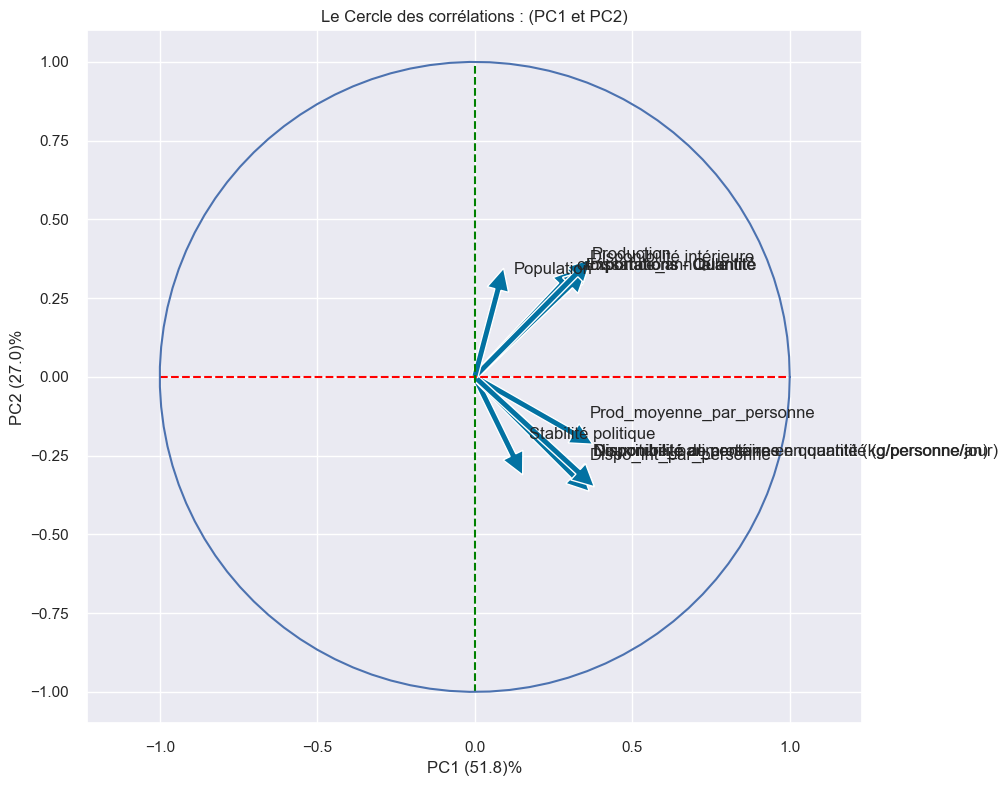

In [1399]:
correlation_circle(pca, (0,1), features)

### PC1 & PC3

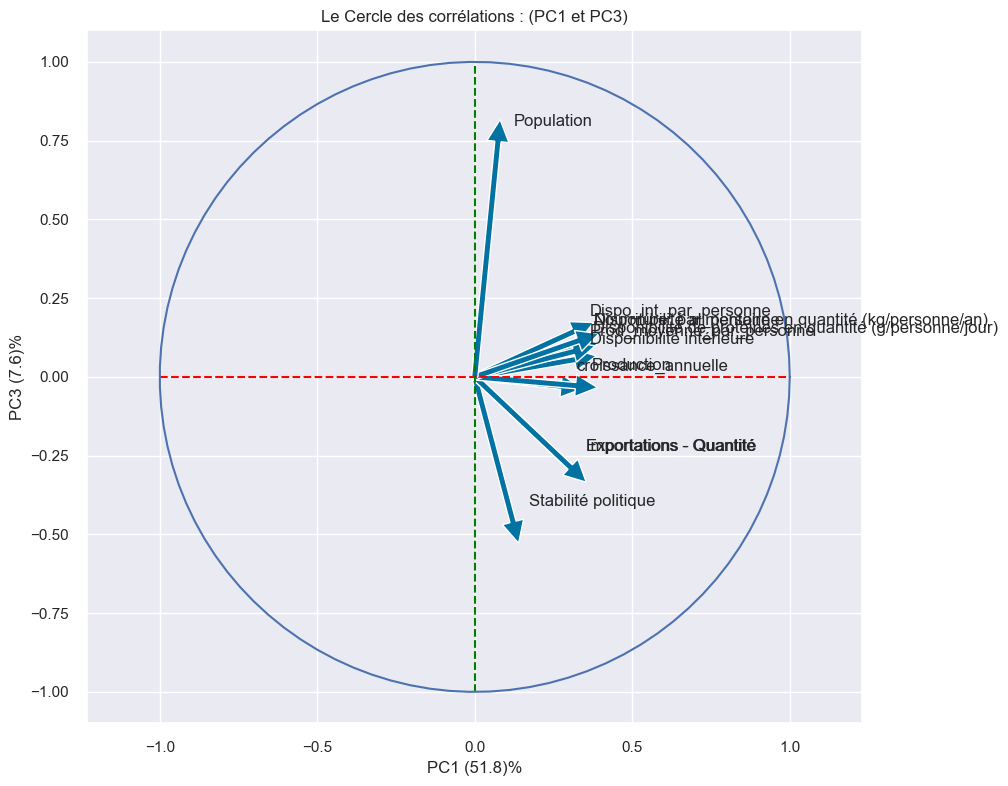

In [1401]:
correlation_circle(pca, (0,2), features)

### PC2 & PC3

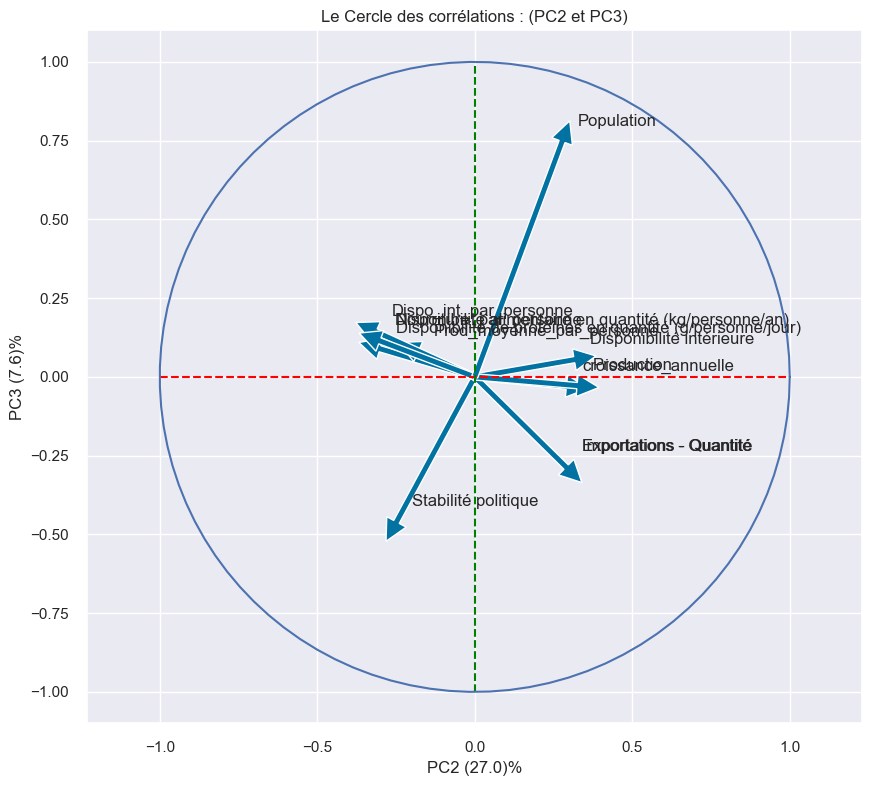

In [1403]:
correlation_circle(pca, (1,2), features)

### Projection des individus

In [1405]:
def show_projections(X_projected, x_y, pca=None, labels=None, clusters=None, alpha=1, figsize=[10,8], colors=None, marker="." ):
    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
        
    # Les points    
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, s=100, palette="deep")

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'PC{x+1} {v1}', fontsize=18)
    ax.set_ylabel(f'PC{y+1} {v2}', fontsize=18)

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='16', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur PC{x+1} et PC{y+1})", fontsize=20)
    plt.legend(fontsize='18', title_fontsize='14')
    plt.show()

In [1406]:
X_proj = pca.transform(X_scaled)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


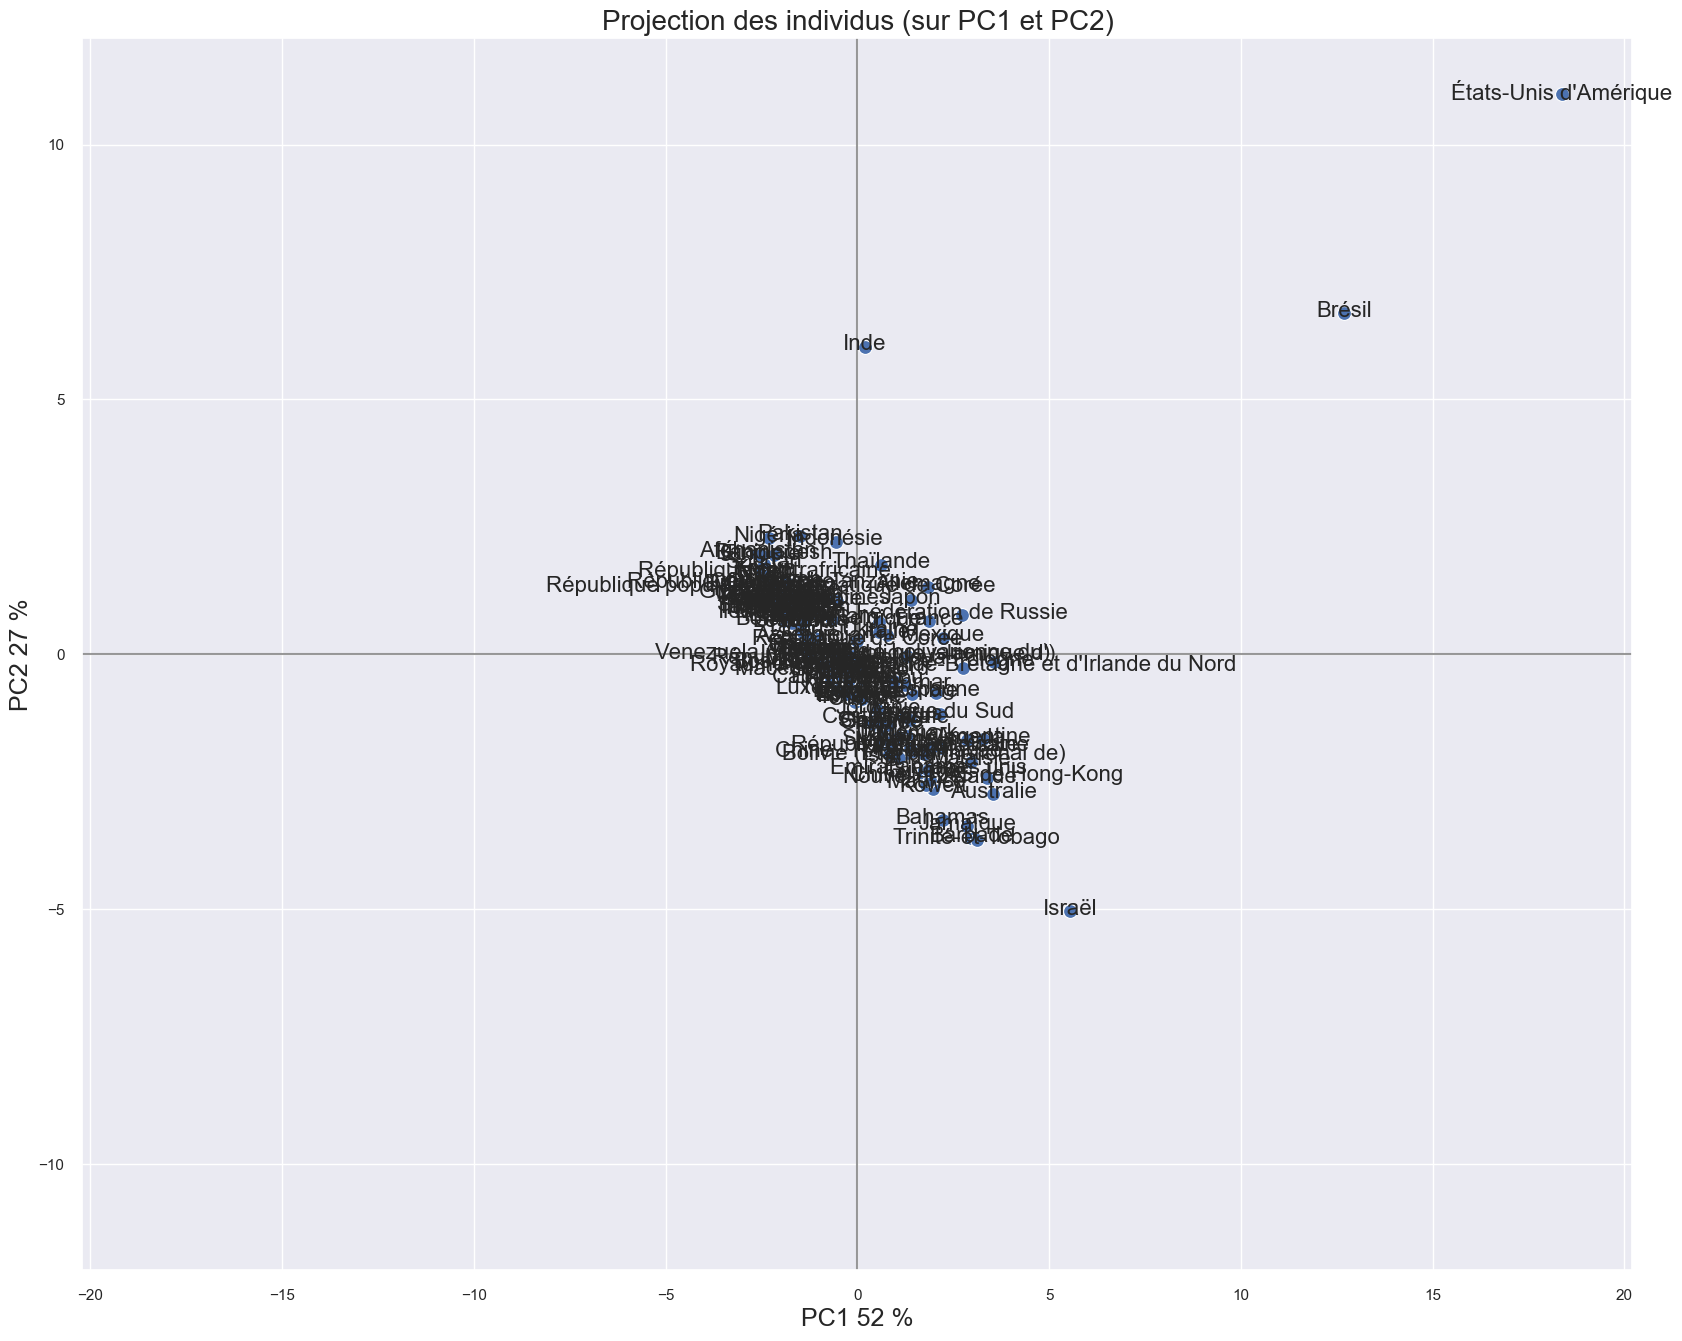

In [1407]:
show_projections(X_proj, (0,1), pca, labels=names, figsize=(20,16), marker="o")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


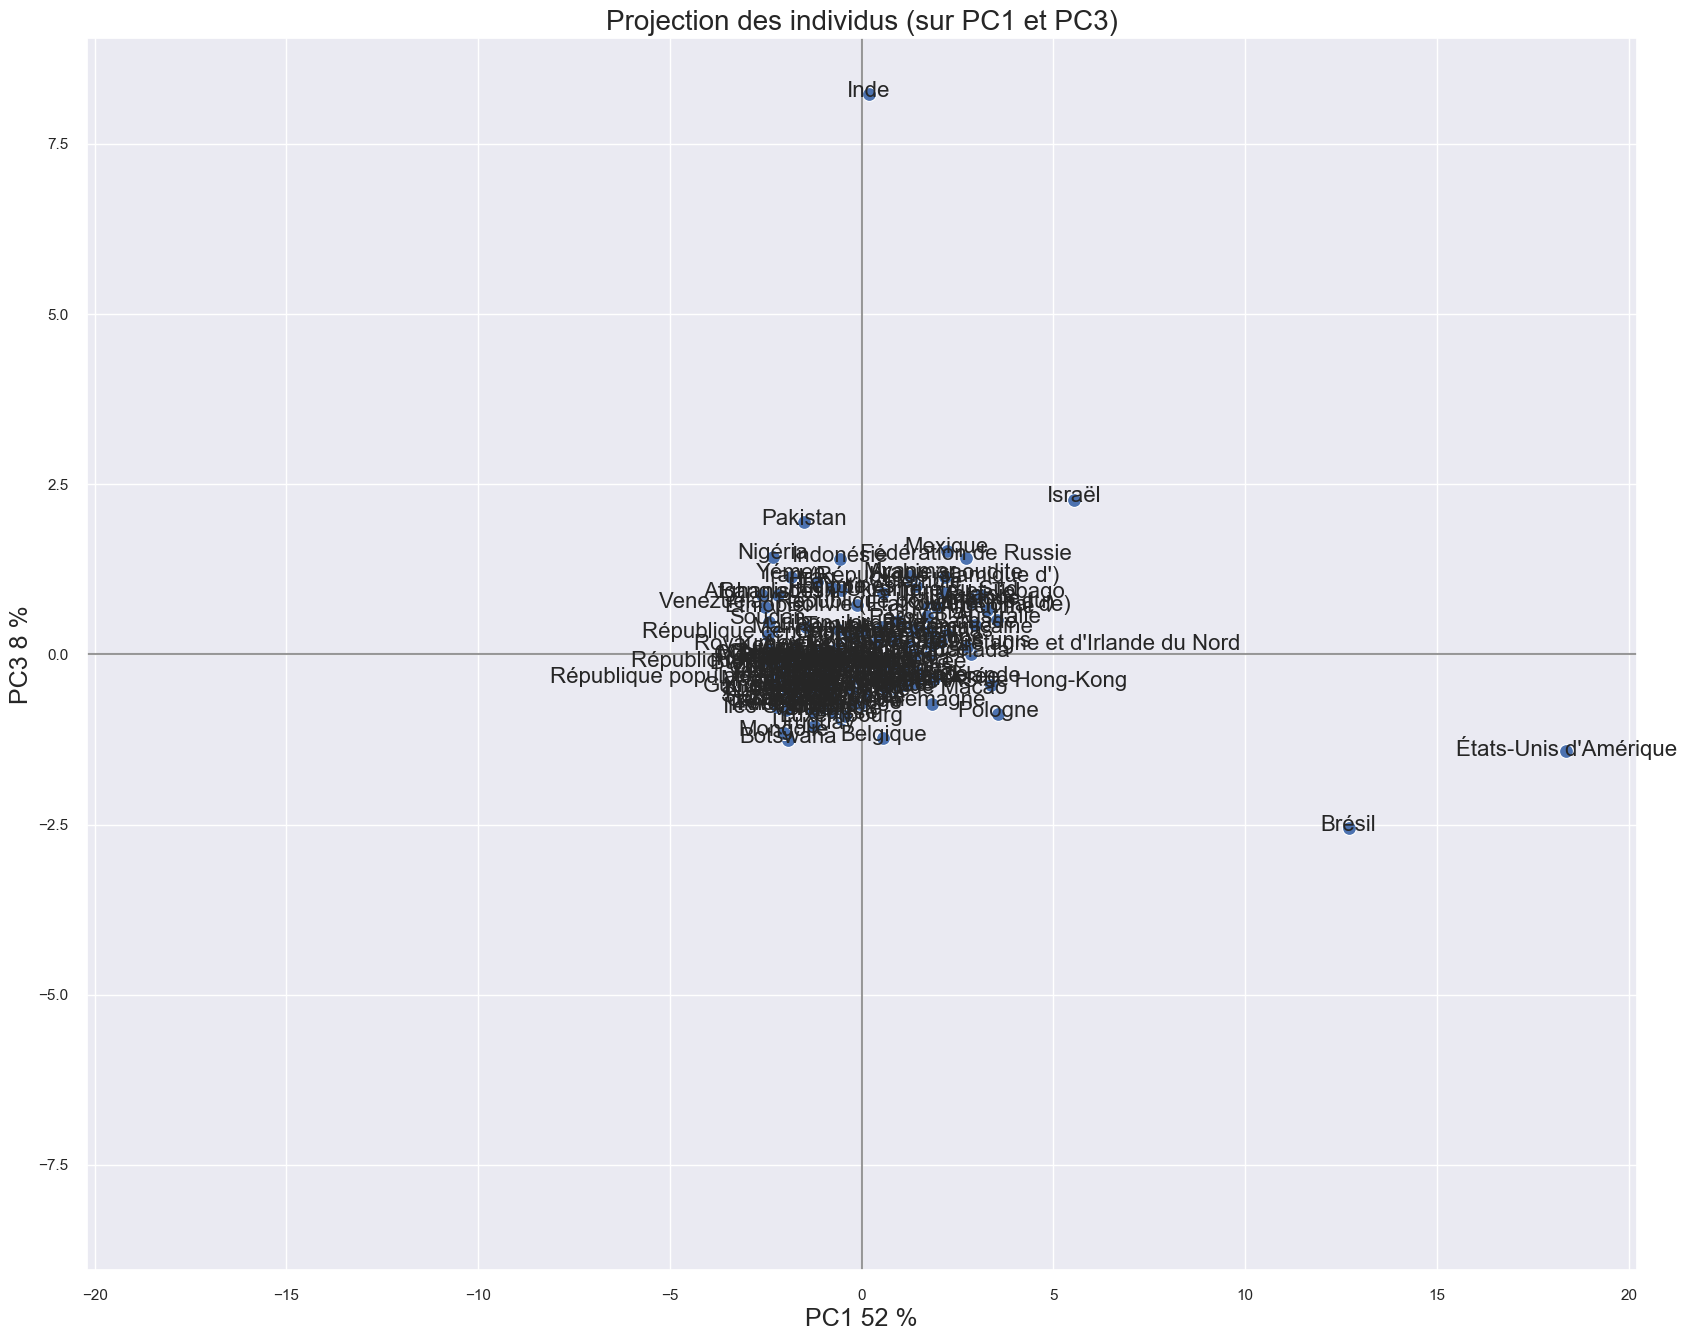

In [1408]:
show_projections(X_proj, (0,2), pca, labels=names, figsize=(20,16), marker="o")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


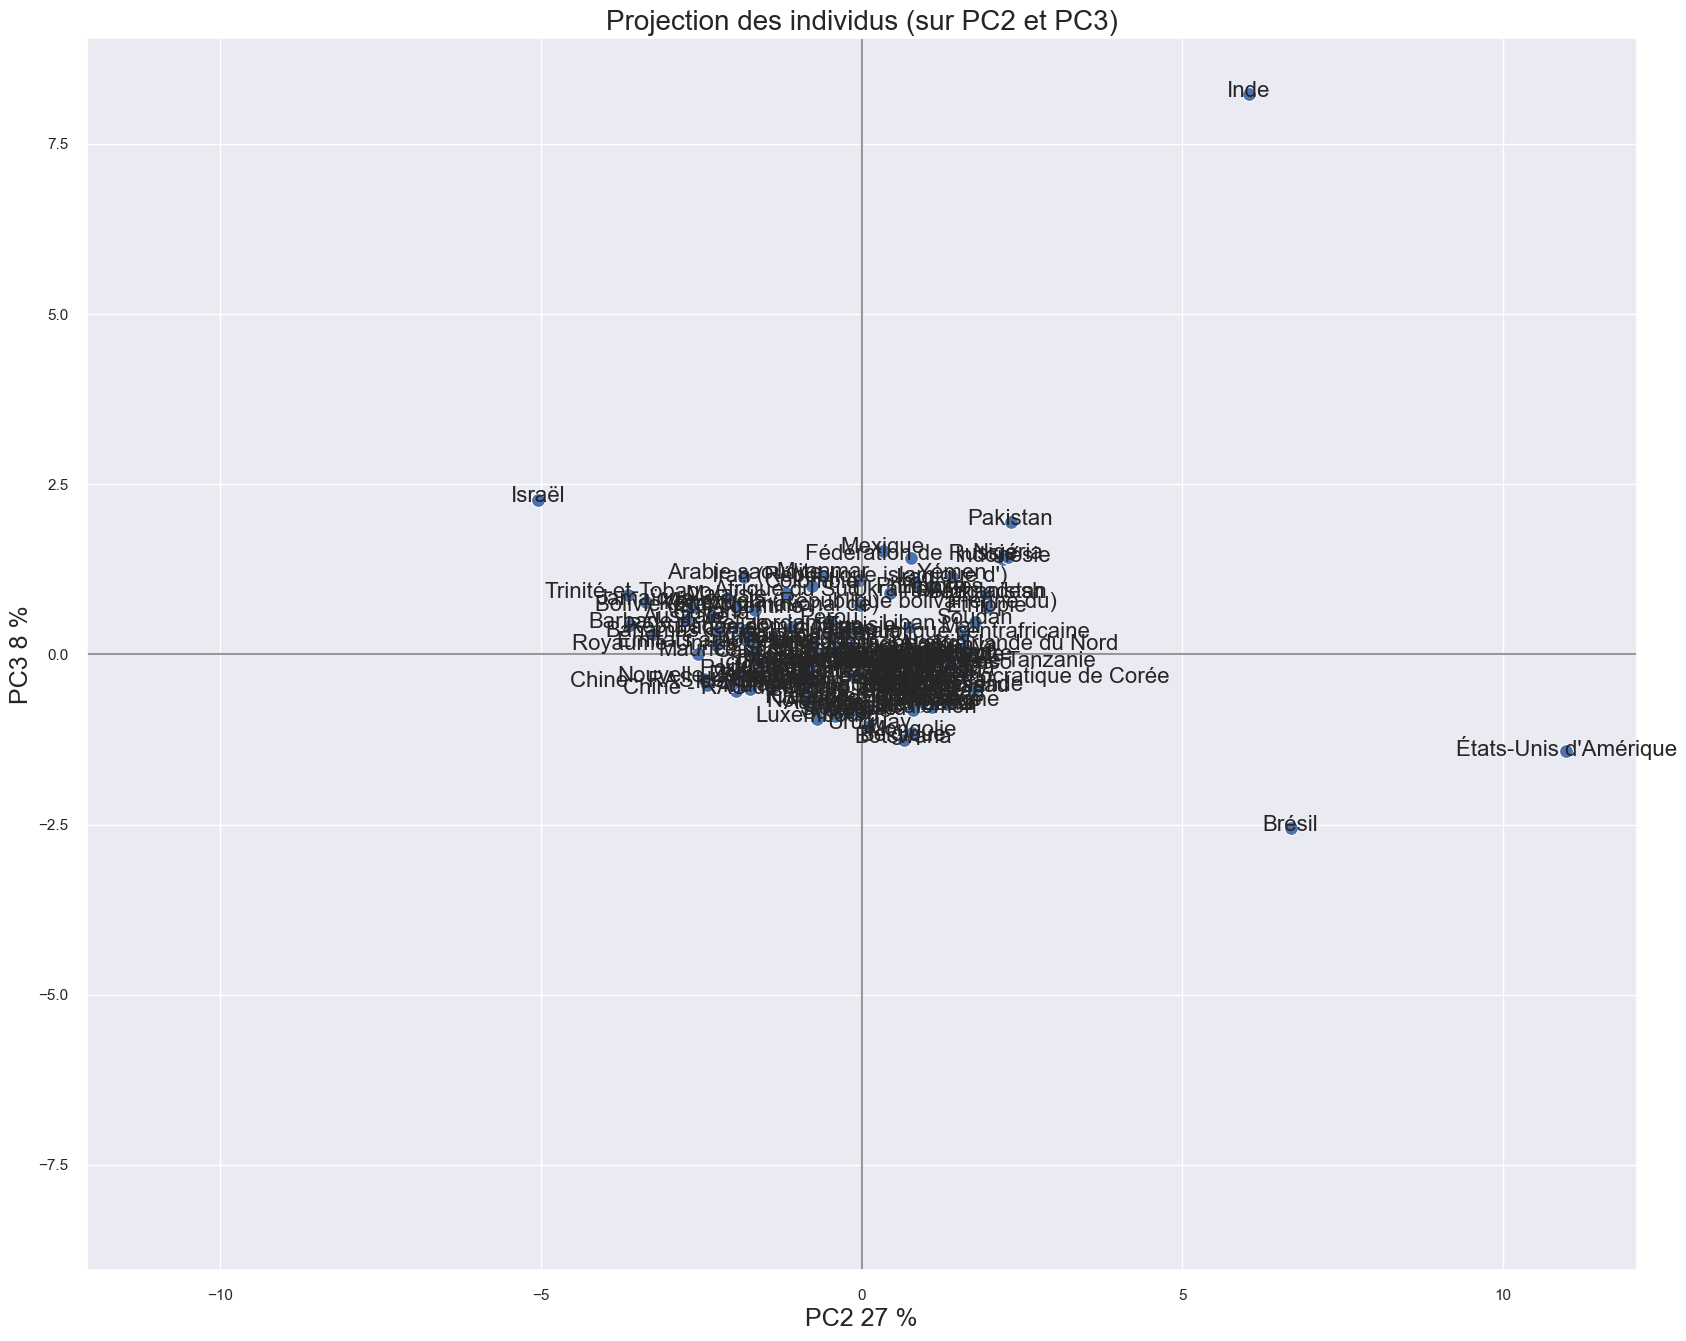

In [1409]:
show_projections(X_proj, (1,2), pca, labels=names, figsize=(20,16), marker="o")

# 3. Classification Agglomérative Hierarchique (CAH)

In [1411]:
# Initialiser les données pour clustering

X = df.values
names = df.index
features = df.index

In [1412]:
# On standardise d'abord les données

scaler = StandardScaler()

X_scaled = StandardScaler().fit_transform(X)

In [1413]:
Z = linkage(X_scaled, "ward")

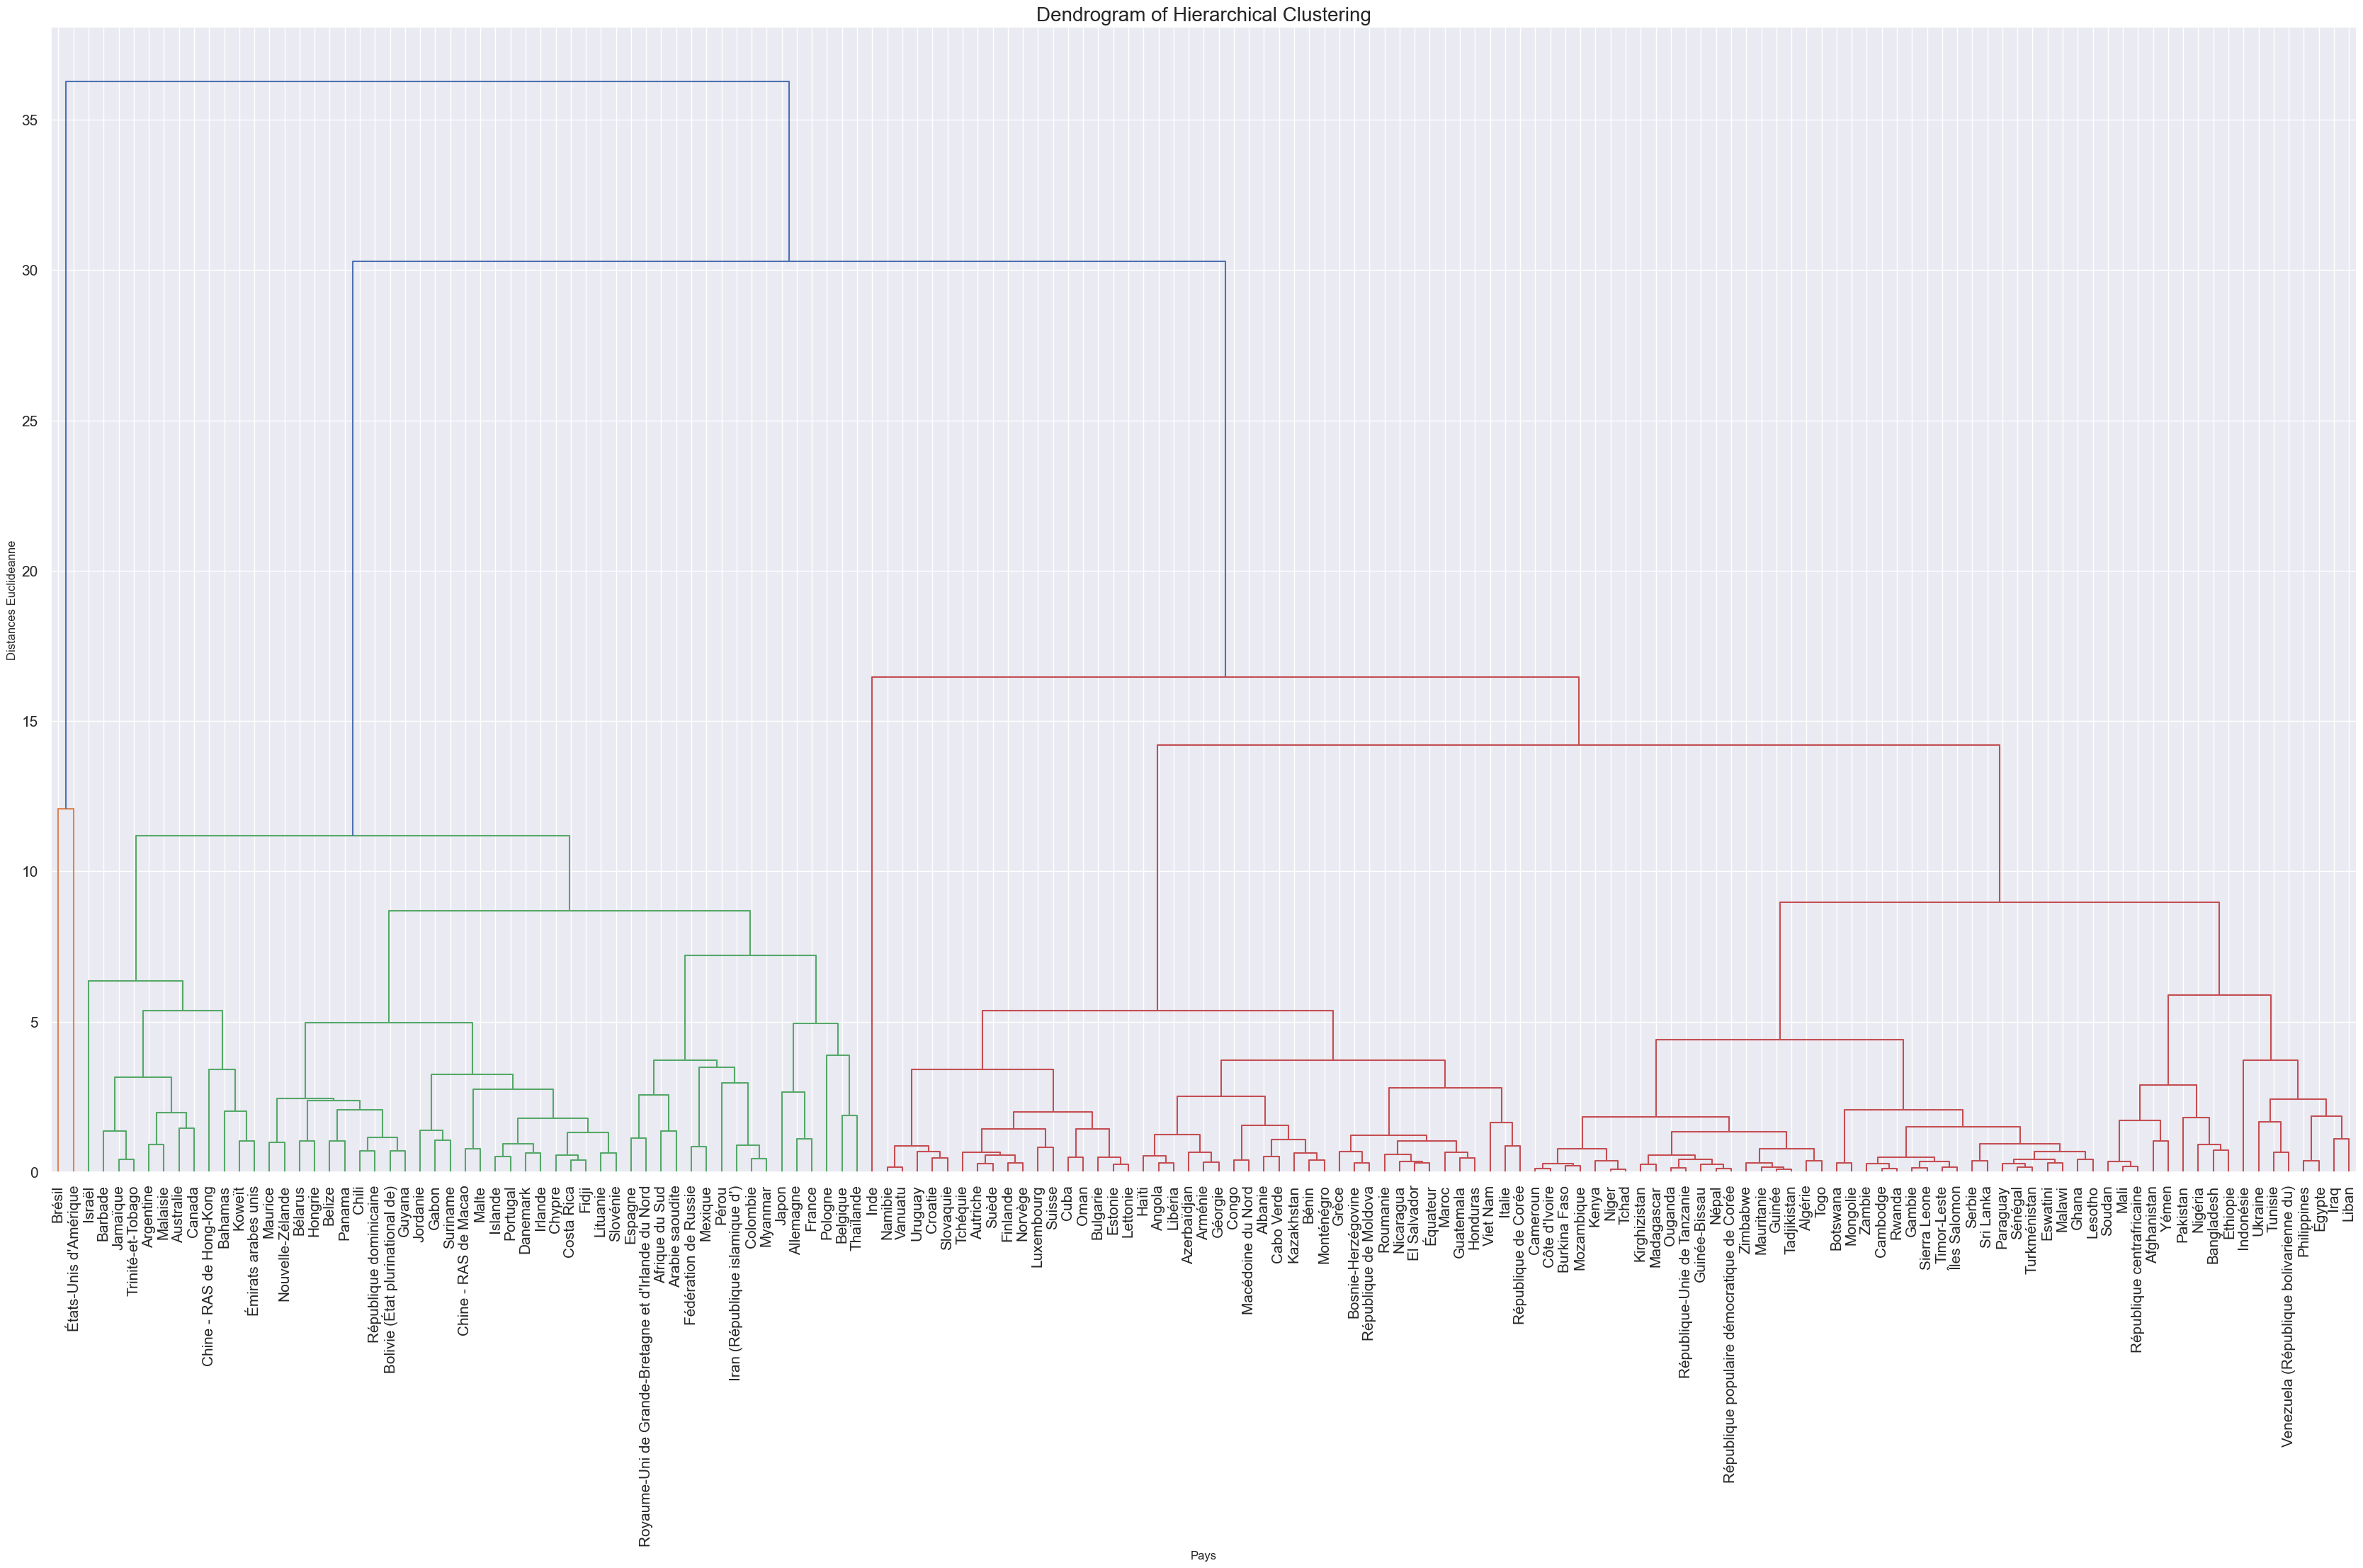

In [1414]:
def my_dendrogram(Z, names):
    fig, ax = plt.subplots(1, 1, figsize=(42, 21))

    _ = dendrogram(Z, ax=ax, labels=names, orientation = "top")

    plt.title("Dendrogram of Hierarchical Clustering", fontsize=20)
    ax.tick_params(axis='x', which='major', labelsize=15)
    ax.tick_params(axis='y', which='major', labelsize=15)
    plt.xlabel('Pays')
    plt.ylabel('Distances Euclideanne')
    plt.show()
    
my_dendrogram(Z, names)

In [1415]:
# Visualiser les 4 clusters 

clusters = fcluster(Z, 4, criterion="maxclust")
clusters

array([3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3, 1, 3,
       3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3,
       2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 4, 3, 2, 3, 2, 2,
       2, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3,
       2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2,
       2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3],
      dtype=int32)

In [1416]:
# Création d'un autre DF pour stocker les clusters avec le pays

df_clusters = pd.DataFrame({"cluster" : clusters, "Zone" : names})

display(df_clusters.head())
df_clusters.shape

cluster            Zone
0        3     Afghanistan
1        2  Afrique du Sud
2        3         Albanie
3        3         Algérie
4        2       Allemagne

(153, 2)

### Visualisation des individus avec clusters

In [1418]:
X_proj = pca.transform(X_scaled)

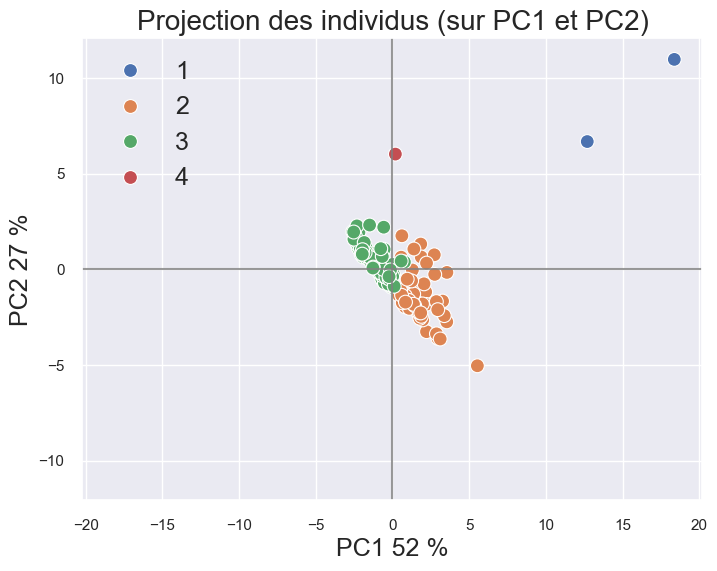

In [1419]:
show_projections(X_proj, (0,1), pca, figsize=(8,6), clusters=clusters)

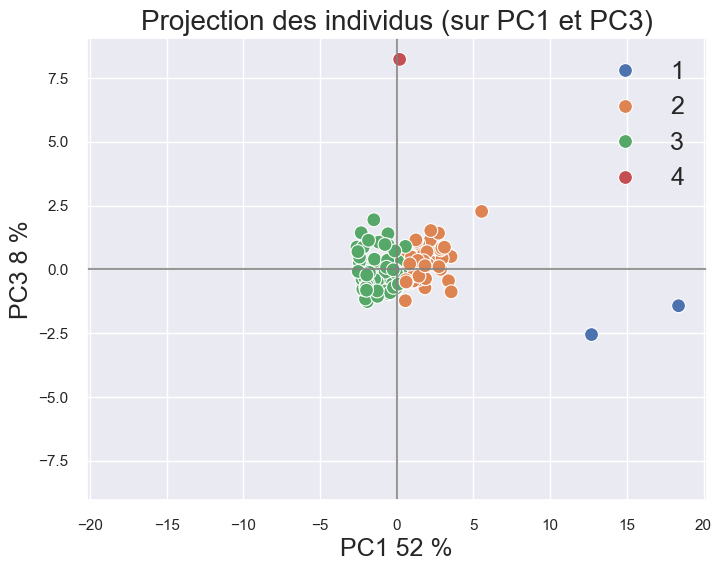

In [1420]:
show_projections(X_proj, (0,2), pca, figsize=(8,6), clusters=clusters)

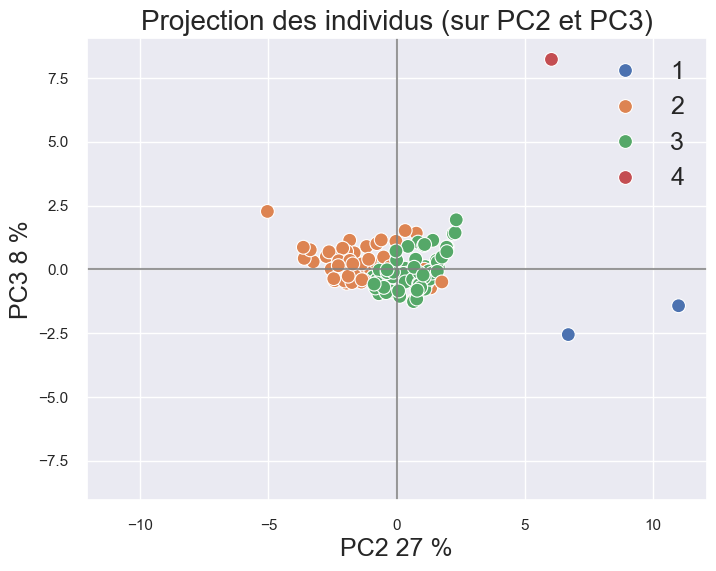

In [1421]:
show_projections(X_proj, (1,2), pca, figsize=(8,6), clusters=clusters)

### Analyse des clusters

In [1423]:
# Créér un nouveau DF avec les données du X_scaled

df_scaled = pd.DataFrame(X_scaled, columns=df.columns, index=df.index)

display(df_scaled.head())

croissance_annuelle  Stabilité politique  \
Zone                                                       
Afghanistan                   -0.24                -3.01   
Afrique du Sud                -0.03                -0.18   
Albanie                       -0.25                 0.56   
Algérie                       -0.15                -0.90   
Allemagne                      1.92                 0.78   

                Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                     
Afghanistan                                                 -1.20        
Afrique du Sud                                               1.19        
Albanie                                                     -0.16        
Algérie                                                     -0.86        
Allemagne                                                    0.05        

                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                       
Afghanistan                                                 -1.19          
Afrique du Sud                                               1.46          
Albanie                                                     -0.07          
Algérie                                                     -0.91          
Allemagne                                                    0.26          

                Disponibilité intérieure  Exportations - Quantité  \
Zone                                                                
Afghanistan                        -0.32                    -0.22   
Afrique du Sud                      0.83                    -0.08   
Albanie                            -0.32                    -0.21   
Algérie                            -0.19                    -0.21   
Allemagne                           0.62                     1.16   

                Importations - Quantité  Prod_moyenne_par_personne  \
Zone                                                                 
Afghanistan                       -0.22                      -0.93   
Afrique du Sud                    -0.08                       0.72   
Albanie                           -0.21                      -0.72   
Algérie                           -0.21                      -0.59   
Allemagne                          1.16                       0.09   

                Production  Dispo_int_par_personne  Nourriture_par_personne  \
Zone                                                                          
Afghanistan          -0.29                   -1.17                    -1.21   
Afrique du Sud        0.47                    1.07                     1.19   
Albanie              -0.29                   -0.24                    -0.17   
Algérie              -0.17                   -0.84                    -0.86   
Allemagne             0.40                    0.06                     0.05   

                Population  
Zone                        
Afghanistan          -0.01  
Afrique du Sud        0.16  
Albanie              -0.30  
Algérie               0.03  
Allemagne             0.39

In [1424]:
# Merger les données standardisées avec la colonne "cluster" et mettre dans un nouveau DF

df_scaled_clust = pd.merge(df_scaled, df_clusters, on='Zone')
display(df_scaled_clust.head())

Zone  croissance_annuelle  Stabilité politique  \
0     Afghanistan                -0.24                -3.01   
1  Afrique du Sud                -0.03                -0.18   
2         Albanie                -0.25                 0.56   
3         Algérie                -0.15                -0.90   
4       Allemagne                 1.92                 0.78   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                              -1.20        
1                                               1.19        
2                                              -0.16        
3                                              -0.86        
4                                               0.05        

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              -1.19          
1                                               1.46          
2                                              -0.07          
3                                              -0.91          
4                                               0.26          

   Disponibilité intérieure  Exportations - Quantité  Importations - Quantité  \
0                     -0.32                    -0.22                    -0.22   
1                      0.83                    -0.08                    -0.08   
2                     -0.32                    -0.21                    -0.21   
3                     -0.19                    -0.21                    -0.21   
4                      0.62                     1.16                     1.16   

   Prod_moyenne_par_personne  Production  Dispo_int_par_personne  \
0                      -0.93       -0.29                   -1.17   
1                       0.72        0.47                    1.07   
2                      -0.72       -0.29                   -0.24   
3                      -0.59       -0.17                   -0.84   
4                       0.09        0.40                    0.06   

   Nourriture_par_personne  Population  cluster  
0                    -1.21       -0.01        3  
1                     1.19        0.16        2  
2                    -0.17       -0.30        3  
3                    -0.86        0.03        3  
4                     0.05        0.39        2

In [1425]:
# Utiliser la colonne Zone comme index

df_scaled_clust.set_index('Zone', inplace=True)

In [1426]:
# Calculer la moyenne de chaque cluster par variable

df_scaled_mean = df_scaled_clust.groupby('cluster').mean()

df_scaled_mean

croissance_annuelle  Stabilité politique  \
cluster                                             
1                       6.12                 0.02   
2                       0.07                 0.50   
3                      -0.18                -0.26   
4                       1.29                -0.73   

         Disponibilité alimentaire en quantité (kg/personne/an)  \
cluster                                                           
1                                                     2.32        
2                                                     1.02        
3                                                    -0.58        
4                                                    -1.16        

         Disponibilité de protéines en quantité (g/personne/jour)  \
cluster                                                             
1                                                     2.18          
2                                                     1.02          
3                                                    -0.57          
4                                                    -1.15          

         Disponibilité intérieure  Exportations - Quantité  \
cluster                                                      
1                            7.50                     8.22   
2                            0.11                     0.05   
3                           -0.23                    -0.19   
4                            1.69                    -0.21   

         Importations - Quantité  Prod_moyenne_par_personne  Production  \
cluster                                                                   
1                           8.22                       2.96        7.97   
2                           0.05                       0.93        0.07   
3                          -0.19                      -0.54       -0.21   
4                          -0.21                      -0.82        1.33   

         Dispo_int_par_personne  Nourriture_par_personne  Population  
cluster                                                               
1                          2.02                     2.33        1.96  
2                          1.04                     1.02       -0.10  
3                         -0.58                    -0.58       -0.10  
4                         -1.09                    -1.16       11.17

### Inteprétation des clusters

Cluster 1 : index population élevé, index importation volailles max, index stabilité politique positive, index croissance annuelle positive

Cluster 2 : index population négative, index importation volailles faible, index stabilité politique faible, index croissance annuelle faible

Cluster 3 : index population négative, index importation volailles négative, index stabilité politique négative, index croissance annuelle négative

Cluster 4 : index population maximum, index importation volailles négative, index stabilité politique négative, index croissance annuelle positive

### Heatmap des clusters

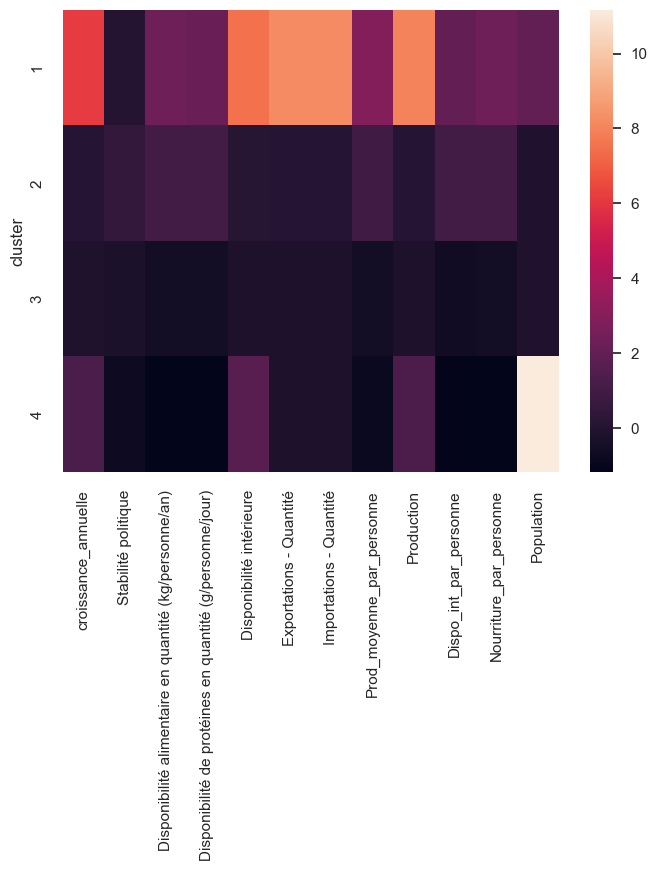

In [1433]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_scaled_mean)
plt.show()

### Boxplot des clusters

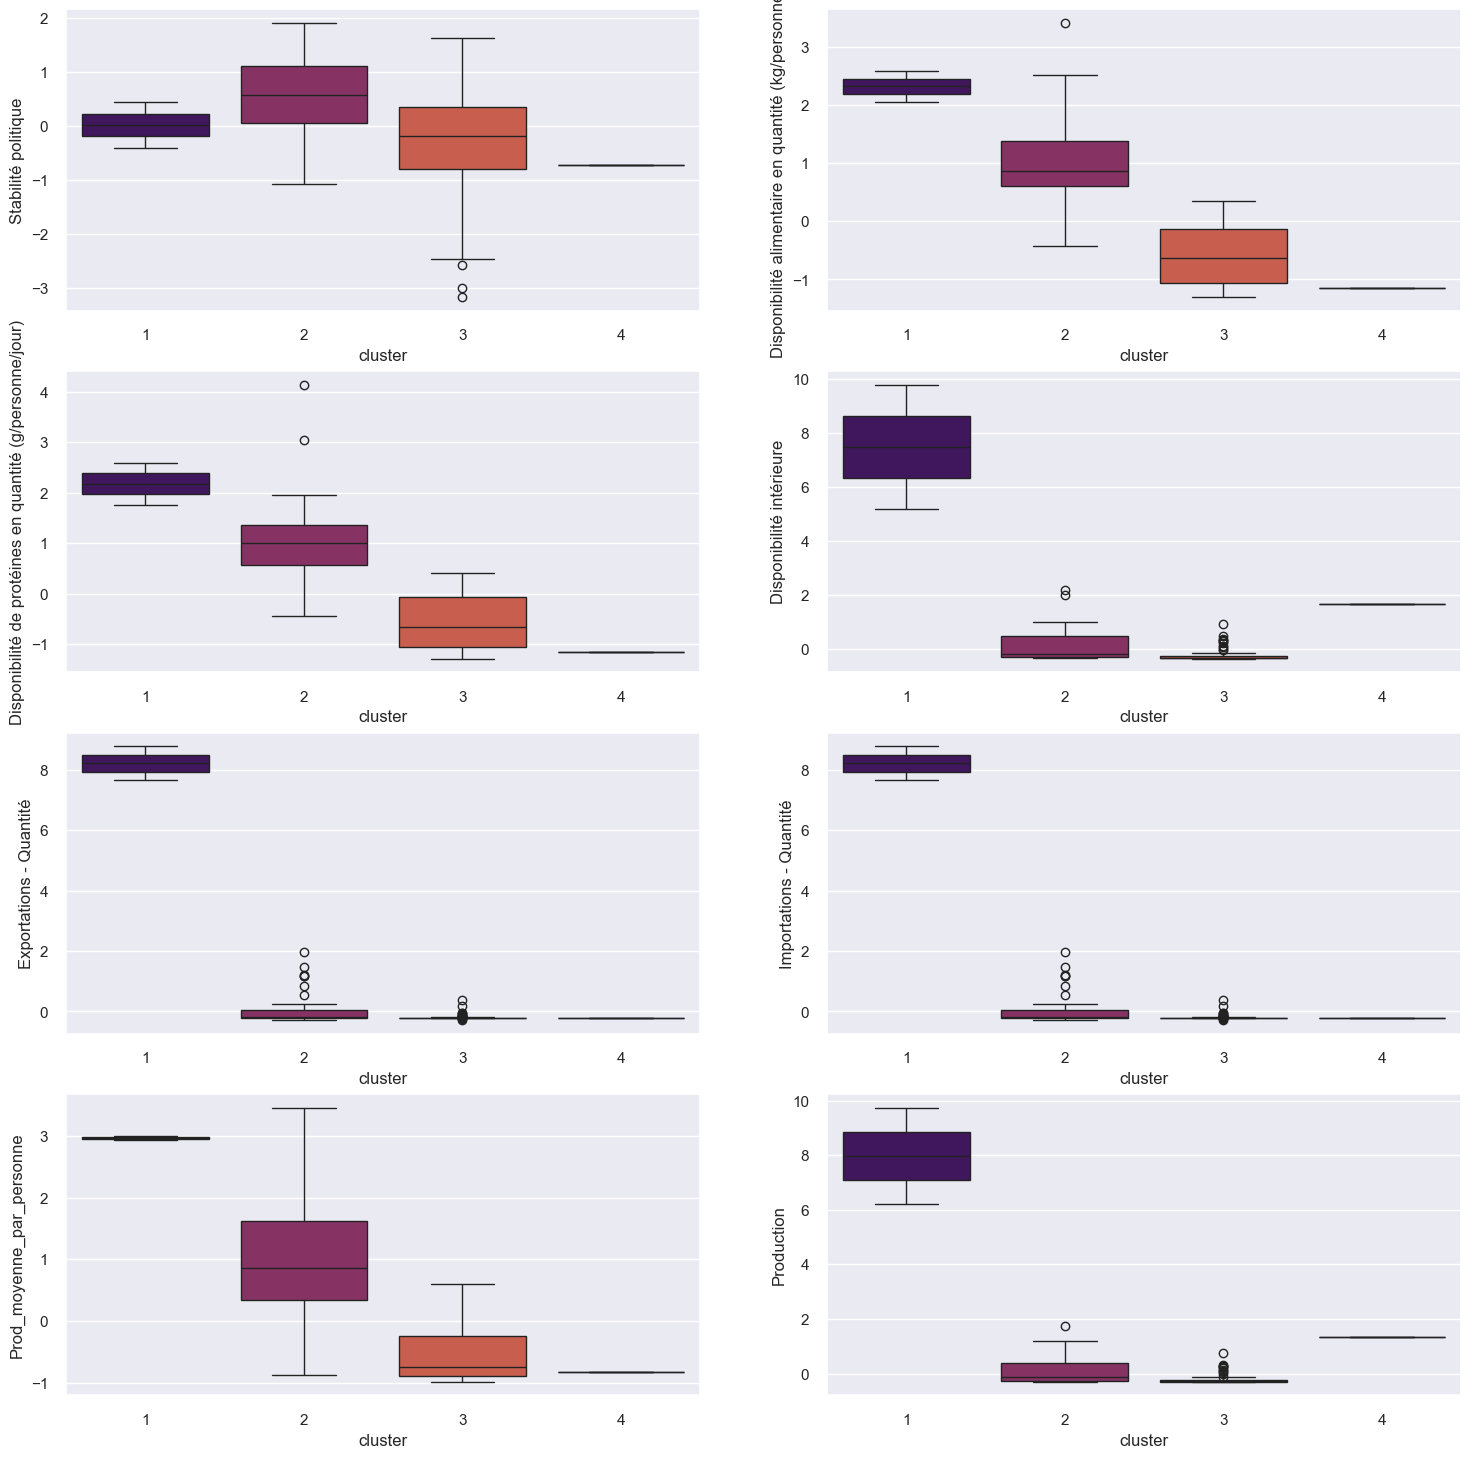

In [1435]:
fig, axes = plt.subplots(4, 2, figsize=(18,18))

for i in range(4):
    for j in range(2):
        sns.boxplot(ax=axes[i,j], 
                    data=df_scaled_clust, 
                    x='cluster', 
                    y=df_scaled_clust.columns[1:-1][2*i+j], palette = "inferno")

plt.show()

### Radar chart des clusters

In [1437]:
cluster_list = []

# Création d'une boucle pour stocker les informations de chaque cluster dans un df
for i in range(4):
    cluster_df = pd.DataFrame({
        f'Cluster {i} Col A': df_scaled_clust.columns[0:-1],
        f'Cluster {i} Col B': df_scaled_mean.iloc[i].values
    })
    cluster_list.append(cluster_df)

# Concaténation des df
cluster_df_concat = pd.concat(cluster_list, axis=1)
    
cluster_df_concat

Cluster 0 Col A  Cluster 0 Col B  \
0                                 croissance_annuelle             6.12   
1                                 Stabilité politique             0.02   
2   Disponibilité alimentaire en quantité (kg/pers...             2.32   
3   Disponibilité de protéines en quantité (g/pers...             2.18   
4                            Disponibilité intérieure             7.50   
5                             Exportations - Quantité             8.22   
6                             Importations - Quantité             8.22   
7                           Prod_moyenne_par_personne             2.96   
8                                          Production             7.97   
9                              Dispo_int_par_personne             2.02   
10                            Nourriture_par_personne             2.33   
11                                         Population             1.96   

                                      Cluster 1 Col A  Cluster 1 Col B  \
0                                 croissance_annuelle             0.07   
1                                 Stabilité politique             0.50   
2   Disponibilité alimentaire en quantité (kg/pers...             1.02   
3   Disponibilité de protéines en quantité (g/pers...             1.02   
4                            Disponibilité intérieure             0.11   
5                             Exportations - Quantité             0.05   
6                             Importations - Quantité             0.05   
7                           Prod_moyenne_par_personne             0.93   
8                                          Production             0.07   
9                              Dispo_int_par_personne             1.04   
10                            Nourriture_par_personne             1.02   
11                                         Population            -0.10   

                                      Cluster 2 Col A  Cluster 2 Col B  \
0                                 croissance_annuelle            -0.18   
1                                 Stabilité politique            -0.26   
2   Disponibilité alimentaire en quantité (kg/pers...            -0.58   
3   Disponibilité de protéines en quantité (g/pers...            -0.57   
4                            Disponibilité intérieure            -0.23   
5                             Exportations - Quantité            -0.19   
6                             Importations - Quantité            -0.19   
7                           Prod_moyenne_par_personne            -0.54   
8                                          Production            -0.21   
9                              Dispo_int_par_personne            -0.58   
10                            Nourriture_par_personne            -0.58   
11                                         Population            -0.10   

                                      Cluster 3 Col A  Cluster 3 Col B  
0                                 croissance_annuelle             1.29  
1                                 Stabilité politique            -0.73  
2   Disponibilité alimentaire en quantité (kg/pers...            -1.16  
3   Disponibilité de protéines en quantité (g/pers...            -1.15  
4                            Disponibilité intérieure             1.69  
5                             Exportations - Quantité            -0.21  
6                             Importations - Quantité            -0.21  
7                           Prod_moyenne_par_personne            -0.82  
8                                          Production             1.33  
9                              Dispo_int_par_personne            -1.09  
10                            Nourriture_par_personne            -1.16  
11                                         Population            11.17

In [1438]:
# Création d'une boucle pour générer les 4 radar charts à travers les informations récupérées dans "cluster_list"
import plotly.express as px

for i, cluster_df in enumerate(cluster_list):
    theta = cluster_df[f'Cluster {i} Col A'].values
    values = cluster_df[f'Cluster {i} Col B'].values
    fig = px.line_polar(cluster_df, 
                        r=f'Cluster {i} Col B', 
                        theta=f'Cluster {i} Col A', 
                        line_close=True,
                        title=f'Cluster {i}')
    fig.show()

In [1439]:
import plotly.graph_objs as go

In [1440]:
fig = go.Figure()

for i, cluster_df in enumerate(cluster_list):
    theta = cluster_df[f'Cluster {i} Col A'].values
    values = cluster_df[f'Cluster {i} Col B'].values
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=theta,
        fill='toself',
        name=f'Cluster {i}'
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[-5, 5]
        )),
    showlegend=True
)

fig.show()

# 4. K-Means clustering

In [1442]:
from yellowbrick.cluster import KElbowVisualizer ,silhouette_visualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler

Pour trouver la meilleure valeur de k en K-Means algorithme, on utilise deux méthodes:

### La Méthode Elbow (Coude)

La méthode du coude consiste à déterminer le K optimal via une représentation graphique. 
Elle consiste à choisir une plage de valeurs K (généralement de 1 à n, où n est un nombre choisi) et à 
calculer la somme des carrés intra-cluster (WCSS) pour chaque valeur K de la plage.

In [1446]:
# Récupération de la scaled data

X_scaled

array([[-0.24251484, -3.00970732, -1.20424562, ..., -1.16735812,
        -1.20592616, -0.01293708],
       [-0.02972972, -0.17543095,  1.1898075 , ...,  1.07344783,
         1.19236911,  0.16490167],
       [-0.24605201,  0.558545  , -0.16490699, ..., -0.23994134,
        -0.16878304, -0.29980757],
       ...,
       [11.28019174,  0.43433368,  2.59077712, ...,  2.27230203,
         2.59439172,  2.46655393],
       [-0.20854588, -1.75630223, -1.30236256, ..., -1.25797131,
        -1.30301614,  0.5889569 ],
       [-0.25284455,  0.35529012, -0.99960174, ..., -0.9691987 ,
        -0.98128155, -0.31910856]])

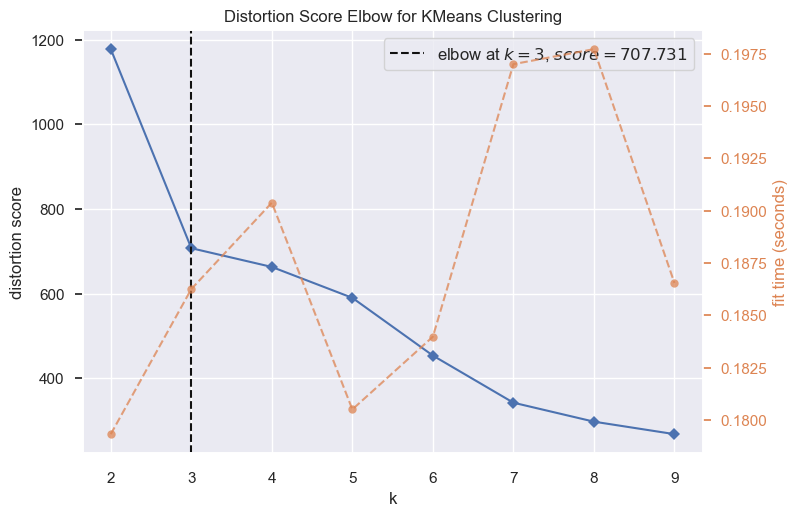

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1447]:
# Instantiate the clustering model and visualizer

km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Méthode Silhouette

In [1449]:
SK = range(2,10)
sil_score = []
for i in SK:
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit( X_scaled).labels_
    score = metrics.silhouette_score(X_scaled,labels,metric="euclidean",sample_size=1000,random_state=200)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(X_scaled,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.41850438915350513
Silhouette score for k(clusters) = 3 is 0.30357529677096323
Silhouette score for k(clusters) = 4 is 0.3237762584399535
Silhouette score for k(clusters) = 5 is 0.2987681178151548
Silhouette score for k(clusters) = 6 is 0.2946280539117385
Silhouette score for k(clusters) = 7 is 0.30015233102437855
Silhouette score for k(clusters) = 8 is 0.2643534400556955
Silhouette score for k(clusters) = 9 is 0.22892308909242035


In [1450]:
sil_centers = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sil_centers

Clusters  Sil Score
0         2       0.42
1         3       0.30
2         4       0.32
3         5       0.30
4         6       0.29
5         7       0.30
6         8       0.26
7         9       0.23

<Axes: xlabel='Clusters', ylabel='Sil Score'>

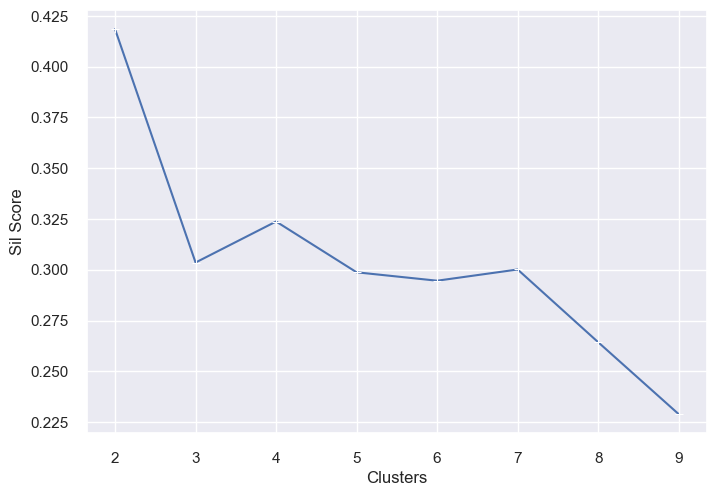

In [1451]:
sns.lineplot(x = 'Clusters', y = 'Sil Score', data = sil_centers, marker="+")

In [1452]:
# Maintenant qu'on a défini que k = 3, on peut traçer un scatterplot avec deux variables pour voir le clustering

In [1453]:
# Dans ce jeu de données, nous avons six features, mais nous ne pouvons facilement en représenter graphiquement que deux à la fois. 
# Nous pouvons essayer de représenter graphiquement plusieurs tracés bidimensionnels, comme dans le code ci-dessous, 
# mais nous ne pouvons pas représenter toutes les caractéristiques simultanément.

### Projection avec les clusters (k= 3)

In [1455]:
pca = decomposition.PCA(n_components= 3).fit(X_scaled)
Y_projected = pca.transform(X_scaled)

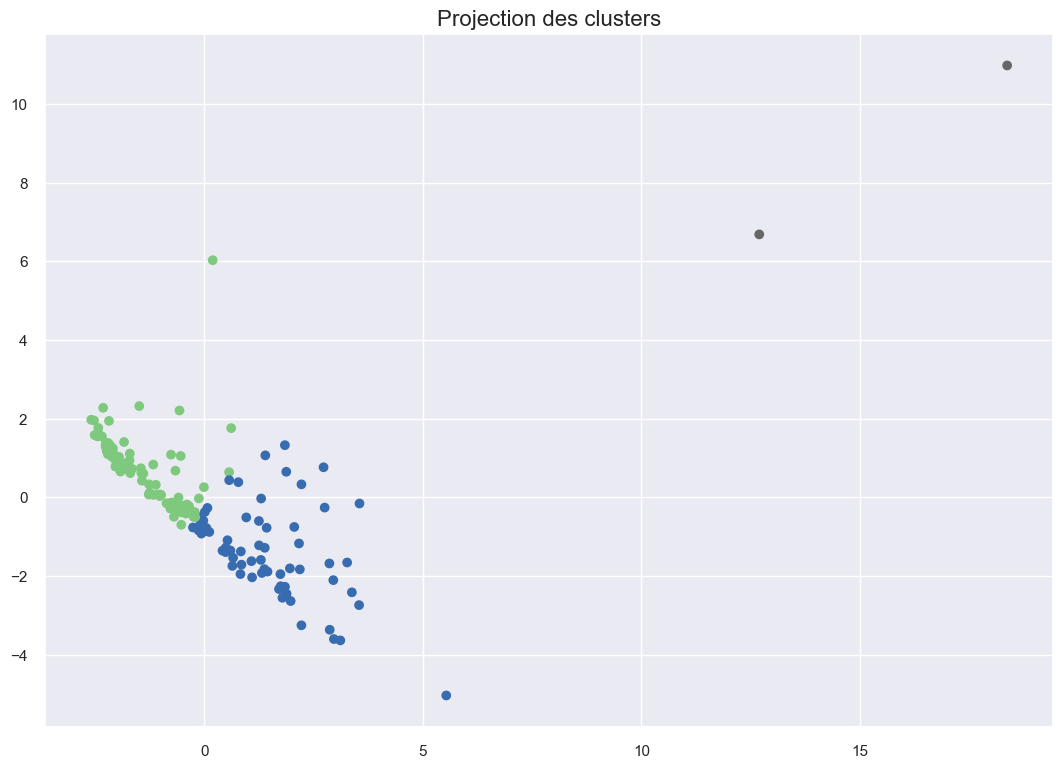

In [1456]:
model = KMeans(n_clusters= 3, random_state=3)
model.fit(X_scaled)
clusters = model.labels_

plt.figure(figsize=(13,9))

# Affichage des points des clusters
plt.scatter(Y_projected[:, 0], Y_projected[:, 1], c=model.labels_, cmap='Accent')
plt.title('Projection des clusters', fontsize=16)

plt.show()

### Projection des centroids

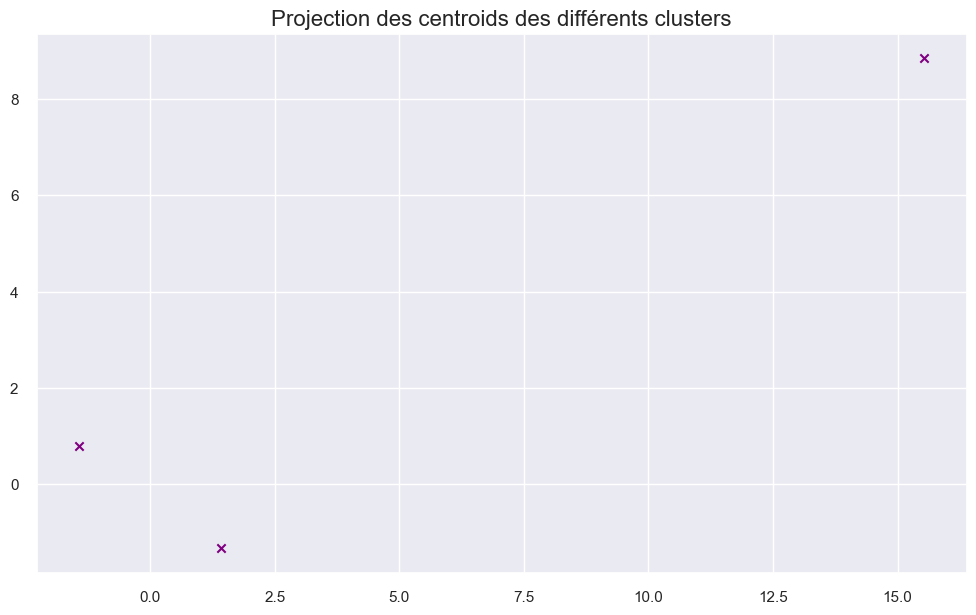

In [1458]:
centroids = model.cluster_centers_
centroids_projected = pca.transform(centroids)

# Affichage des centroids
plt.figure(figsize=(12,7))
plt.scatter(centroids_projected[:,0], centroids_projected[:,1], marker='x', c='purple')
plt.title('Projection des centroids des différents clusters', fontsize=16)
plt.show()

### Traçage des centroids avec le graphique

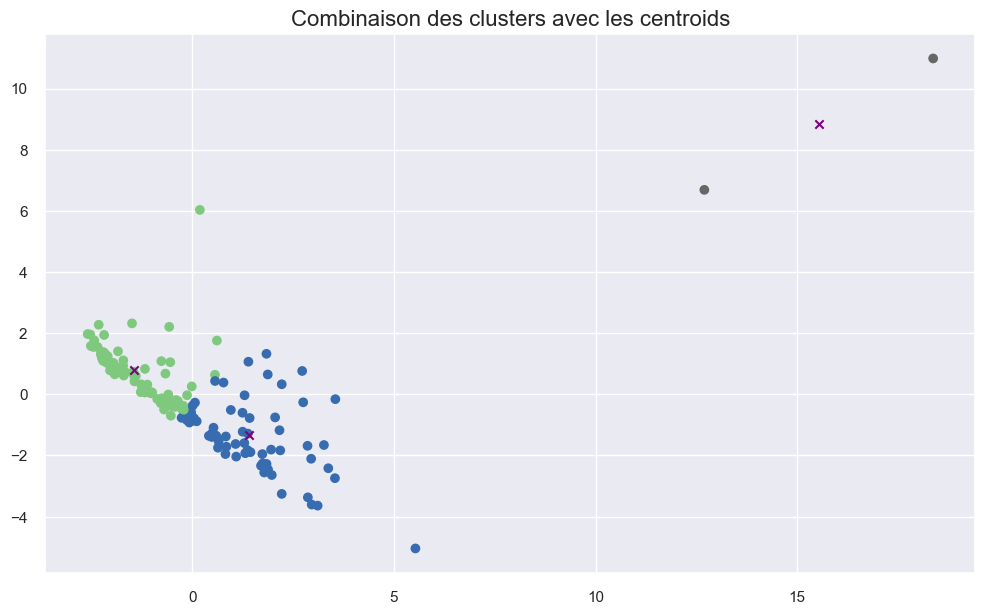

In [1460]:
# Combinaison des deux graphiques précédents
# Affichage des centroids
plt.figure(figsize=(12,7))

plt.scatter(Y_projected[:, 0], Y_projected[:, 1], c=model.labels_, cmap='Accent')
plt.scatter(centroids_projected[:,0], centroids_projected[:,1], marker='x', c='purple')
plt.title('Combinaison des clusters avec les centroids', fontsize=16)
plt.show()

In [1461]:
# Créér un nouveau DF avec les données du X_scaled

df_scaled_kmeans = pd.DataFrame(X_scaled, columns=df.columns, index=df.index)

df_scaled_kmeans.head()

croissance_annuelle  Stabilité politique  \
Zone                                                       
Afghanistan                   -0.24                -3.01   
Afrique du Sud                -0.03                -0.18   
Albanie                       -0.25                 0.56   
Algérie                       -0.15                -0.90   
Allemagne                      1.92                 0.78   

                Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                     
Afghanistan                                                 -1.20        
Afrique du Sud                                               1.19        
Albanie                                                     -0.16        
Algérie                                                     -0.86        
Allemagne                                                    0.05        

                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                       
Afghanistan                                                 -1.19          
Afrique du Sud                                               1.46          
Albanie                                                     -0.07          
Algérie                                                     -0.91          
Allemagne                                                    0.26          

                Disponibilité intérieure  Exportations - Quantité  \
Zone                                                                
Afghanistan                        -0.32                    -0.22   
Afrique du Sud                      0.83                    -0.08   
Albanie                            -0.32                    -0.21   
Algérie                            -0.19                    -0.21   
Allemagne                           0.62                     1.16   

                Importations - Quantité  Prod_moyenne_par_personne  \
Zone                                                                 
Afghanistan                       -0.22                      -0.93   
Afrique du Sud                    -0.08                       0.72   
Albanie                           -0.21                      -0.72   
Algérie                           -0.21                      -0.59   
Allemagne                          1.16                       0.09   

                Production  Dispo_int_par_personne  Nourriture_par_personne  \
Zone                                                                          
Afghanistan          -0.29                   -1.17                    -1.21   
Afrique du Sud        0.47                    1.07                     1.19   
Albanie              -0.29                   -0.24                    -0.17   
Algérie              -0.17                   -0.84                    -0.86   
Allemagne             0.40                    0.06                     0.05   

                Population  
Zone                        
Afghanistan          -0.01  
Afrique du Sud        0.16  
Albanie              -0.30  
Algérie               0.03  
Allemagne             0.39

In [1462]:
# Regroupement des clusters modifiés

clusters = model.labels_
df_clusters = pd.DataFrame(index=[df.index])
df_clusters['Cluster'] = clusters
df_clusters = df_clusters.reset_index()
display(df_clusters.head())
df_clusters['Cluster'].value_counts()

Zone  Cluster
0     Afghanistan        0
1  Afrique du Sud        1
2         Albanie        0
3         Algérie        0
4       Allemagne        1

Cluster
0    86
1    65
2     2
Name: count, dtype: int64

In [1463]:
df_kmeans = pd.merge(df_scaled_kmeans, df_clusters, on='Zone')
display(df_kmeans.head())

Zone  croissance_annuelle  Stabilité politique  \
0     Afghanistan                -0.24                -3.01   
1  Afrique du Sud                -0.03                -0.18   
2         Albanie                -0.25                 0.56   
3         Algérie                -0.15                -0.90   
4       Allemagne                 1.92                 0.78   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                              -1.20        
1                                               1.19        
2                                              -0.16        
3                                              -0.86        
4                                               0.05        

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              -1.19          
1                                               1.46          
2                                              -0.07          
3                                              -0.91          
4                                               0.26          

   Disponibilité intérieure  Exportations - Quantité  Importations - Quantité  \
0                     -0.32                    -0.22                    -0.22   
1                      0.83                    -0.08                    -0.08   
2                     -0.32                    -0.21                    -0.21   
3                     -0.19                    -0.21                    -0.21   
4                      0.62                     1.16                     1.16   

   Prod_moyenne_par_personne  Production  Dispo_int_par_personne  \
0                      -0.93       -0.29                   -1.17   
1                       0.72        0.47                    1.07   
2                      -0.72       -0.29                   -0.24   
3                      -0.59       -0.17                   -0.84   
4                       0.09        0.40                    0.06   

   Nourriture_par_personne  Population  Cluster  
0                    -1.21       -0.01        0  
1                     1.19        0.16        1  
2                    -0.17       -0.30        0  
3                    -0.86        0.03        0  
4                     0.05        0.39        1

In [1464]:
# Utiliser la colonne Zone comme index désormais

df_kmeans.set_index('Zone', inplace=True)

In [1465]:
# Calculer la moyenne de chaque cluster

df_kmeans_mean = df_kmeans.groupby('Cluster').agg(['mean'])

display(df_kmeans_mean.head())

croissance_annuelle Stabilité politique  \
                       mean                mean   
Cluster                                           
0                     -0.17               -0.38   
1                      0.04                0.51   
2                      6.12                0.02   

        Disponibilité alimentaire en quantité (kg/personne/an)  \
                                                          mean   
Cluster                                                          
0                                                    -0.71       
1                                                     0.86       
2                                                     2.32       

        Disponibilité de protéines en quantité (g/personne/jour)  \
                                                            mean   
Cluster                                                            
0                                                    -0.71         
1                                                     0.87         
2                                                     2.18         

        Disponibilité intérieure Exportations - Quantité  \
                            mean                    mean   
Cluster                                                    
0                          -0.21                   -0.17   
1                           0.05                   -0.02   
2                           7.50                    8.22   

        Importations - Quantité Prod_moyenne_par_personne Production  \
                           mean                      mean       mean   
Cluster                                                                
0                         -0.17                     -0.61      -0.20   
1                         -0.02                      0.72       0.02   
2                          8.22                      2.96       7.97   

        Dispo_int_par_personne Nourriture_par_personne Population  
                          mean                    mean       mean  
Cluster                                                            
0                        -0.71                   -0.71       0.05  
1                         0.87                    0.86      -0.12  
2                         2.02                    2.33       1.96

### Interprétation des clusters :

Cluster 0: index croissance annuelle négative, index population moyen, index importation volailles négative, index stabilité politique négative

Cluster 1 : index population positive, index importation volailles négative, index stabilité politique négative, index croissance annuelle positive

Cluster 2 : index population maximum, index importation volailles maximum, index stabilité politique positive, index croissance annuelle positive

### Heatmap des clusters

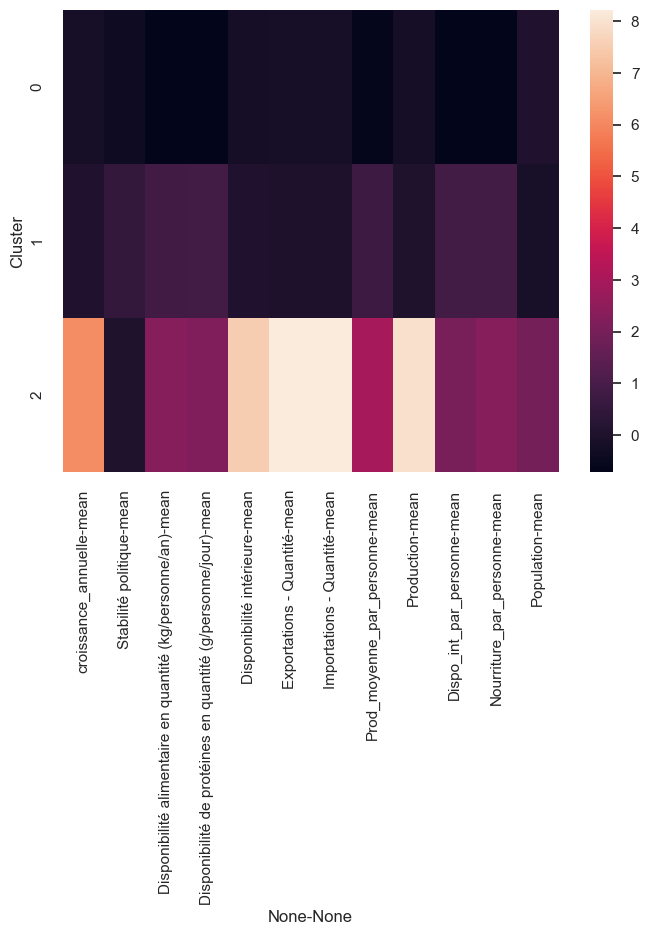

In [1471]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_kmeans_mean)
plt.show()

### Boxplot des clusters

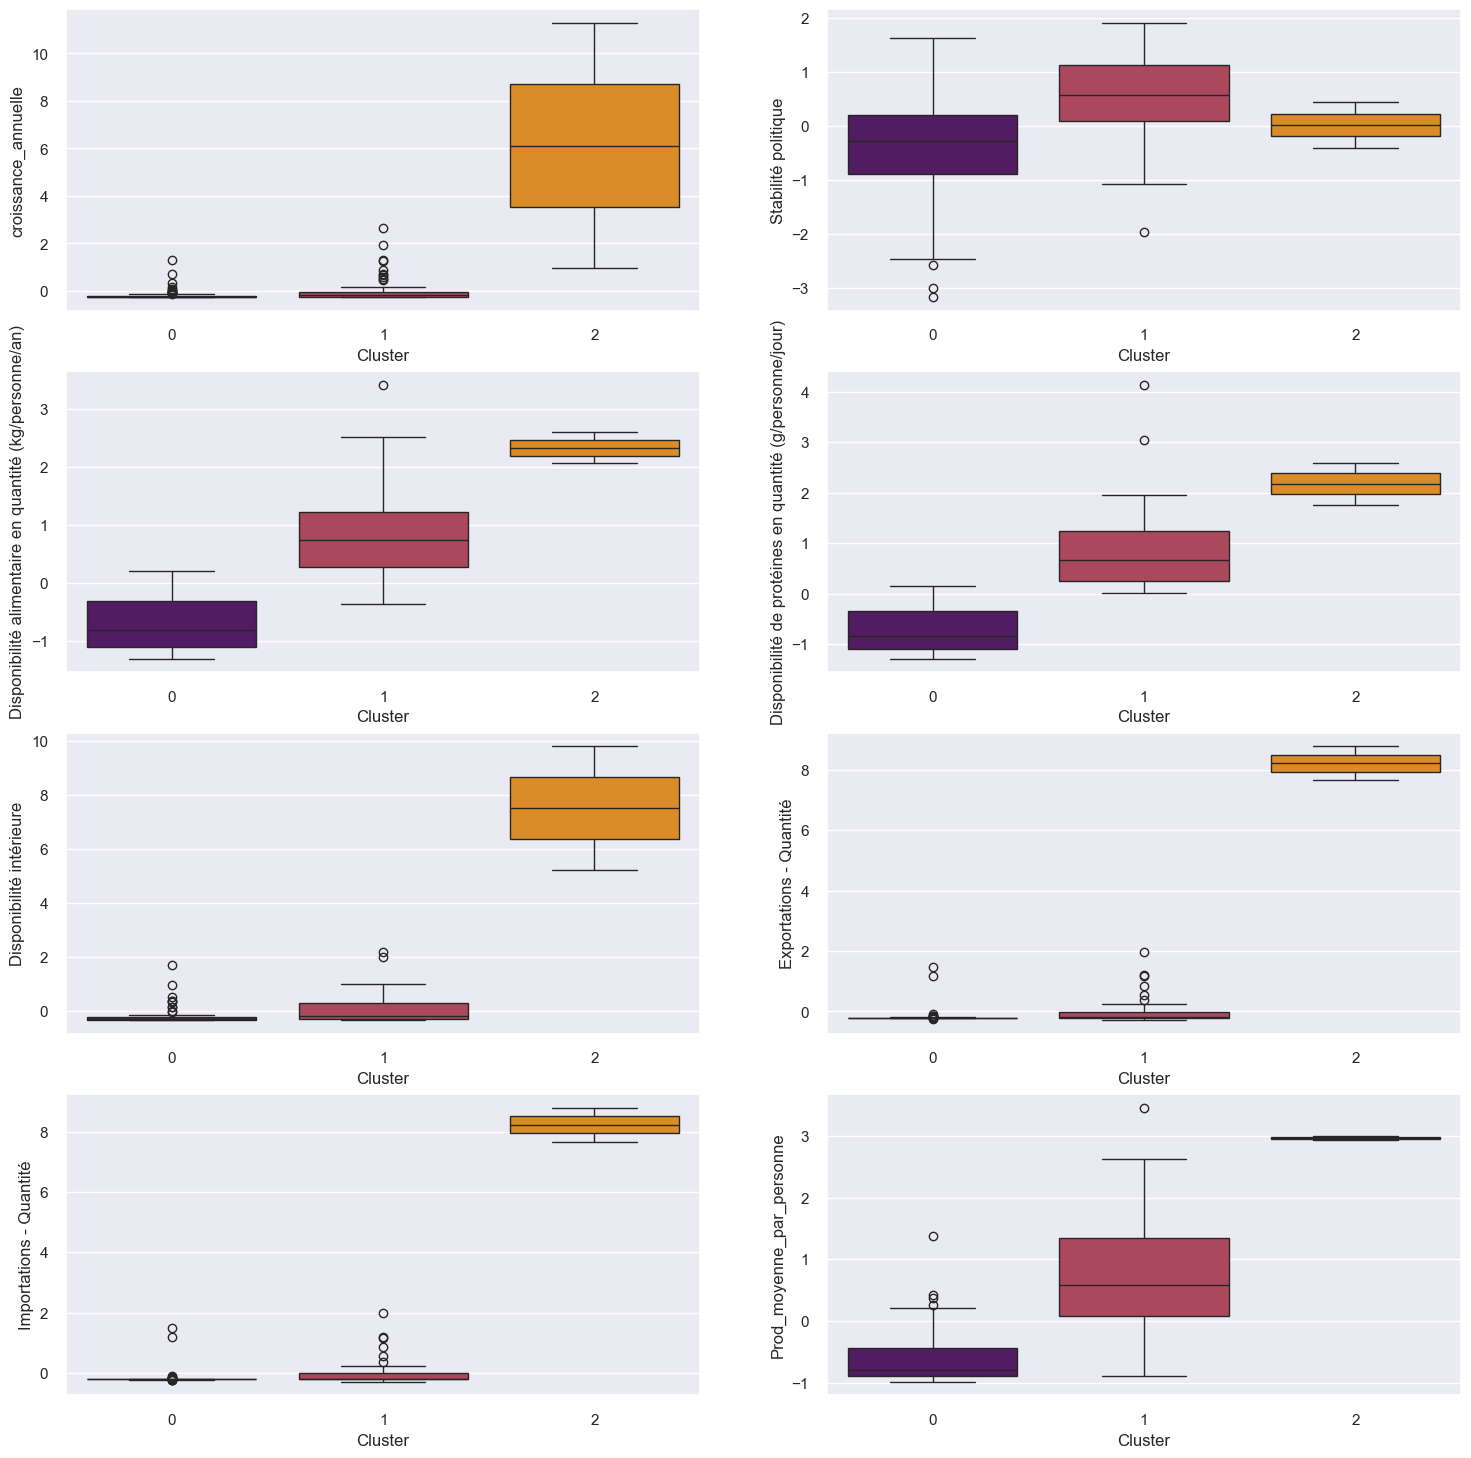

In [1473]:
fig, axes = plt.subplots(4, 2, figsize=(18,18))

for i in range(4):
    for j in range(2):
        sns.boxplot(ax=axes[i,j], 
                    data= df_kmeans, 
                    x='Cluster', 
                    y=df_kmeans.columns[0:-1][2*i+j], palette = "inferno")

plt.show()

### Radar Chart des clusters

In [1475]:
cluster_kmeans_list = []

# Création d'une boucle pour stocker les informations de chaque cluster dans un df
for i in range(3):
    cluster_df_kmeans = pd.DataFrame({
        f'Cluster {i} Col A': df_scaled_clust.columns[0:-1],
        f'Cluster {i} Col B': df_kmeans_mean.iloc[i].values
    })
    cluster_kmeans_list.append(cluster_df_kmeans)

# Concaténation des df
cluster_df_kmeans_concat = pd.concat(cluster_kmeans_list, axis=1)
    
cluster_df_kmeans_concat

Cluster 0 Col A  Cluster 0 Col B  \
0                                 croissance_annuelle            -0.17   
1                                 Stabilité politique            -0.38   
2   Disponibilité alimentaire en quantité (kg/pers...            -0.71   
3   Disponibilité de protéines en quantité (g/pers...            -0.71   
4                            Disponibilité intérieure            -0.21   
5                             Exportations - Quantité            -0.17   
6                             Importations - Quantité            -0.17   
7                           Prod_moyenne_par_personne            -0.61   
8                                          Production            -0.20   
9                              Dispo_int_par_personne            -0.71   
10                            Nourriture_par_personne            -0.71   
11                                         Population             0.05   

                                      Cluster 1 Col A  Cluster 1 Col B  \
0                                 croissance_annuelle             0.04   
1                                 Stabilité politique             0.51   
2   Disponibilité alimentaire en quantité (kg/pers...             0.86   
3   Disponibilité de protéines en quantité (g/pers...             0.87   
4                            Disponibilité intérieure             0.05   
5                             Exportations - Quantité            -0.02   
6                             Importations - Quantité            -0.02   
7                           Prod_moyenne_par_personne             0.72   
8                                          Production             0.02   
9                              Dispo_int_par_personne             0.87   
10                            Nourriture_par_personne             0.86   
11                                         Population            -0.12   

                                      Cluster 2 Col A  Cluster 2 Col B  
0                                 croissance_annuelle             6.12  
1                                 Stabilité politique             0.02  
2   Disponibilité alimentaire en quantité (kg/pers...             2.32  
3   Disponibilité de protéines en quantité (g/pers...             2.18  
4                            Disponibilité intérieure             7.50  
5                             Exportations - Quantité             8.22  
6                             Importations - Quantité             8.22  
7                           Prod_moyenne_par_personne             2.96  
8                                          Production             7.97  
9                              Dispo_int_par_personne             2.02  
10                            Nourriture_par_personne             2.33  
11                                         Population             1.96

In [1476]:
# Création d'une boucle pour générer les 8 radar charts à travers les informations récupérées dans "cluster_kmeans_list"
for i, cluster_df_kmeans in enumerate(cluster_kmeans_list):
    theta = cluster_df_kmeans[f'Cluster {i} Col A'].values
    values = cluster_df_kmeans[f'Cluster {i} Col B'].values
    fig = px.line_polar(cluster_df_kmeans, 
                        r=f'Cluster {i} Col B', 
                        theta=f'Cluster {i} Col A', 
                        line_close=True,
                        start_angle=90,
                        range_r=[-1, 5],
                        title=f'Cluster {i}')
    fig.show()

In [1477]:
fig = go.Figure()

for i, cluster_df_kmeans in enumerate(cluster_kmeans_list):
    theta = cluster_df_kmeans[f'Cluster {i} Col A'].values
    values = cluster_df_kmeans[f'Cluster {i} Col B'].values
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=theta,
        fill='toself',
        name=f'Cluster {i}'
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[-1, 5]
        )),
    showlegend=True
)

fig.show()

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Itération 3 (Analyse 9 variables originales sans les outliers)</h2>
</div>

In [1479]:
copy_df

Zone  croissance_annuelle  Stabilité politique  \
0              Afghanistan             19034.30                -2.79   
1           Afrique du Sud            380851.44                -0.28   
2                  Albanie             13019.73                 0.37   
3                  Algérie            170096.99                -0.92   
4                Allemagne           3690849.15                 0.57   
..                     ...                  ...                  ...   
194    Émirats arabes unis            390516.80                 0.60   
195               Équateur            104295.86                -0.08   
197  États-Unis d'Amérique          19612100.00                 0.26   
198               Éthiopie             76794.69                -1.68   
200           Îles Salomon              1469.79                 0.19   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                                 1.53        
1                                                35.69        
2                                                16.36        
3                                                 6.38        
4                                                19.47        
..                                                 ...        
194                                              43.47        
195                                              19.31        
197                                              55.68        
198                                               0.13        
200                                               4.45        

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                 0.54          
1                                                14.11          
2                                                 6.26          
3                                                 1.97          
4                                                 7.96          
..                                                 ...          
194                                              14.80          
195                                               6.15          
197                                              19.93          
198                                               0.04          
200                                               1.51          

     Disponibilité intérieure  Exportations - Quantité  \
0                    57000.00                 -1530.00   
1                  2118000.00                 63000.00   
2                    47000.00                     0.00   
3                   277000.00                     0.00   
4                  1739000.00                646000.00   
..                        ...                      ...   
194                 412000.00                 94000.00   
195                 341000.00                     0.00   
197               18266000.00               3692000.00   
198                  14000.00                   870.00   
200                   3000.00                     0.00   

     Importations - Quantité  Prod_moyenne_par_personne  Production  \
0                -1530000.00                       0.00    28000.00   
1                63000000.00                       0.03  1667000.00   
2                       0.00                       0.00    13000.00   
3                       0.00                       0.01   275000.00   
4               646000000.00                       0.02  1514000.00   
..                       ...                        ...         ...   
194              94000000.00                       0.01    48000.00   
195                     0.00                       0.02   340000.00   
197            3692000000.00                       0.07 21914000.00   
198                870000.00                       0.00    14000.00   
200                     0.00                       0.00        0.00   

     Dispo_int_par_personne  Nourriture_par_personne   Population  
0

In [1480]:
df.shape

(153, 12)

In [1481]:
df_new = copy_df[["Zone", "croissance_annuelle", "Stabilité politique", "Disponibilité alimentaire en quantité (kg/personne/an)", 
        "Disponibilité de protéines en quantité (g/personne/jour)", "Disponibilité intérieure", "Exportations - Quantité", 
        "Production", "Importations - Quantité", "Population"]]  

In [1482]:
df_new

Zone  croissance_annuelle  Stabilité politique  \
0              Afghanistan             19034.30                -2.79   
1           Afrique du Sud            380851.44                -0.28   
2                  Albanie             13019.73                 0.37   
3                  Algérie            170096.99                -0.92   
4                Allemagne           3690849.15                 0.57   
..                     ...                  ...                  ...   
194    Émirats arabes unis            390516.80                 0.60   
195               Équateur            104295.86                -0.08   
197  États-Unis d'Amérique          19612100.00                 0.26   
198               Éthiopie             76794.69                -1.68   
200           Îles Salomon              1469.79                 0.19   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                                 1.53        
1                                                35.69        
2                                                16.36        
3                                                 6.38        
4                                                19.47        
..                                                 ...        
194                                              43.47        
195                                              19.31        
197                                              55.68        
198                                               0.13        
200                                               4.45        

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                 0.54          
1                                                14.11          
2                                                 6.26          
3                                                 1.97          
4                                                 7.96          
..                                                 ...          
194                                              14.80          
195                                               6.15          
197                                              19.93          
198                                               0.04          
200                                               1.51          

     Disponibilité intérieure  Exportations - Quantité  Production  \
0                    57000.00                 -1530.00    28000.00   
1                  2118000.00                 63000.00  1667000.00   
2                    47000.00                     0.00    13000.00   
3                   277000.00                     0.00   275000.00   
4                  1739000.00                646000.00  1514000.00   
..                        ...                      ...         ...   
194                 412000.00                 94000.00    48000.00   
195                 341000.00                     0.00   340000.00   
197               18266000.00               3692000.00 21914000.00   
198                  14000.00                   870.00    14000.00   
200                   3000.00                     0.00        0.00   

     Importations - Quantité   Population  
0                -1530000.00  36296000.00  
1                63000000.00  57009000.00  
2                       0.00   2884000.00  
3                       0.00  41389000.00  
4               646000000.00  82658000.00  
..                       ...          ...  
194              94000000.00   9487000.00  
195                     0.00  16785000.00  
197            3692000000.00 325084000.00  
198                870000.00 106399000.00  
200                     0.00    636000.00  

[153 rows x 10 columns]

In [1483]:
# On enleve les outliers du df final

df_new.drop(copy_df[(copy_df["Zone"] == "États-Unis d'Amérique")].index, inplace=True)
df_new.drop(copy_df[(copy_df["Zone"] == "Inde")].index, inplace=True)
df_new.drop(copy_df[(copy_df["Zone"] == "Brésil")].index, inplace=True)

In [1484]:
df_new.shape

(150, 10)

In [1485]:
# Utiliser la colonne Zone comme index désormais

df_new.set_index('Zone', inplace=True)
df_new.head()

croissance_annuelle  Stabilité politique  \
Zone                                                       
Afghanistan                19034.30                -2.79   
Afrique du Sud            380851.44                -0.28   
Albanie                    13019.73                 0.37   
Algérie                   170096.99                -0.92   
Allemagne                3690849.15                 0.57   

                Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                     
Afghanistan                                                  1.53        
Afrique du Sud                                              35.69        
Albanie                                                     16.36        
Algérie                                                      6.38        
Allemagne                                                   19.47        

                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                       
Afghanistan                                                  0.54          
Afrique du Sud                                              14.11          
Albanie                                                      6.26          
Algérie                                                      1.97          
Allemagne                                                    7.96          

                Disponibilité intérieure  Exportations - Quantité  Production  \
Zone                                                                            
Afghanistan                     57000.00                 -1530.00    28000.00   
Afrique du Sud                2118000.00                 63000.00  1667000.00   
Albanie                         47000.00                     0.00    13000.00   
Algérie                        277000.00                     0.00   275000.00   
Allemagne                     1739000.00                646000.00  1514000.00   

                Importations - Quantité  Population  
Zone                                                 
Afghanistan                 -1530000.00 36296000.00  
Afrique du Sud              63000000.00 57009000.00  
Albanie                            0.00  2884000.00  
Algérie                            0.00 41389000.00  
Allemagne                  646000000.00 82658000.00

In [1486]:
x_new = df_new
names = df_new.index
features = df_new.columns

### Scaling (Standardisation)

In [1488]:
# Une méthode statistique permettant de placer toutes les variables d'un ensemble de données sur la même échelle

scaler = StandardScaler()

x_scale = scaler.fit_transform(x_new)

### Les composantes

In [1490]:
# On va d'abord voir combien de variances les 6 variables détiennent 

pca = PCA(n_components = 9)

Prin_Components = pca.fit_transform(x_scale)

In [1491]:
pca.explained_variance_ratio_

array([4.20840005e-01, 2.56777945e-01, 1.64231923e-01, 8.47536567e-02,
       3.70922374e-02, 3.22648909e-02, 2.31643476e-03, 1.72290636e-03,
       8.23500934e-33])

### Screeplot

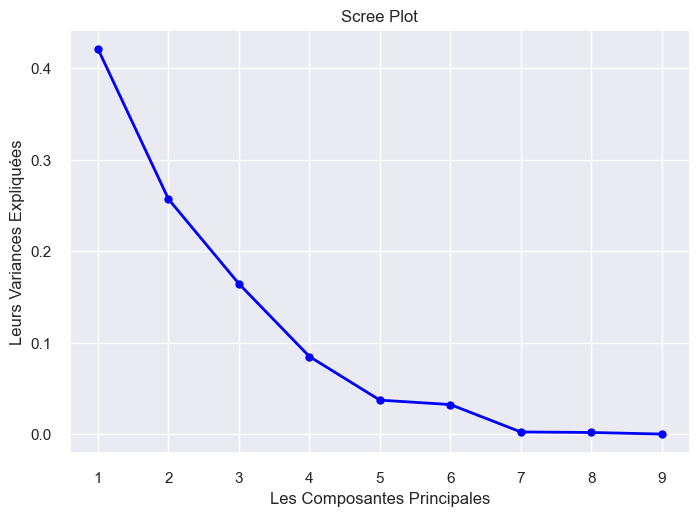

In [1493]:
# On va plotter un scree plot vour visualiser combien chaque composante détient en variance

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Les Composantes Principales')
plt.ylabel('Leurs Variances Expliquées')
plt.show()

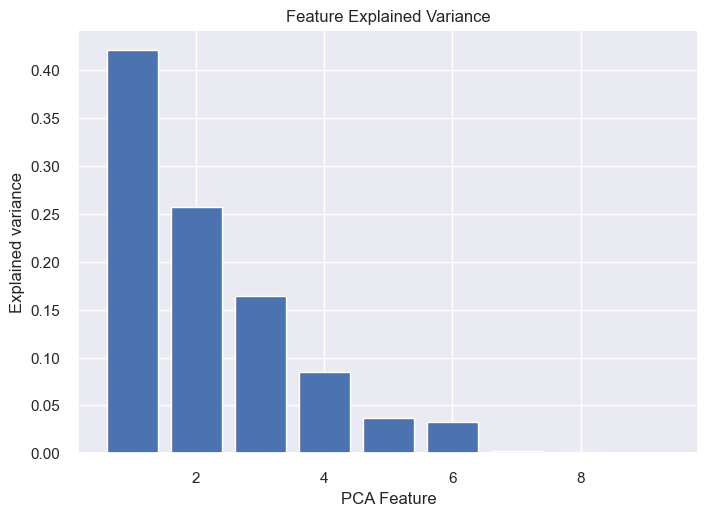

In [1494]:
sns.set()
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

La 1ère composante principale détient 42,08% de la variance totale.

La 2ème composante principale détient 25,67% de la variance totale.

La 3ème composante principale détient 16,42% de la variance totale.

In [1496]:
# Ces trois composantes expliquent presque 84% de la variance totale

In [1497]:
pca_3c = PCA(n_components= 3)

# Fit et transformer la data
Pri_Components = pca_3c.fit_transform(x_scaled)

df_principal = pd.DataFrame(data = Pri_Components, columns = ['PC1', 'PC2', 'PC3'])

In [1498]:
df_principal

PC1   PC2   PC3
0   -1.10  1.34 -0.38
1    1.24 -1.41  0.76
2   -0.59 -0.12 -0.19
3   -0.82  1.01 -0.21
4    1.67  0.40 -0.27
..    ...   ...   ...
148  0.63 -2.23  0.47
149 -0.38 -0.14 -0.04
150 17.72  2.73 -0.98
151 -1.06  1.68  0.10
152 -1.06  0.97 -0.56

[153 rows x 3 columns]

In [1499]:
# Traçage du 3D avec plotly

import plotly.express as px

fig = px.scatter_3d(df_principal, x= "PC1", y="PC2", z="PC3",color=df_principal['PC3'])
fig.show()

### Cercle des corrélations

### PC1 & PC2

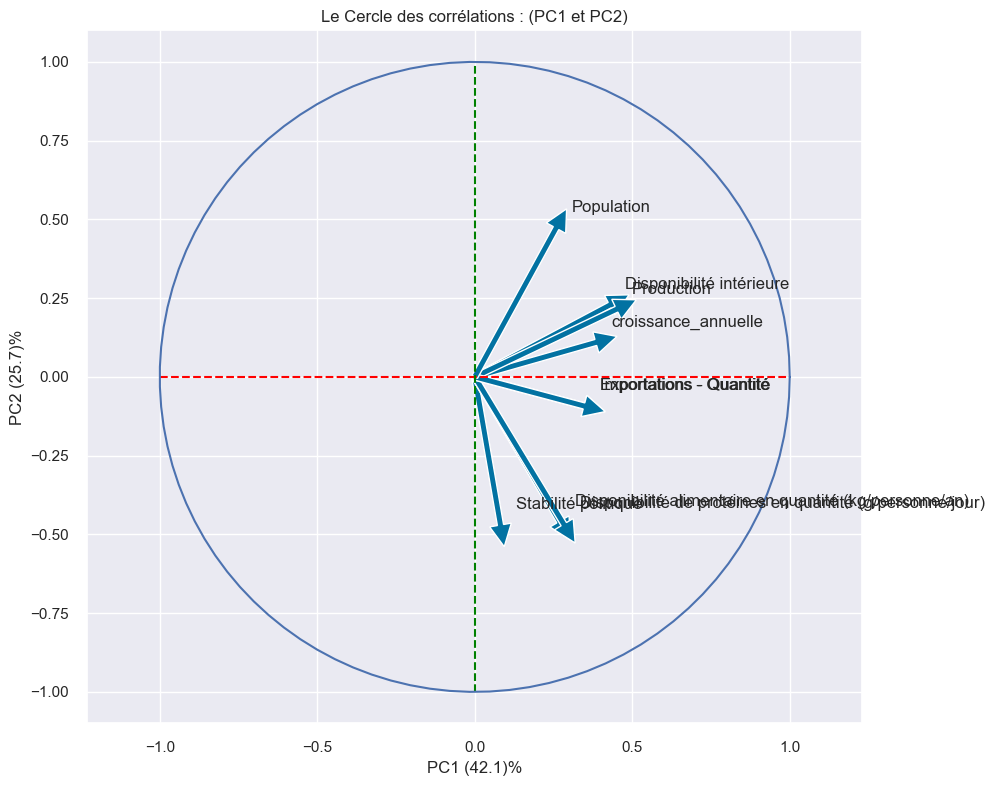

In [1502]:
correlation_circle(pca, (0,1), features)

### PC1 & PC3

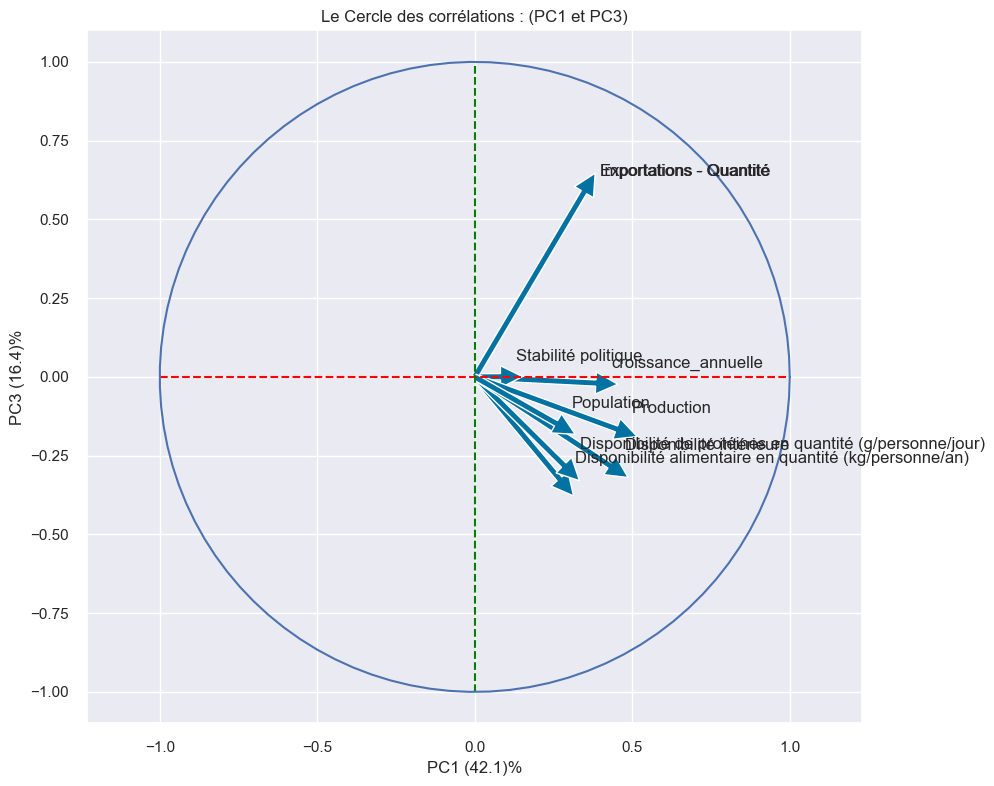

In [1504]:
correlation_circle(pca, (0,2), features)

### PC2 & PC3

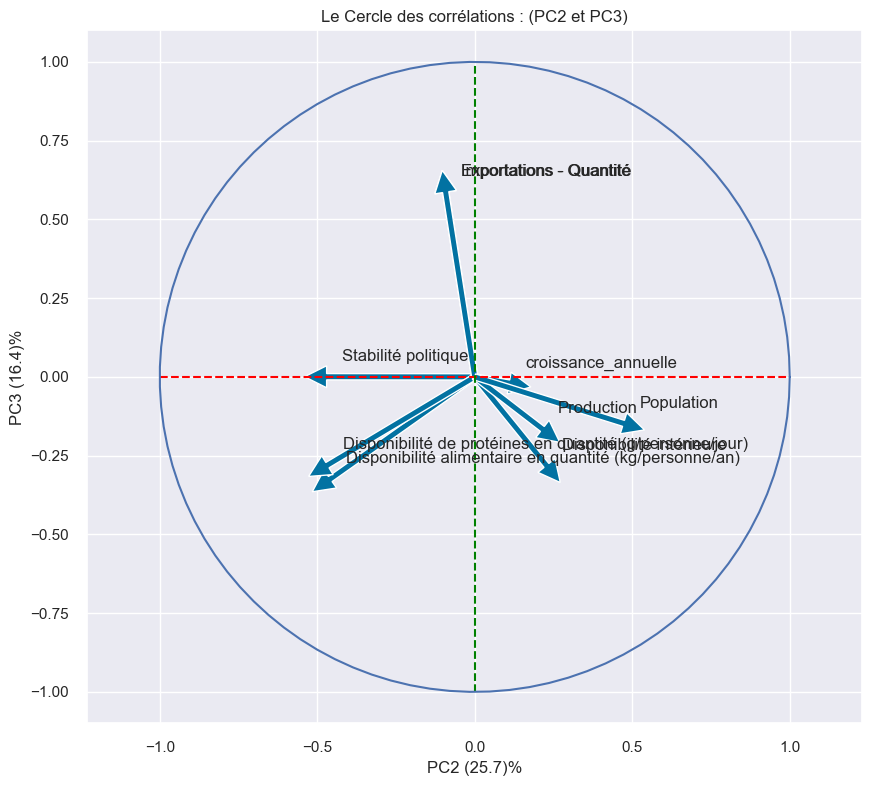

In [1506]:
correlation_circle(pca, (1,2), features)

### Projection des individus

In [1508]:
x_pro = pca.transform(x_scale)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


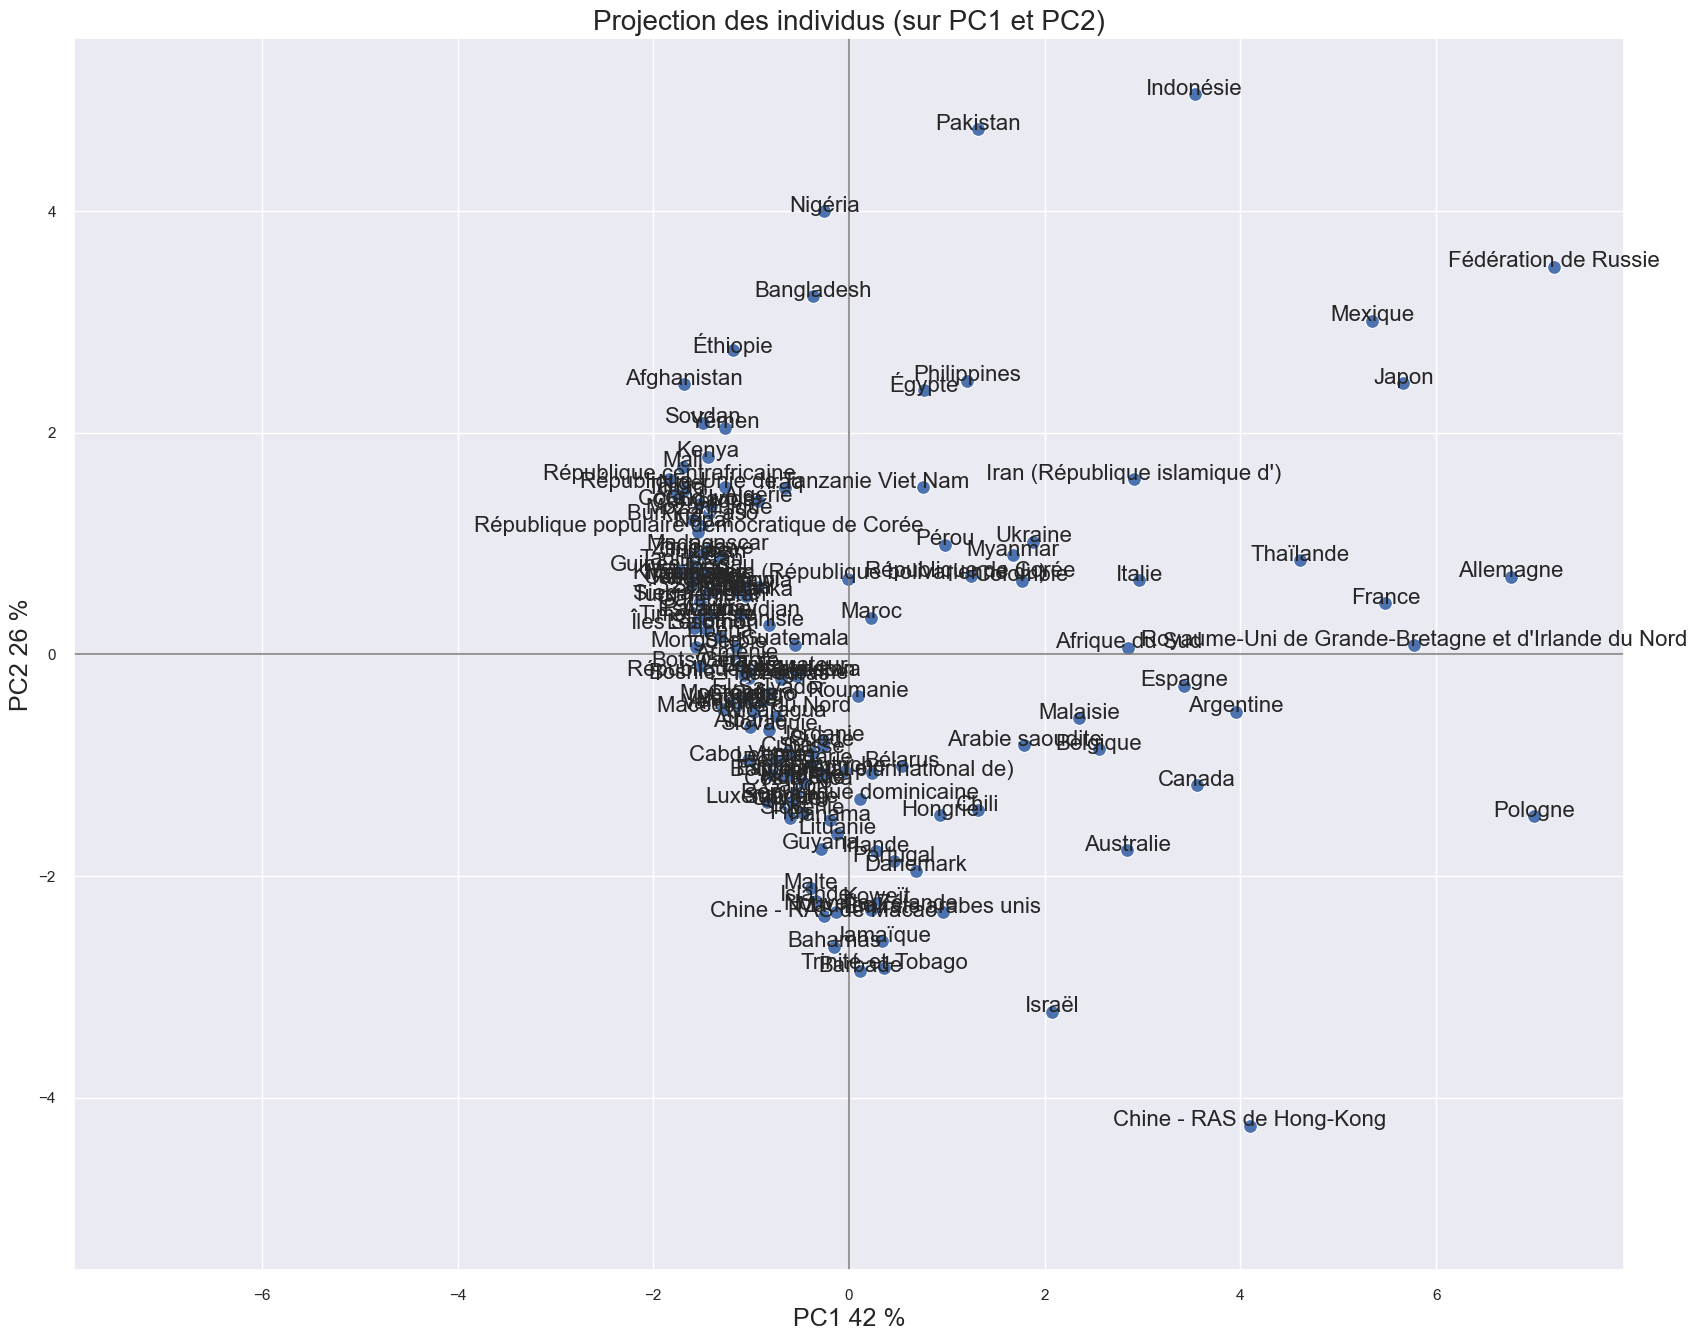

In [1509]:
show_projections(x_pro, (0,1), pca, labels=names, figsize=(20,16), marker="o")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


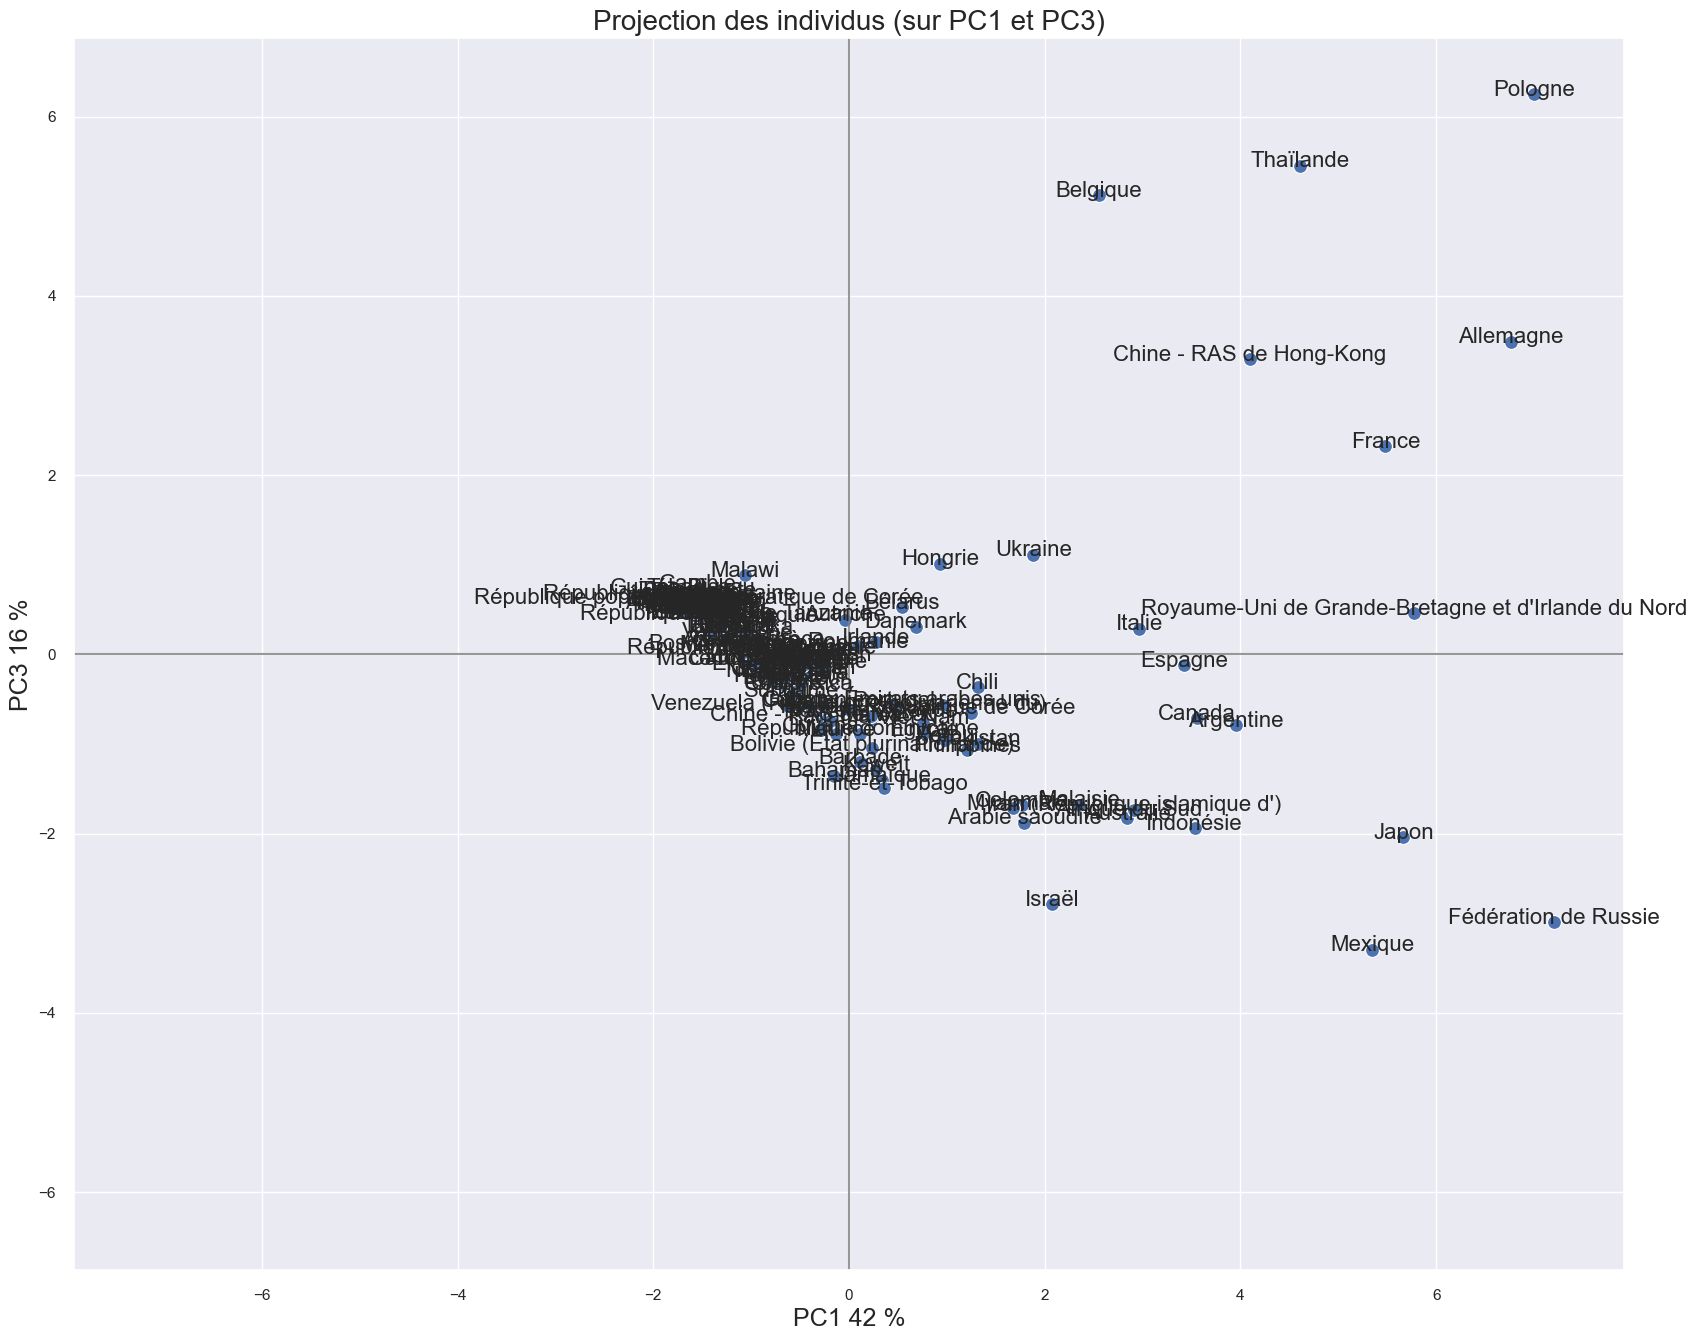

In [1510]:
show_projections(x_pro, (0,2), pca, labels=names, figsize=(20,16), marker="o")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


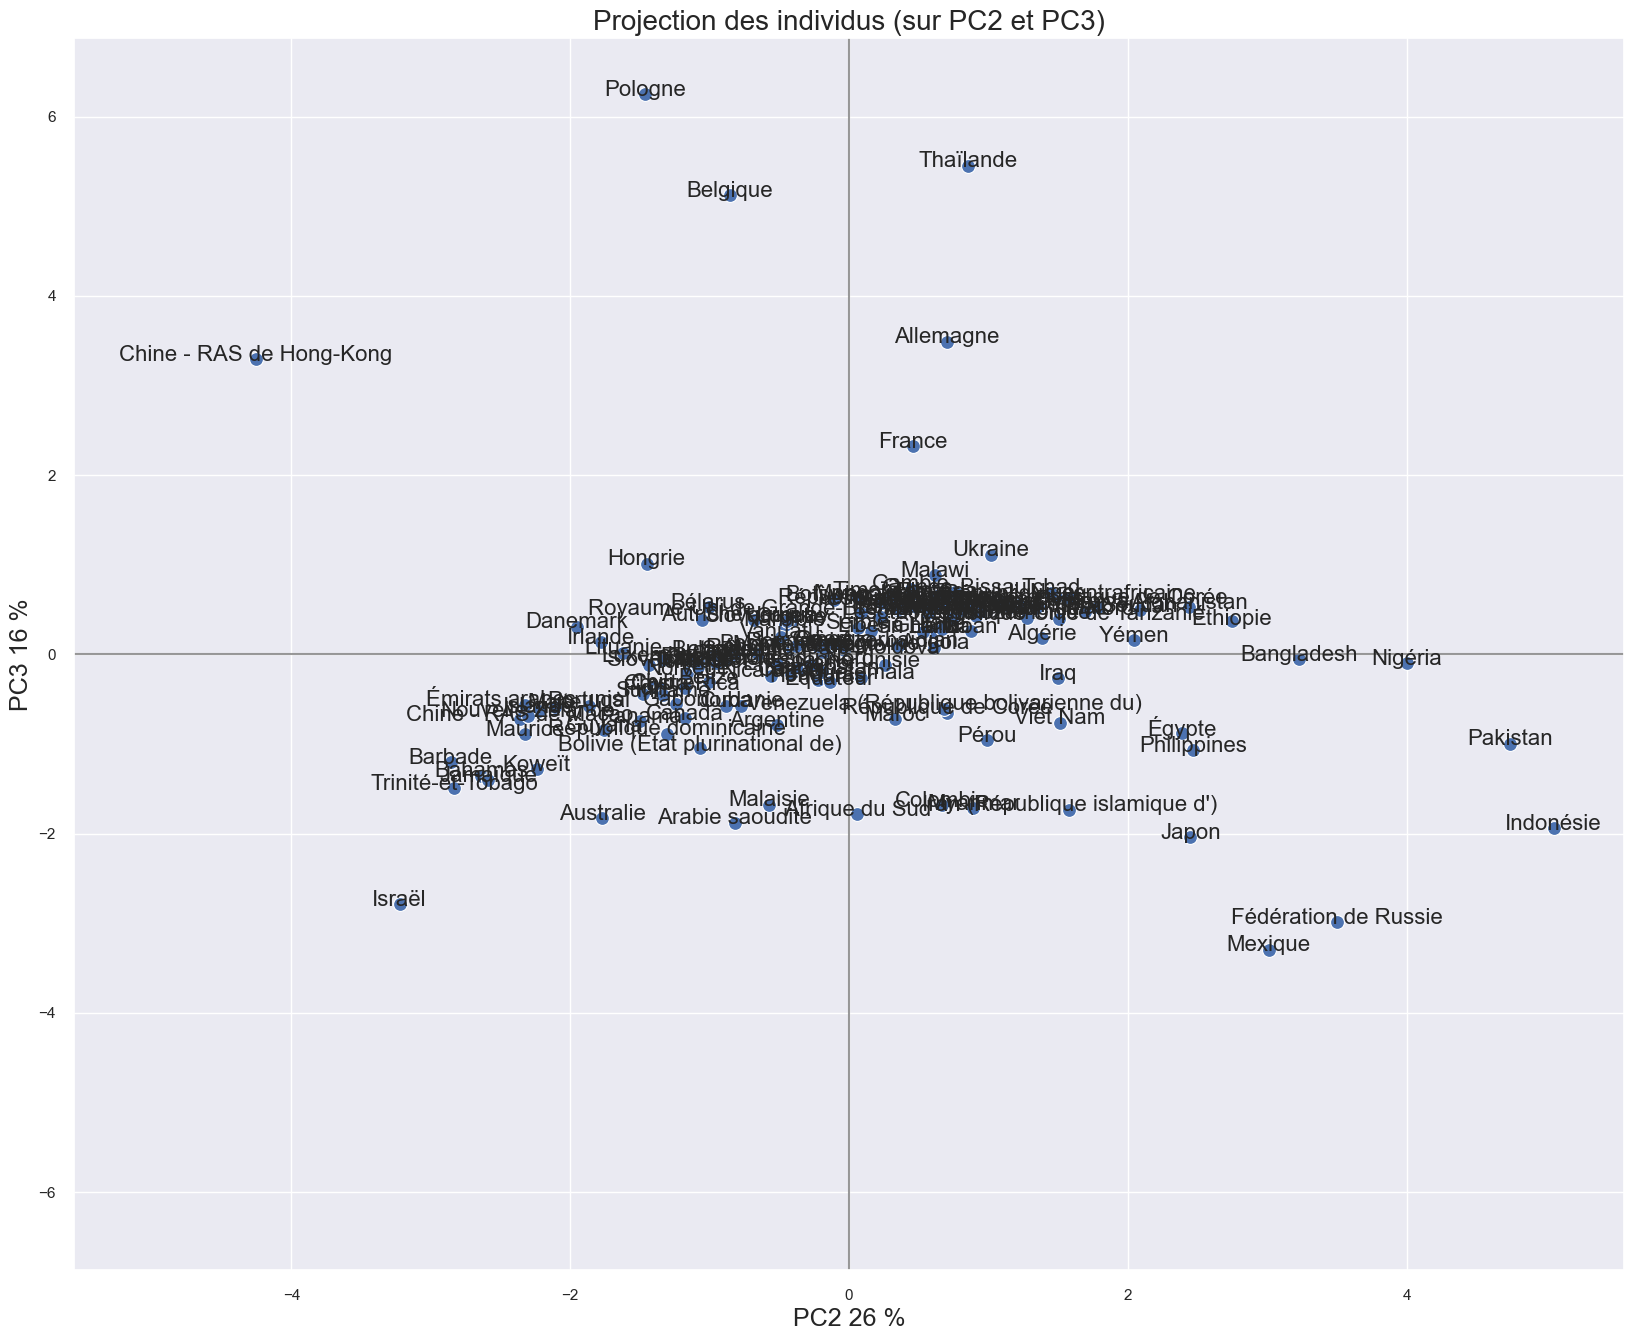

In [1511]:
show_projections(x_pro, (1,2), pca, labels=names, figsize=(20,16), marker="o")

### Classification ascendante hiérarchique (CAH)

In [1513]:
Z = linkage(x_scale, "ward")

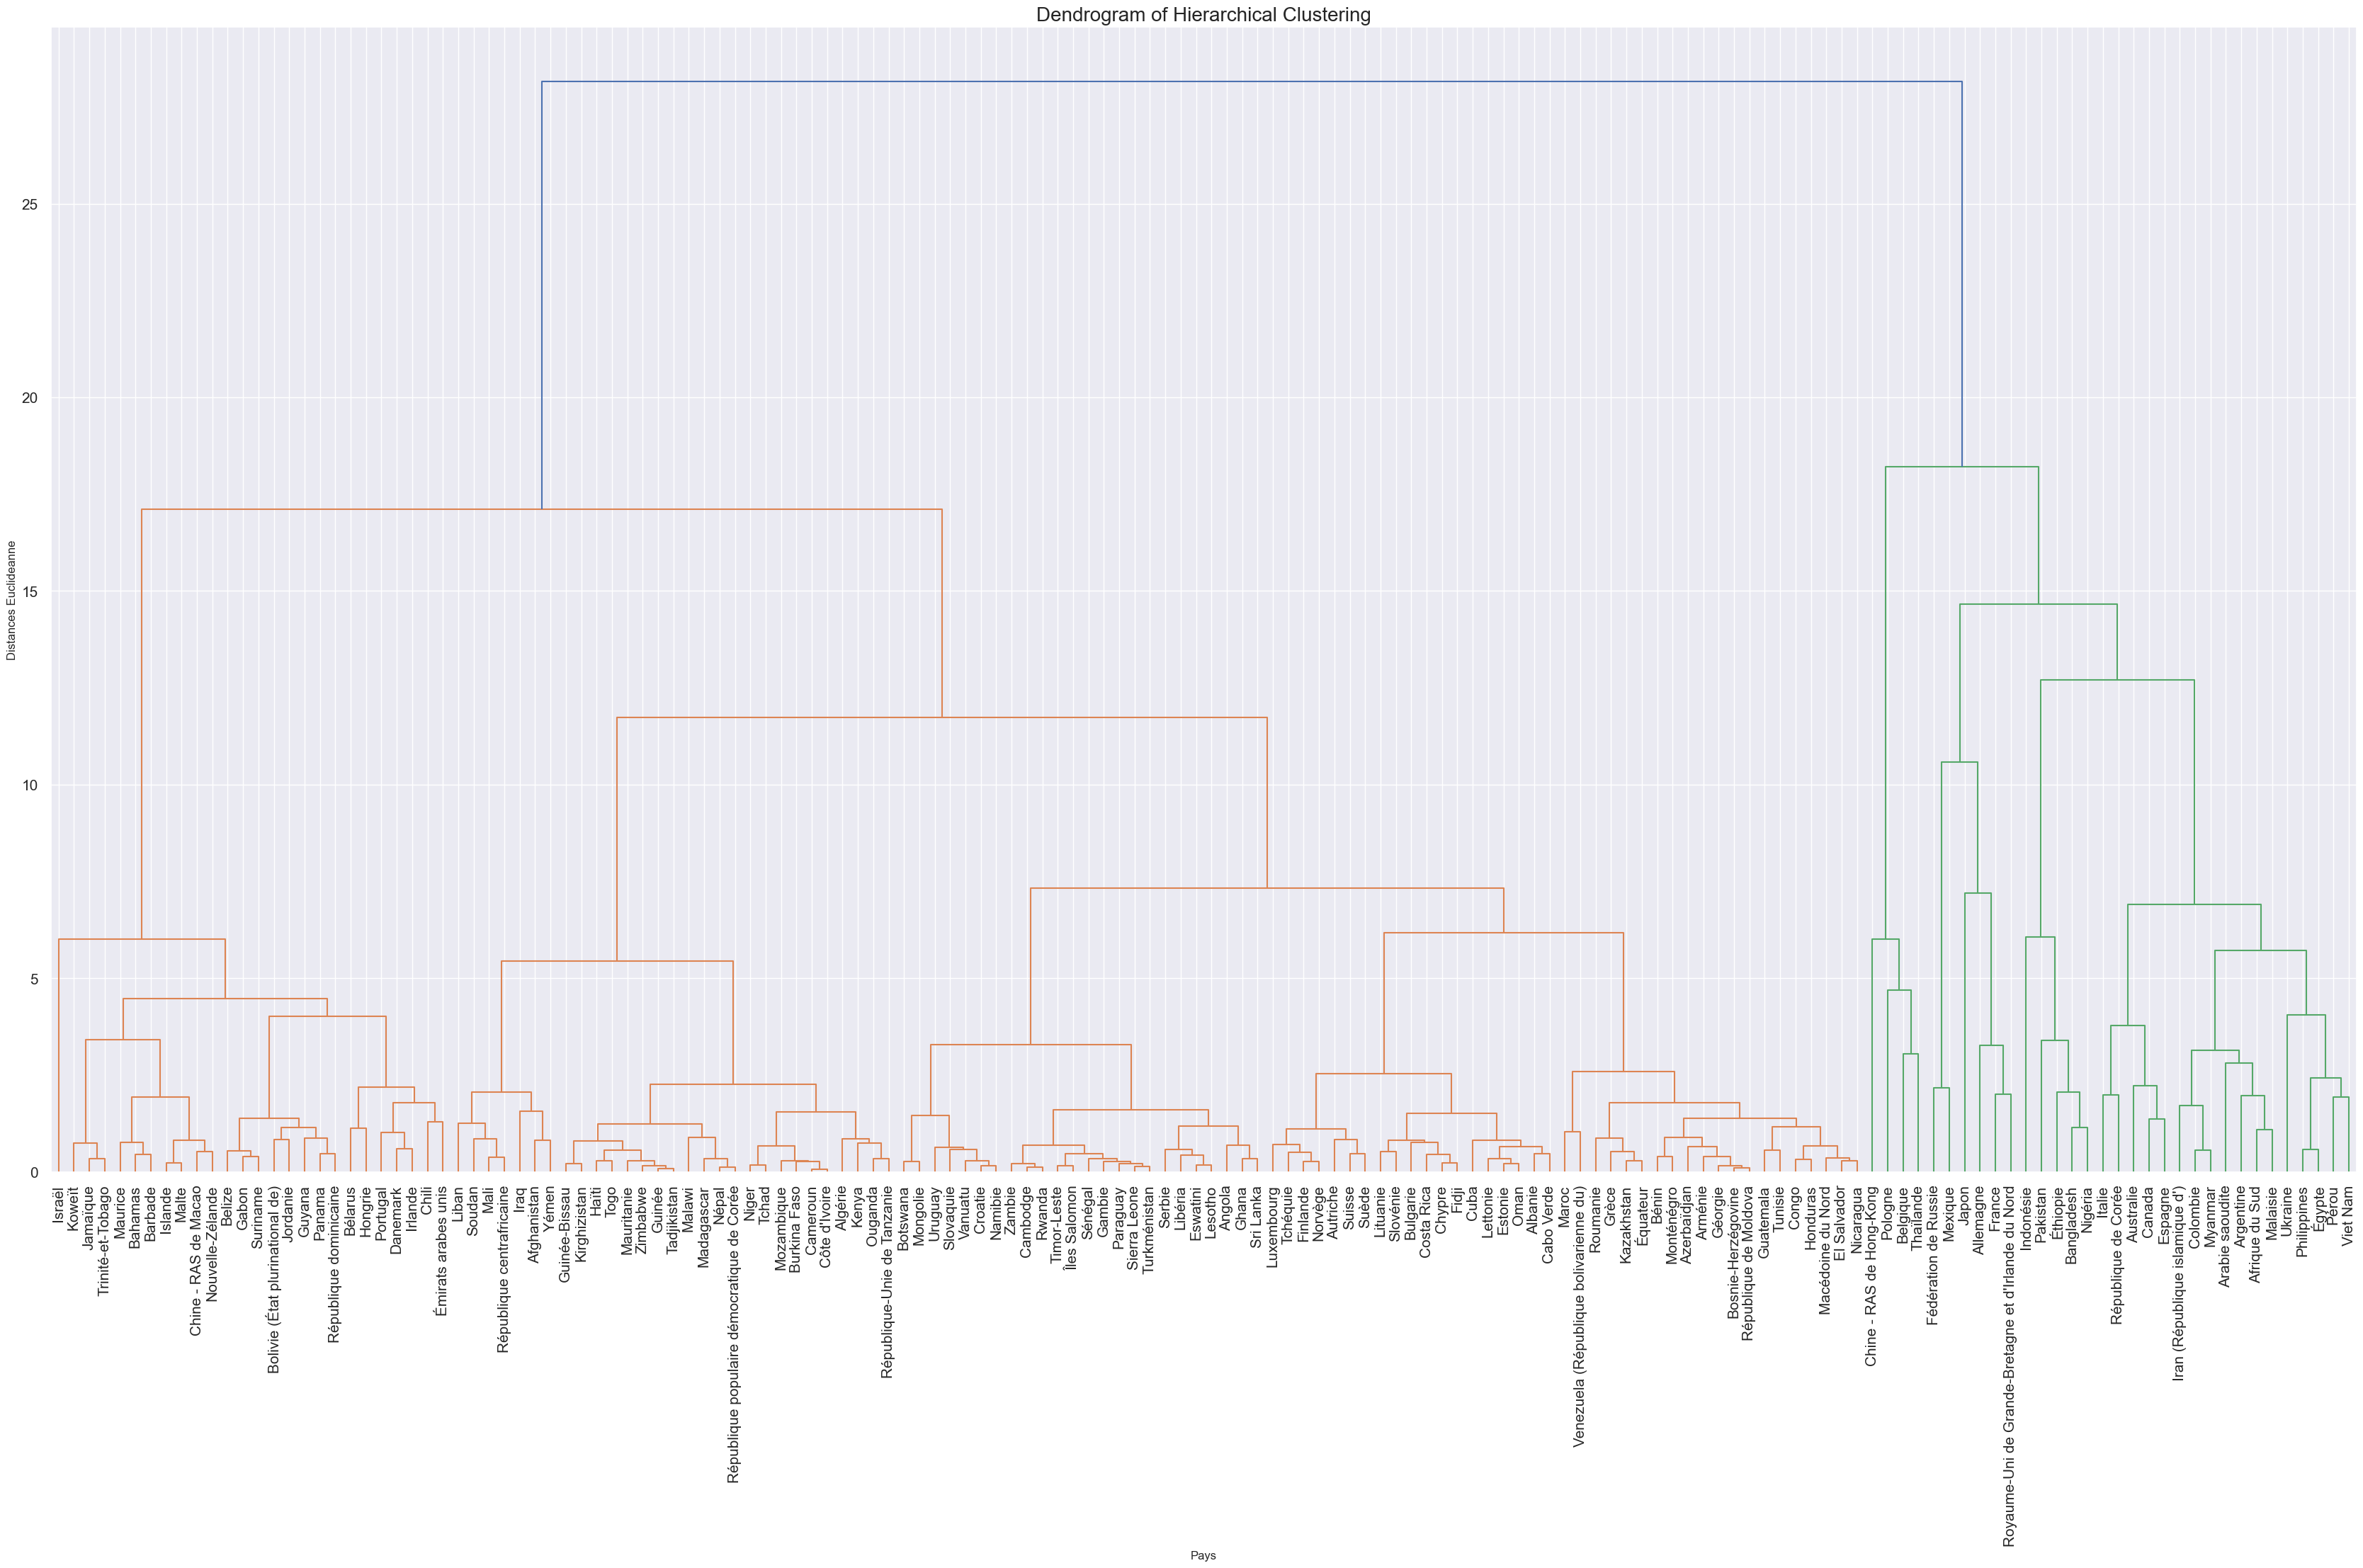

In [1514]:
def my_dendrogram(Z, names):
    fig, ax = plt.subplots(1, 1, figsize=(42, 21))

    _ = dendrogram(Z, ax=ax, labels=names, orientation = "top")

    plt.title("Dendrogram of Hierarchical Clustering", fontsize=20)
    ax.tick_params(axis='x', which='major', labelsize=15)
    ax.tick_params(axis='y', which='major', labelsize=15)
    plt.xlabel('Pays')
    plt.ylabel('Distances Euclideanne')
    plt.show()
    
my_dendrogram(Z, names)

In [1515]:
# Visualiser les 4 clusters 

clusters = fcluster(Z, 4, criterion="maxclust")
clusters

array([2, 4, 2, 2, 4, 2, 4, 4, 2, 4, 2, 2, 1, 4, 1, 3, 1, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 4, 1, 3, 1, 2, 4, 2, 2, 2, 2, 2, 1, 2, 4, 2, 2, 2,
       2, 4, 4, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 4, 4, 2, 1, 1, 1, 4,
       1, 4, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 1, 2, 1, 2,
       4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 1, 2, 2, 2, 4, 1, 2, 4, 3, 1, 4, 2,
       4, 2, 2, 4, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3,
       2, 2, 1, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 1, 2, 4, 2], dtype=int32)

In [1516]:
# Création d'un autre DF pour stocker les clusters avec le pays

df_clusters = pd.DataFrame({"cluster" : clusters, "Zone" : names})

display(df_clusters.head())
df_clusters.shape

cluster            Zone
0        2     Afghanistan
1        4  Afrique du Sud
2        2         Albanie
3        2         Algérie
4        4       Allemagne

(150, 2)

### Visualisation avec clusters

In [1518]:
x_pro = pca.transform(x_scale)

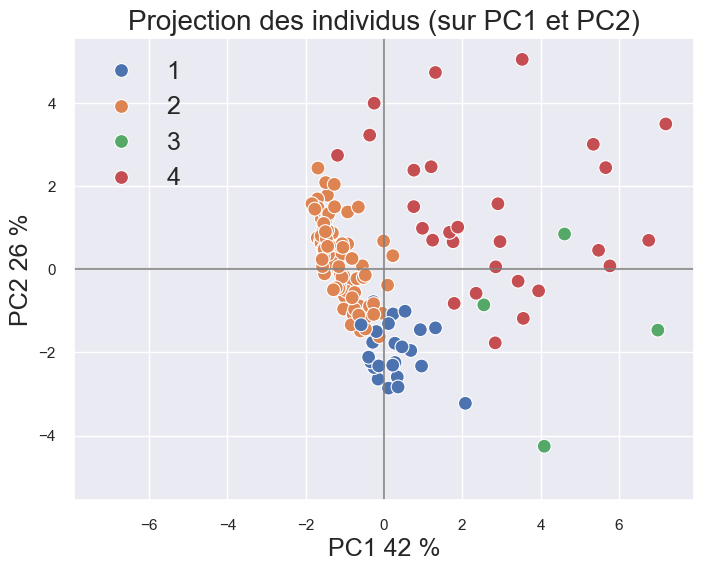

In [1519]:
show_projections(x_pro, (0,1), pca, figsize=(8,6), clusters=clusters)

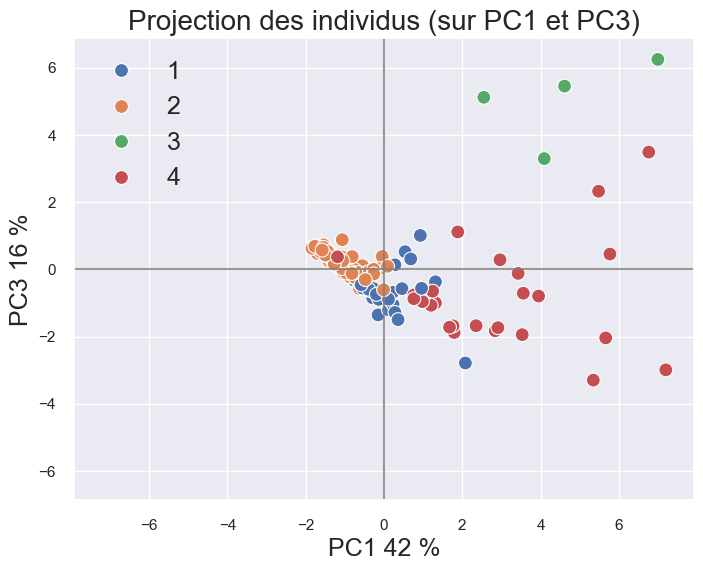

In [1520]:
show_projections(x_pro, (0,2), pca, figsize=(8,6), clusters=clusters)

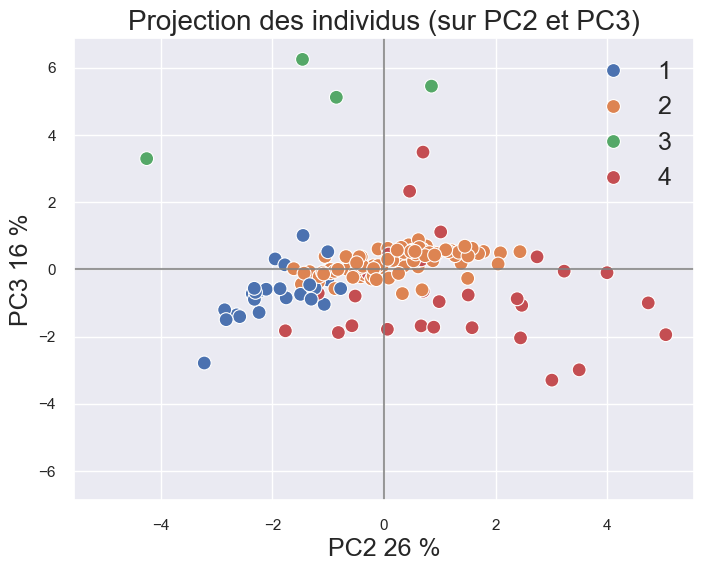

In [1521]:
show_projections(x_pro, (1,2), pca, figsize=(8,6), clusters=clusters)

### Analyse des clusters

In [1523]:
# Créér un nouveau DF avec les données du X_scaled

df_scale = pd.DataFrame(x_scale, columns= df_new.columns, index=df_new.index)

display(df_scale.head())

croissance_annuelle  Stabilité politique  \
Zone                                                       
Afghanistan                   -0.40                -2.99   
Afrique du Sud                 0.16                -0.18   
Albanie                       -0.41                 0.55   
Algérie                       -0.17                -0.90   
Allemagne                      5.25                 0.77   

                Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                     
Afghanistan                                                 -1.22        
Afrique du Sud                                               1.25        
Albanie                                                     -0.15        
Algérie                                                     -0.87        
Allemagne                                                    0.08        

                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                       
Afghanistan                                                 -1.20          
Afrique du Sud                                               1.52          
Albanie                                                     -0.05          
Algérie                                                     -0.91          
Allemagne                                                    0.29          

                Disponibilité intérieure  Exportations - Quantité  Production  \
Zone                                                                            
Afghanistan                        -0.50                    -0.34       -0.52   
Afrique du Sud                      2.29                     0.09        1.78   
Albanie                            -0.51                    -0.33       -0.54   
Algérie                            -0.20                    -0.33       -0.18   
Allemagne                           1.78                     3.97        1.57   

                Importations - Quantité  Population  
Zone                                                 
Afghanistan                       -0.34        0.25  
Afrique du Sud                     0.09        0.76  
Albanie                           -0.33       -0.57  
Algérie                           -0.33        0.37  
Allemagne                          3.97        1.38

In [1524]:
# Merger les données standardisées avec la colonne "cluster" et mettre dans un nouveau DF

dfnew_scaled_clust = pd.merge(df_scale, df_clusters, on='Zone')
display(dfnew_scaled_clust.head())

Zone  croissance_annuelle  Stabilité politique  \
0     Afghanistan                -0.40                -2.99   
1  Afrique du Sud                 0.16                -0.18   
2         Albanie                -0.41                 0.55   
3         Algérie                -0.17                -0.90   
4       Allemagne                 5.25                 0.77   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                              -1.22        
1                                               1.25        
2                                              -0.15        
3                                              -0.87        
4                                               0.08        

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              -1.20          
1                                               1.52          
2                                              -0.05          
3                                              -0.91          
4                                               0.29          

   Disponibilité intérieure  Exportations - Quantité  Production  \
0                     -0.50                    -0.34       -0.52   
1                      2.29                     0.09        1.78   
2                     -0.51                    -0.33       -0.54   
3                     -0.20                    -0.33       -0.18   
4                      1.78                     3.97        1.57   

   Importations - Quantité  Population  cluster  
0                    -0.34        0.25        2  
1                     0.09        0.76        4  
2                    -0.33       -0.57        2  
3                    -0.33        0.37        2  
4                     3.97        1.38        4

In [1525]:
# Utiliser la colonne Zone comme index

dfnew_scaled_clust.set_index('Zone', inplace=True)

In [1526]:
# Calculer la moyenne de chaque cluster par variable

df_scale_mean = dfnew_scaled_clust.groupby('cluster').mean()

df_scale_mean

croissance_annuelle  Stabilité politique  \
cluster                                             
1                      -0.26                 0.68   
2                      -0.32                -0.10   
3                       0.27                 0.42   
4                       1.26                -0.35   

         Disponibilité alimentaire en quantité (kg/personne/an)  \
cluster                                                           
1                                                     1.31        
2                                                    -0.51        
3                                                     0.65        
4                                                     0.35        

         Disponibilité de protéines en quantité (g/personne/jour)  \
cluster                                                             
1                                                     1.27          
2                                                    -0.51          
3                                                     0.86          
4                                                     0.36          

         Disponibilité intérieure  Exportations - Quantité  Production  \
cluster                                                                  
1                           -0.32                    -0.11       -0.30   
2                           -0.43                    -0.29       -0.45   
3                            0.26                     4.90        1.02   
4                            1.66                     0.36        1.59   

         Importations - Quantité  Population  
cluster                                       
1                          -0.11       -0.51  
2                          -0.29       -0.33  
3                           4.90        0.13  
4                           0.36        1.53

### Interprétation des clusters

Cluster 1 : :  index population assez bas, index importation volailles négatif, index stabilité politique négatif, index croissance annuelle négatif

Cluster 2 : :  index population assez bas, index importation volailles négatif, index stabilité politique négatif, index croissance annuelle négatif

Cluster 3 : index population positif, index importation volailles max, index stabilité politique fort, index croissance annuelle positif

Cluster 4 : index population maximum, index importation volailles positif, index stabilité politique négatif, index croissance annuelle positif

In [1532]:
# Cluster 3 semble le plus pertinent !

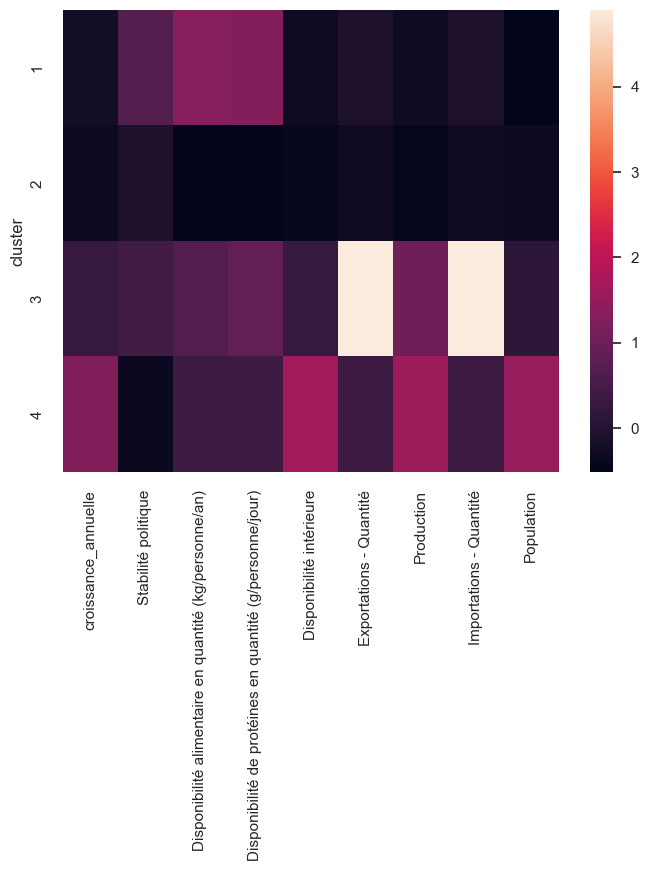

In [1533]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_scale_mean)
plt.show()

### Boxplot des clusters

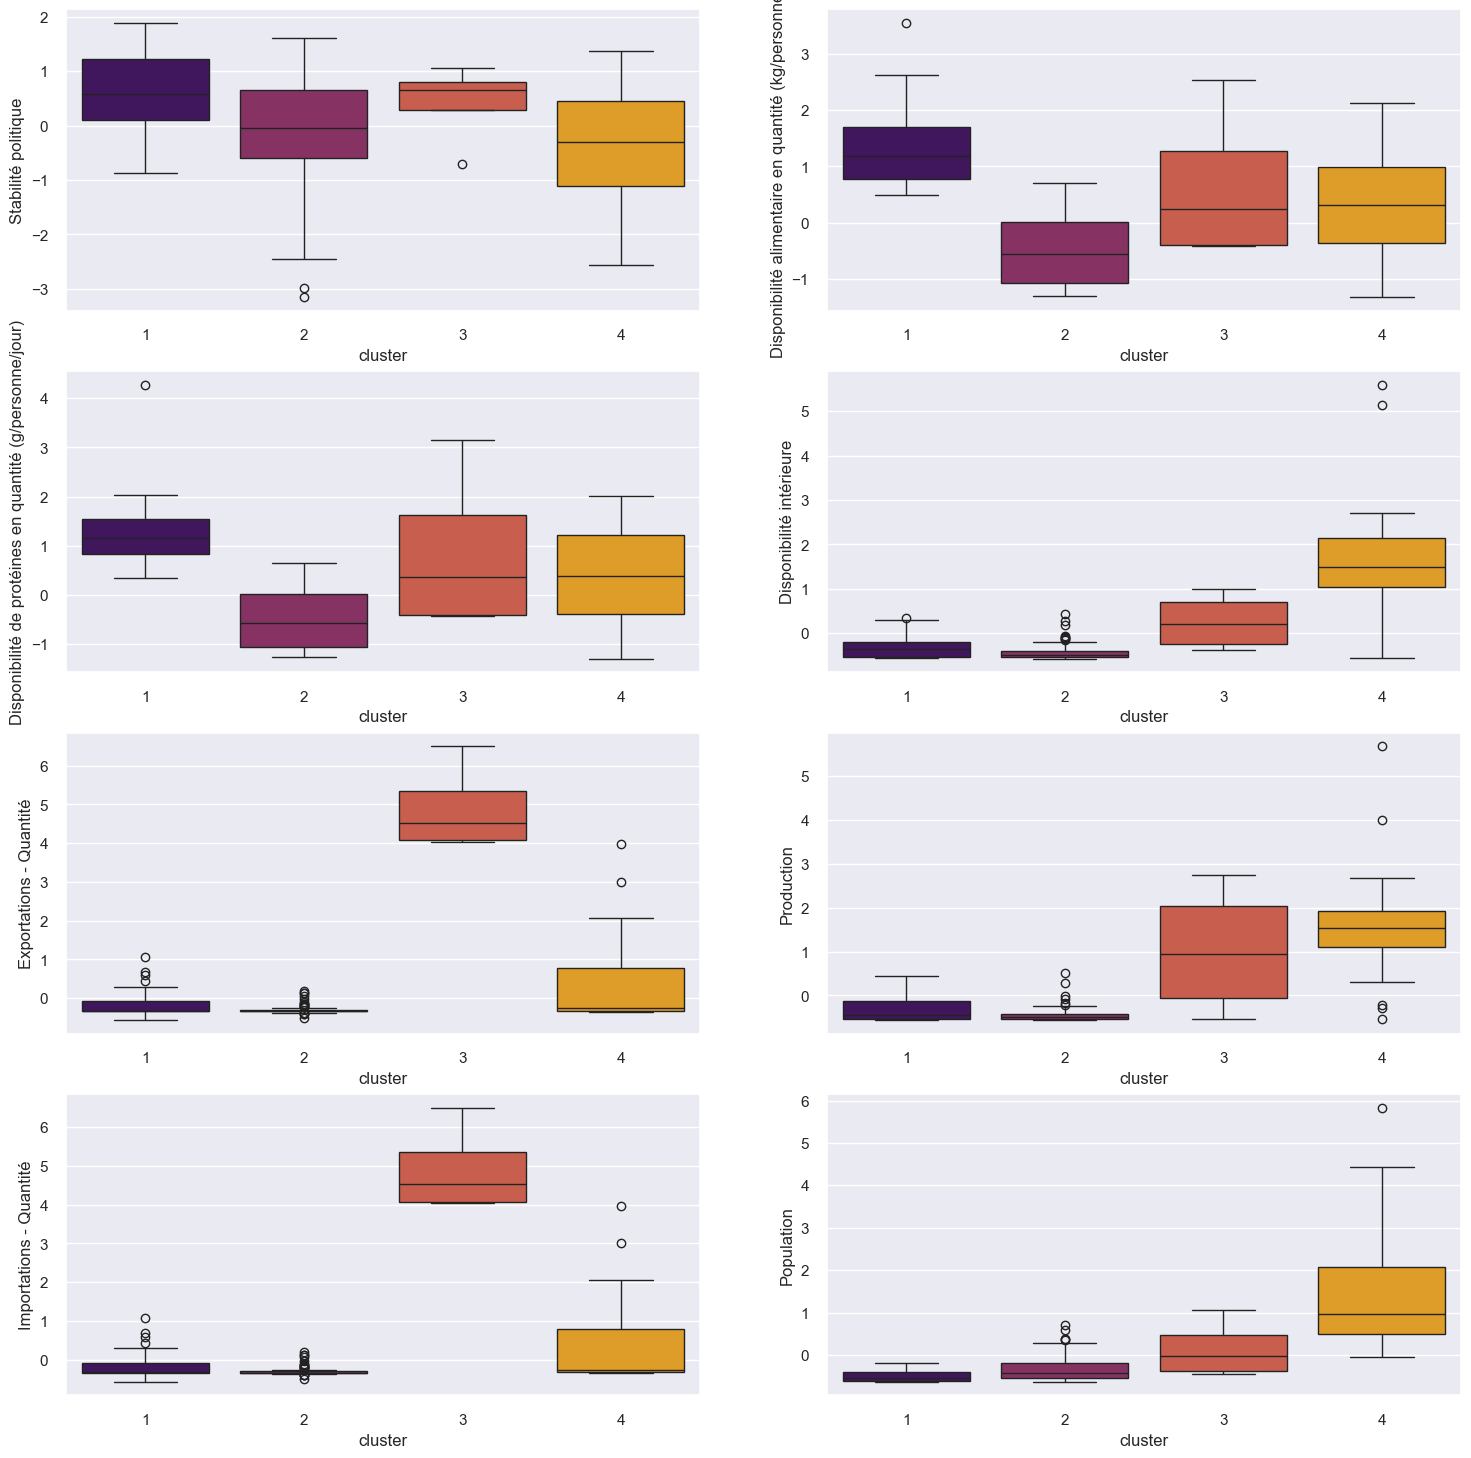

In [1535]:
fig, axes = plt.subplots(4, 2, figsize=(18,18))

for i in range(4):
    for j in range(2):
        sns.boxplot(ax=axes[i,j], 
                    data=dfnew_scaled_clust, 
                    x='cluster', 
                    y=dfnew_scaled_clust.columns[1:-1][2*i+j], palette = "inferno")

plt.show()

### RadarChart des clusters

In [1537]:
cluster_list = []

# Création d'une boucle pour stocker les informations de chaque cluster dans un df
for i in range(4):
    cluster_df = pd.DataFrame({
        f'Cluster {i} Col A': dfnew_scaled_clust.columns[0:-1],
        f'Cluster {i} Col B': df_scale_mean.iloc[i].values
    })
    cluster_list.append(cluster_df)

# Concaténation des df
cluster_df_concat = pd.concat(cluster_list, axis=1)
    
cluster_df_concat

Cluster 0 Col A  Cluster 0 Col B  \
0                                croissance_annuelle            -0.26   
1                                Stabilité politique             0.68   
2  Disponibilité alimentaire en quantité (kg/pers...             1.31   
3  Disponibilité de protéines en quantité (g/pers...             1.27   
4                           Disponibilité intérieure            -0.32   
5                            Exportations - Quantité            -0.11   
6                                         Production            -0.30   
7                            Importations - Quantité            -0.11   
8                                         Population            -0.51   

                                     Cluster 1 Col A  Cluster 1 Col B  \
0                                croissance_annuelle            -0.32   
1                                Stabilité politique            -0.10   
2  Disponibilité alimentaire en quantité (kg/pers...            -0.51   
3  Disponibilité de protéines en quantité (g/pers...            -0.51   
4                           Disponibilité intérieure            -0.43   
5                            Exportations - Quantité            -0.29   
6                                         Production            -0.45   
7                            Importations - Quantité            -0.29   
8                                         Population            -0.33   

                                     Cluster 2 Col A  Cluster 2 Col B  \
0                                croissance_annuelle             0.27   
1                                Stabilité politique             0.42   
2  Disponibilité alimentaire en quantité (kg/pers...             0.65   
3  Disponibilité de protéines en quantité (g/pers...             0.86   
4                           Disponibilité intérieure             0.26   
5                            Exportations - Quantité             4.90   
6                                         Production             1.02   
7                            Importations - Quantité             4.90   
8                                         Population             0.13   

                                     Cluster 3 Col A  Cluster 3 Col B  
0                                croissance_annuelle             1.26  
1                                Stabilité politique            -0.35  
2  Disponibilité alimentaire en quantité (kg/pers...             0.35  
3  Disponibilité de protéines en quantité (g/pers...             0.36  
4                           Disponibilité intérieure             1.66  
5                            Exportations - Quantité             0.36  
6                                         Production             1.59  
7                            Importations - Quantité             0.36  
8                                         Population             1.53

In [1538]:
# Création d'une boucle pour générer les 4 radar charts à travers les informations récupérées dans "cluster_list"

for i, cluster_df in enumerate(cluster_list):
    theta = cluster_df[f'Cluster {i} Col A'].values
    values = cluster_df[f'Cluster {i} Col B'].values
    fig = px.line_polar(cluster_df, 
                        r=f'Cluster {i} Col B', 
                        theta=f'Cluster {i} Col A', 
                        line_close=True,
                        title=f'Cluster {i}')
    fig.show()

In [1539]:
fig = go.Figure()

for i, cluster_df in enumerate(cluster_list):
    theta = cluster_df[f'Cluster {i} Col A'].values
    values = cluster_df[f'Cluster {i} Col B'].values
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=theta,
        fill='toself',
        name=f'Cluster {i}'
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[-5, 5]
        )),
    showlegend=True
)

fig.show()

# K-means

In [1541]:
# Récupération de la scaled data

x_scale

array([[-0.39815543, -2.99330575, -1.21960866, ..., -0.52289961,
        -0.34139535,  0.24960873],
       [ 0.15806379, -0.17881193,  1.25274711, ...,  1.78152926,
         0.08872264,  0.75576918],
       [-0.4074016 ,  0.55004105, -0.14627622, ..., -0.54398956,
        -0.3311973 , -0.56687527],
       ...,
       [-0.26708337,  0.04545052,  0.06723225, ..., -0.08422859,
        -0.3311973 , -0.22717863],
       [-0.30936076, -1.74864912, -1.32093472, ..., -0.54258356,
        -0.3253984 ,  1.96270516],
       [-0.42515725,  0.34820484, -1.00827146, ..., -0.56226752,
        -0.3311973 , -0.62180931]])

### Méthode Elbow (Coude)

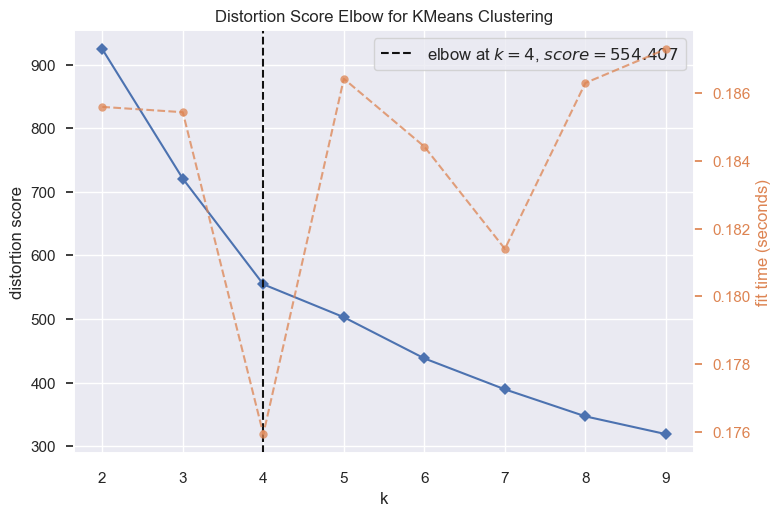

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1543]:
# Instantiate the clustering model and visualizer

km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(x_scale)        # Fit the data to the visualizer
visualizer.show() 

### Méthode Silhouette

In [1545]:
SK = range(2,9)
sil_score = []
for i in SK:
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(x_scale).labels_
    score = metrics.silhouette_score(x_scale,labels,metric="euclidean",sample_size=1000,random_state=200)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(x_scale,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.5223100175679003
Silhouette score for k(clusters) = 3 is 0.3099173780113493
Silhouette score for k(clusters) = 4 is 0.33680101972216564
Silhouette score for k(clusters) = 5 is 0.2843066282768034
Silhouette score for k(clusters) = 6 is 0.2904938406036297
Silhouette score for k(clusters) = 7 is 0.29970782021164977
Silhouette score for k(clusters) = 8 is 0.2879265198524834


In [1546]:
sil_center = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sil_center

Clusters  Sil Score
0         2       0.52
1         3       0.31
2         4       0.34
3         5       0.28
4         6       0.29
5         7       0.30
6         8       0.29

<Axes: xlabel='Clusters', ylabel='Sil Score'>

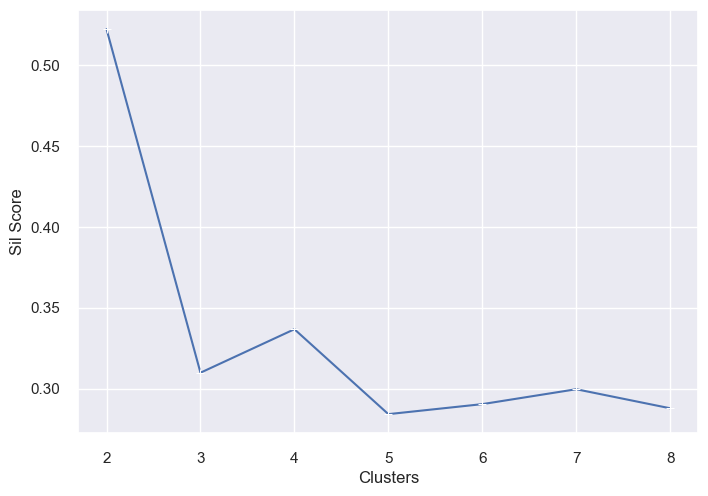

In [1547]:
sns.lineplot(x = 'Clusters', y = 'Sil Score', data = sil_center, marker="+")

### Projection avec 4 clusters (k= 4)

In [1549]:
pca = decomposition.PCA(n_components= 3).fit(x_scale)
Y_projected = pca.transform(x_scale)

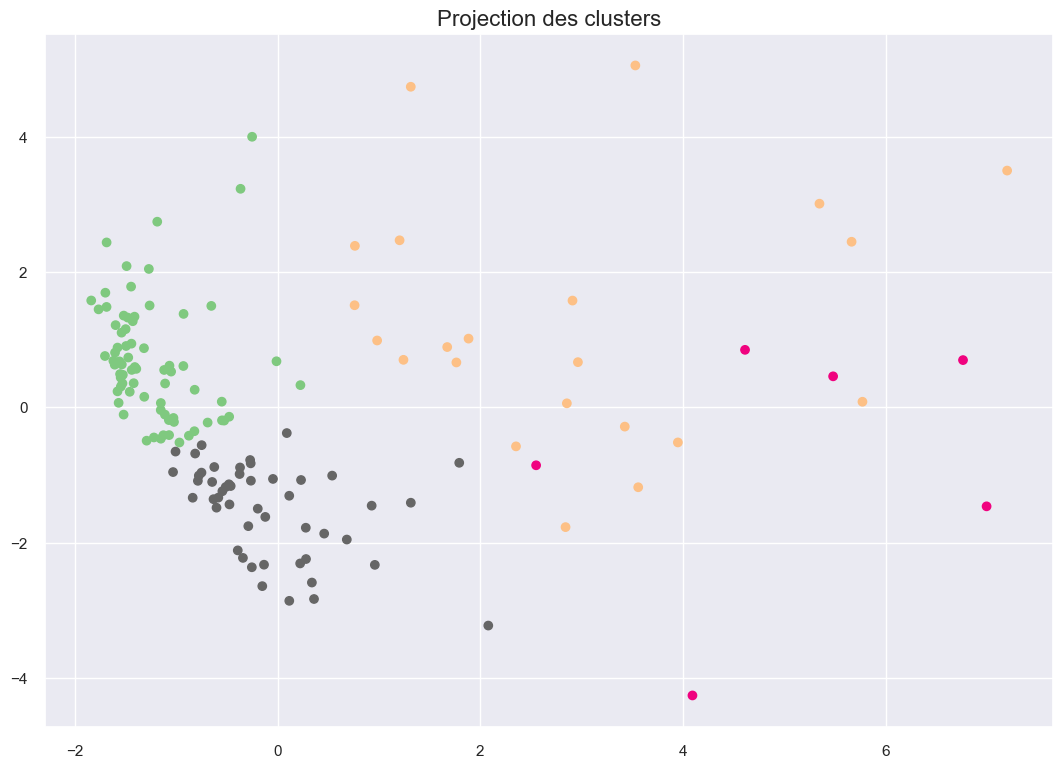

In [1550]:
model = KMeans(n_clusters= 4, random_state=3)
model.fit(x_scale)
clusters = model.labels_

plt.figure(figsize=(13,9))

# Affichage des points des clusters
plt.scatter(Y_projected[:, 0], Y_projected[:, 1], c=model.labels_, cmap='Accent')
plt.title('Projection des clusters', fontsize=16)

plt.show()

### Projection des centroids

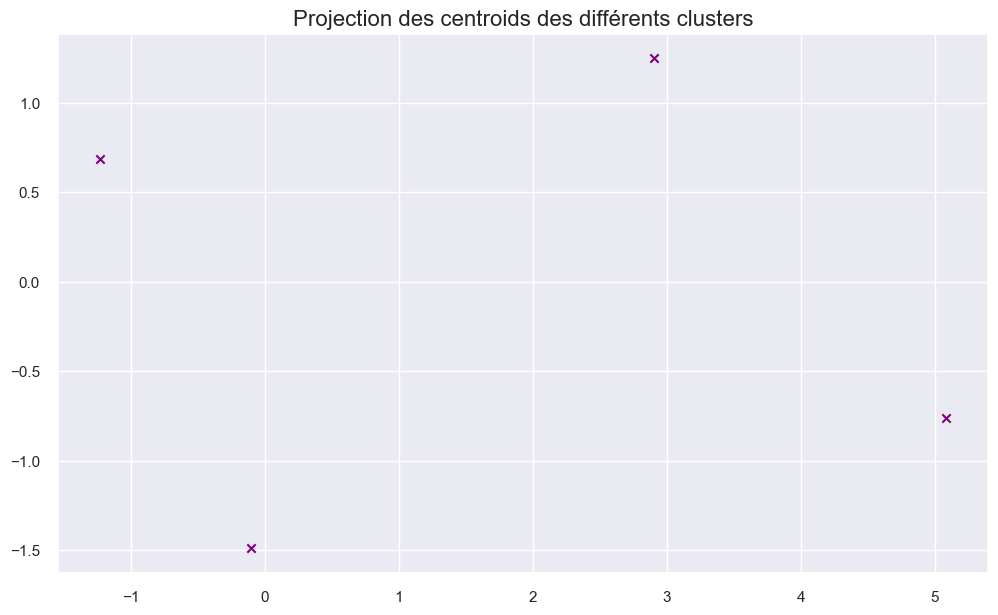

In [1552]:
centroids = model.cluster_centers_
centroids_projected = pca.transform(centroids)

# Affichage des centroids
plt.figure(figsize=(12,7))
plt.scatter(centroids_projected[:,0], centroids_projected[:,1], marker='x', c='purple')
plt.title('Projection des centroids des différents clusters', fontsize=16)
plt.show()

### Traçage des centroids avec le graphique

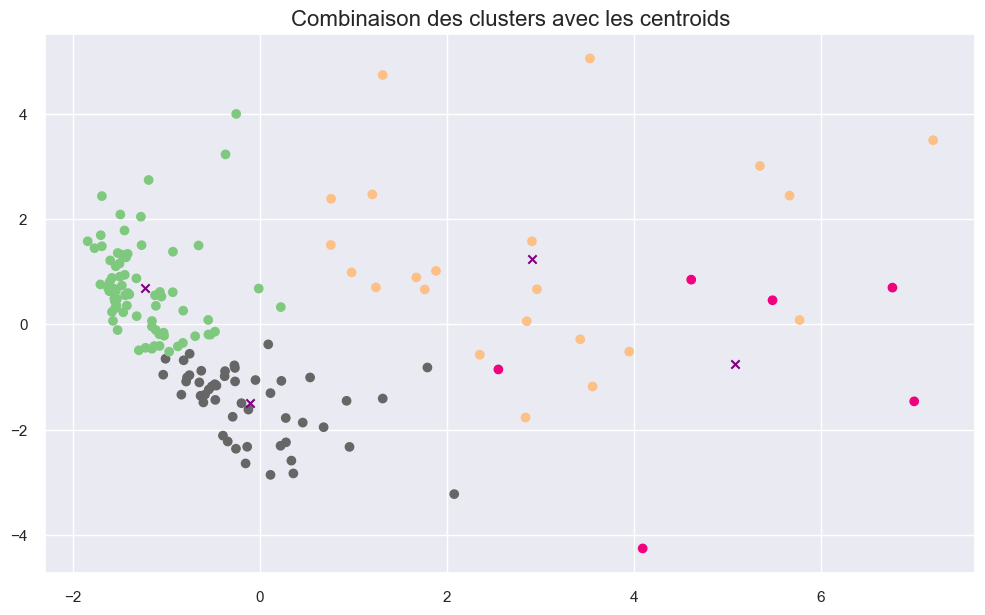

In [1554]:
# Combinaison des deux graphiques précédents
# Affichage des centroids
plt.figure(figsize=(12,7))

plt.scatter(Y_projected[:, 0], Y_projected[:, 1], c=model.labels_, cmap='Accent')
plt.scatter(centroids_projected[:,0], centroids_projected[:,1], marker='x', c='purple')
plt.title('Combinaison des clusters avec les centroids', fontsize=16)
plt.show()

In [1555]:
# Créér un nouveau DF avec les données du x_scale

df_scale_kmeans = pd.DataFrame(x_scale, columns= df_new.columns, index=df_new.index)

df_scale_kmeans.head()

croissance_annuelle  Stabilité politique  \
Zone                                                       
Afghanistan                   -0.40                -2.99   
Afrique du Sud                 0.16                -0.18   
Albanie                       -0.41                 0.55   
Algérie                       -0.17                -0.90   
Allemagne                      5.25                 0.77   

                Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                     
Afghanistan                                                 -1.22        
Afrique du Sud                                               1.25        
Albanie                                                     -0.15        
Algérie                                                     -0.87        
Allemagne                                                    0.08        

                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                       
Afghanistan                                                 -1.20          
Afrique du Sud                                               1.52          
Albanie                                                     -0.05          
Algérie                                                     -0.91          
Allemagne                                                    0.29          

                Disponibilité intérieure  Exportations - Quantité  Production  \
Zone                                                                            
Afghanistan                        -0.50                    -0.34       -0.52   
Afrique du Sud                      2.29                     0.09        1.78   
Albanie                            -0.51                    -0.33       -0.54   
Algérie                            -0.20                    -0.33       -0.18   
Allemagne                           1.78                     3.97        1.57   

                Importations - Quantité  Population  
Zone                                                 
Afghanistan                       -0.34        0.25  
Afrique du Sud                     0.09        0.76  
Albanie                           -0.33       -0.57  
Algérie                           -0.33        0.37  
Allemagne                          3.97        1.38

In [1556]:
# Regroupement des clusters modifiés

clusters = model.labels_
df_clusters = pd.DataFrame(index=[df_new.index])
df_clusters['Cluster'] = clusters
df_clusters = df_clusters.reset_index()
display(df_clusters.head())
df_clusters['Cluster'].value_counts()

Zone  Cluster
0     Afghanistan        0
1  Afrique du Sud        1
2         Albanie        3
3         Algérie        0
4       Allemagne        2

Cluster
0    73
3    49
1    22
2     6
Name: count, dtype: int64

In [1557]:
dfnew_kmeans = pd.merge(df_scale_kmeans, df_clusters, on='Zone')
display(dfnew_kmeans.head())

Zone  croissance_annuelle  Stabilité politique  \
0     Afghanistan                -0.40                -2.99   
1  Afrique du Sud                 0.16                -0.18   
2         Albanie                -0.41                 0.55   
3         Algérie                -0.17                -0.90   
4       Allemagne                 5.25                 0.77   

   Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                              -1.22        
1                                               1.25        
2                                              -0.15        
3                                              -0.87        
4                                               0.08        

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              -1.20          
1                                               1.52          
2                                              -0.05          
3                                              -0.91          
4                                               0.29          

   Disponibilité intérieure  Exportations - Quantité  Production  \
0                     -0.50                    -0.34       -0.52   
1                      2.29                     0.09        1.78   
2                     -0.51                    -0.33       -0.54   
3                     -0.20                    -0.33       -0.18   
4                      1.78                     3.97        1.57   

   Importations - Quantité  Population  Cluster  
0                    -0.34        0.25        0  
1                     0.09        0.76        1  
2                    -0.33       -0.57        3  
3                    -0.33        0.37        0  
4                     3.97        1.38        2

In [1558]:
# Utiliser la colonne Zone comme index désormais

dfnew_kmeans.set_index('Zone', inplace=True)

In [1559]:
# Calculer la moyenne de chaque cluster

dfnew_kmeans_mean = dfnew_kmeans.groupby('Cluster').agg(['mean'])

display(dfnew_kmeans_mean.head())

croissance_annuelle Stabilité politique  \
                       mean                mean   
Cluster                                           
0                     -0.35               -0.49   
1                      1.18               -0.24   
2                      1.65                0.48   
3                     -0.21                0.77   

        Disponibilité alimentaire en quantité (kg/personne/an)  \
                                                          mean   
Cluster                                                          
0                                                    -0.74       
1                                                     0.52       
2                                                     0.50       
3                                                     0.81       

        Disponibilité de protéines en quantité (g/personne/jour)  \
                                                            mean   
Cluster                                                            
0                                                    -0.75         
1                                                     0.51         
2                                                     0.71         
3                                                     0.81         

        Disponibilité intérieure Exportations - Quantité Production  \
                            mean                    mean       mean   
Cluster                                                               
0                          -0.43                   -0.32      -0.44   
1                           1.94                    0.20       1.90   
2                           0.73                    4.43       1.26   
3                          -0.33                   -0.16      -0.35   

        Importations - Quantité Population  
                           mean       mean  
Cluster                                     
0                         -0.32      -0.13  
1                          0.20       1.41  
2                          4.43       0.48  
3                         -0.16      -0.49

### Interpretation des clusters

Cluster 0 : index croissance annuelle négatif, index population négatif, index importation volailles négatif, index stabilité politique négatif

Cluster 1 : index population positif, index importation volailles positif, index stabilité politique positif, index croissance annuelle positif

Cluster 2 : index population positif, index importation volailles maximum, index stabilité politique positif, index croissance annuelle max

Cluster 3 : index population négatif, index importation volailles négatif, index stabilité politique positive, index croissance annuelle négatif

### Heatmap des clusters

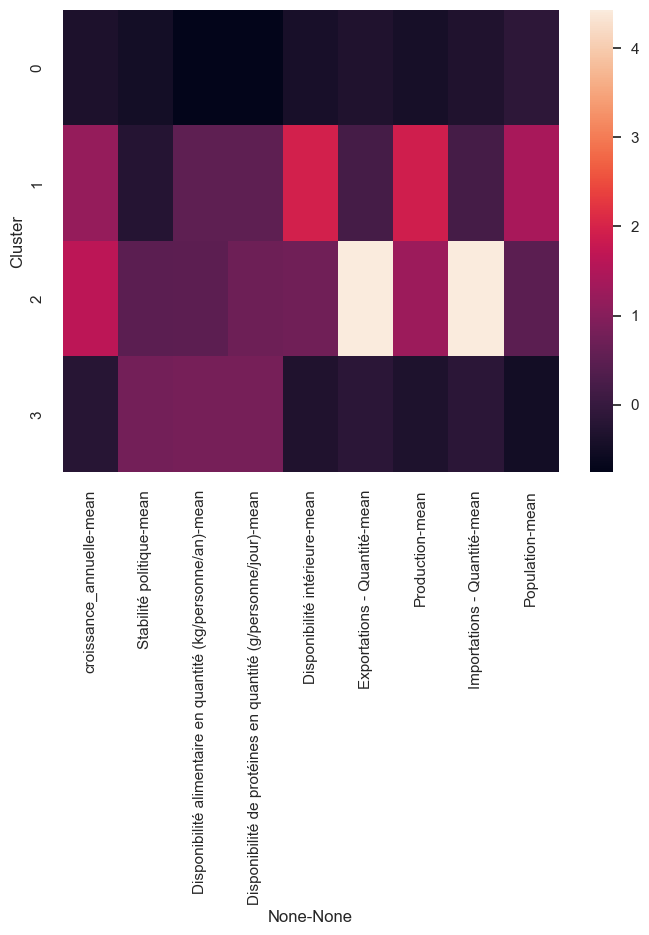

In [1562]:
plt.figure(figsize=(8, 6))
sns.heatmap(dfnew_kmeans_mean)
plt.show()

### Boxplot des clusters

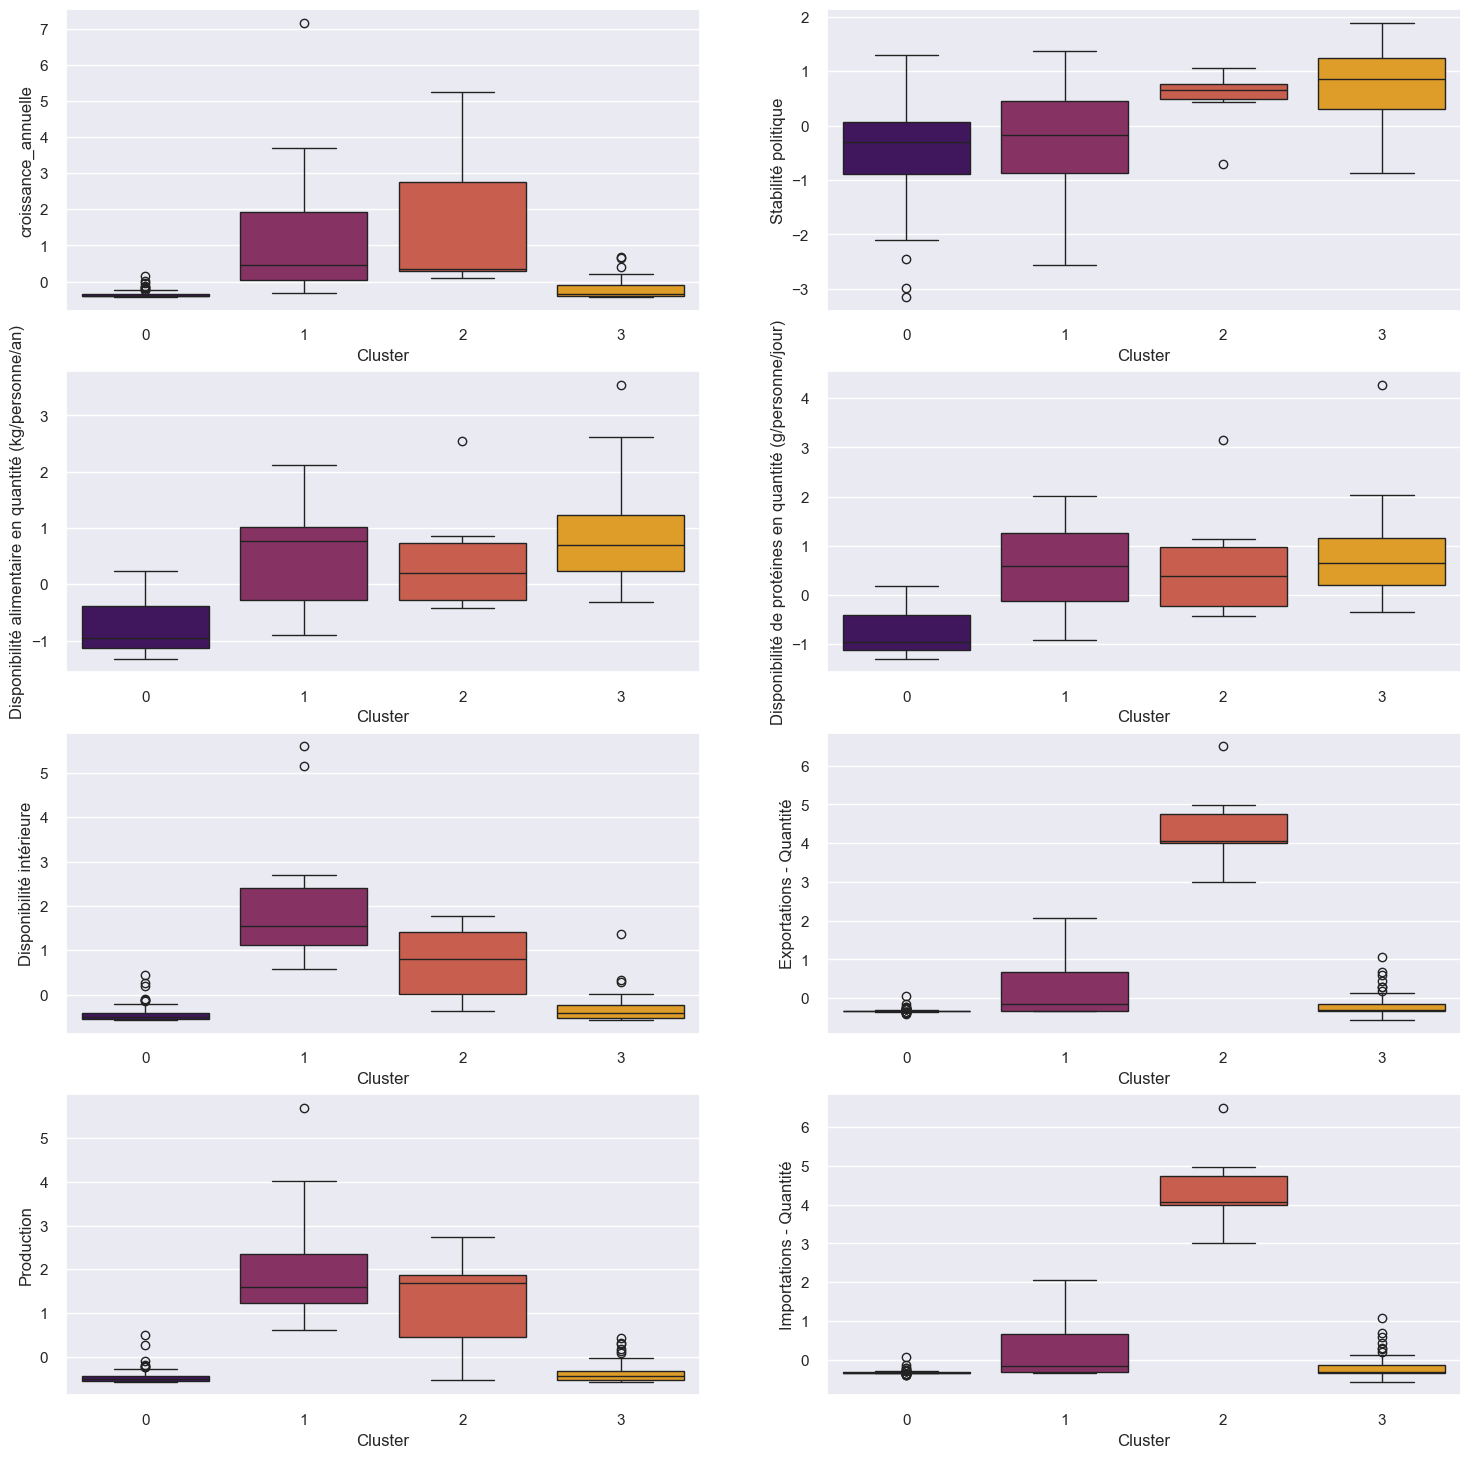

In [1564]:
fig, axes = plt.subplots(4, 2, figsize=(18,18))

for i in range(4):
    for j in range(2):
        sns.boxplot(ax=axes[i,j], 
                    data= dfnew_kmeans, 
                    x='Cluster', 
                    y=dfnew_kmeans.columns[0:-1][2*i+j], palette = "inferno")

plt.show()

### Radar chart des clusters

In [1566]:
cluster_kmeans_list = []

# Création d'une boucle pour stocker les informations de chaque cluster dans un df
for i in range(4):
    cluster_df_kmeans = pd.DataFrame({
        f'Cluster {i} Col A': dfnew_scaled_clust.columns[0:-1],
        f'Cluster {i} Col B': dfnew_kmeans_mean.iloc[i].values
    })
    cluster_kmeans_list.append(cluster_df_kmeans)

# Concaténation des df
cluster_df_kmeans_concat = pd.concat(cluster_kmeans_list, axis=1)
    
cluster_df_kmeans_concat

Cluster 0 Col A  Cluster 0 Col B  \
0                                croissance_annuelle            -0.35   
1                                Stabilité politique            -0.49   
2  Disponibilité alimentaire en quantité (kg/pers...            -0.74   
3  Disponibilité de protéines en quantité (g/pers...            -0.75   
4                           Disponibilité intérieure            -0.43   
5                            Exportations - Quantité            -0.32   
6                                         Production            -0.44   
7                            Importations - Quantité            -0.32   
8                                         Population            -0.13   

                                     Cluster 1 Col A  Cluster 1 Col B  \
0                                croissance_annuelle             1.18   
1                                Stabilité politique            -0.24   
2  Disponibilité alimentaire en quantité (kg/pers...             0.52   
3  Disponibilité de protéines en quantité (g/pers...             0.51   
4                           Disponibilité intérieure             1.94   
5                            Exportations - Quantité             0.20   
6                                         Production             1.90   
7                            Importations - Quantité             0.20   
8                                         Population             1.41   

                                     Cluster 2 Col A  Cluster 2 Col B  \
0                                croissance_annuelle             1.65   
1                                Stabilité politique             0.48   
2  Disponibilité alimentaire en quantité (kg/pers...             0.50   
3  Disponibilité de protéines en quantité (g/pers...             0.71   
4                           Disponibilité intérieure             0.73   
5                            Exportations - Quantité             4.43   
6                                         Production             1.26   
7                            Importations - Quantité             4.43   
8                                         Population             0.48   

                                     Cluster 3 Col A  Cluster 3 Col B  
0                                croissance_annuelle            -0.21  
1                                Stabilité politique             0.77  
2  Disponibilité alimentaire en quantité (kg/pers...             0.81  
3  Disponibilité de protéines en quantité (g/pers...             0.81  
4                           Disponibilité intérieure            -0.33  
5                            Exportations - Quantité            -0.16  
6                                         Production            -0.35  
7                            Importations - Quantité            -0.16  
8                                         Population            -0.49

In [1567]:
# Création d'une boucle pour générer les 8 radar charts à travers les informations récupérées dans "cluster_kmeans_list"
for i, cluster_df_kmeans in enumerate(cluster_kmeans_list):
    theta = cluster_df_kmeans[f'Cluster {i} Col A'].values
    values = cluster_df_kmeans[f'Cluster {i} Col B'].values
    fig = px.line_polar(cluster_df_kmeans, 
                        r=f'Cluster {i} Col B', 
                        theta=f'Cluster {i} Col A', 
                        line_close=True,
                        start_angle=90,
                        range_r=[-1, 5],
                        title=f'Cluster {i}')
    fig.show()

In [1568]:
fig = go.Figure()

for i, cluster_df_kmeans in enumerate(cluster_kmeans_list):
    theta = cluster_df_kmeans[f'Cluster {i} Col A'].values
    values = cluster_df_kmeans[f'Cluster {i} Col B'].values
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=theta,
        fill='toself',
        name=f'Cluster {i}'
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[-1, 5]
        )),
    showlegend=True
)

fig.show()

In [1569]:
df_cluster_2 = dfnew_kmeans.loc[dfnew_kmeans['Cluster'] == 2, :]
display(df_cluster_2)

croissance_annuelle  Stabilité politique  \
Zone                                                                 
Allemagne                                5.25                 0.77   
Belgique                                 0.35                 0.61   
Chine - RAS de Hong-Kong                 0.10                 1.05   
France                                   3.56                 0.44   
Pologne                                  0.38                 0.71   
Thaïlande                                0.27                -0.71   

                          Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                               
Allemagne                                                              0.08        
Belgique                                                              -0.41        
Chine - RAS de Hong-Kong                                               2.54        
France                                                                 0.33        
Pologne                                                                0.86        
Thaïlande                                                             -0.39        

                          Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                                 
Allemagne                                                              0.29          
Belgique                                                              -0.39          
Chine - RAS de Hong-Kong                                               3.15          
France                                                                 0.49          
Pologne                                                                1.13          
Thaïlande                                                             -0.44          

                          Disponibilité intérieure  Exportations - Quantité  \
Zone                                                                          
Allemagne                                     1.78                     3.97   
Belgique                                     -0.37                     4.04   
Chine - RAS de Hong-Kong                     -0.20                     4.09   
France                                        1.56                     3.01   
Pologne                                       0.99                     6.50   
Thaïlande                                     0.62                     4.97   

                          Production  Importations - Quantité  Population  \
Zone                                                                        
Allemagne                       1.57                     3.97        1.38   
Belgique                        0.09                     4.04       -0.36   
Chine - RAS de Hong-Kong       -0.53                     4.09       -0.46   
France                          1.90                     3.01        0.95   
Pologne                         2.74                     6.50        0.29   
Thaïlande                       1.79                     4.97        1.05   

                          Cluster  
Zone                               
Allemagne                       2  
Belgique                        2  
Chine - RAS de Hong-Kong        2  
France                          2  
Pologne                         2  
Thaïlande                       2

### Retrouver les valeurs originales des pays sélectionnés (cluster 2)

In [1571]:
Pays = ['Allemagne', 'Belgique', 'Chine - RAS de Hong-Kong', 'France', 'Pologne', 'Thaïlande']

# Retrouver les valeurs originales des pays sélectionnés

df_Pays_selectionnes = df.filter(Pays, axis=0)
df_Pays_selectionnes 

croissance_annuelle  Stabilité politique  \
Allemagne                          3690849.15                 0.57   
Belgique                            502764.72                 0.42   
Chine - RAS de Hong-Kong            341271.10                 0.82   
France                             2595151.05                 0.27   
Pologne                             524641.21                 0.51   
Thaïlande                           456356.87                -0.75   

                          Disponibilité alimentaire en quantité (kg/personne/an)  \
Allemagne                                                             19.47        
Belgique                                                              12.65        
Chine - RAS de Hong-Kong                                              53.51        
France                                                                22.90        
Pologne                                                               30.30        
Thaïlande                                                             12.95        

                          Disponibilité de protéines en quantité (g/personne/jour)  \
Allemagne                                                              7.96          
Belgique                                                               4.57          
Chine - RAS de Hong-Kong                                              22.26          
France                                                                 8.95          
Pologne                                                               12.14          
Thaïlande                                                              4.35          

                          Disponibilité intérieure  Exportations - Quantité  \
Allemagne                               1739000.00                646000.00   
Belgique                                 152000.00                656000.00   
Chine - RAS de Hong-Kong                 280000.00                663000.00   
France                                  1573000.00                501000.00   
Pologne                                 1156000.00               1025000.00   
Thaïlande                                881000.00                796000.00   

                          Importations - Quantité  Prod_moyenne_par_personne  \
Allemagne                            646000000.00                       0.02   
Belgique                             656000000.00                       0.04   
Chine - RAS de Hong-Kong             663000000.00                       0.00   
France                               501000000.00                       0.03   
Pologne                             1025000000.00                       0.06   
Thaïlande                            796000000.00                       0.02   

                          Production  Dispo_int_par_personne  \
Allemagne                 1514000.00                    0.02   
Belgique                   463000.00                    0.01   
Chine - RAS de Hong-Kong    24000.00                    0.04   
France                    1750000.00                    0.02   
Pologne                   2351000.00                    0.03   
Thaïlande                 1676000.00                    0.01   

                          Nourriture_par_personne  Population  
Allemagne                                    0.02 82658000.00  
Belgique                                     0.01 11419000.00  
Chine - RAS de Hong-Kong                     0.05  7306000.00  
France                                       0.02 64842000.00  
Pologne                                      0.03 37953000.00  
Thaïlande                                    0.01 69209000.00

In [1572]:
import folium

pays = ['Allemagne','Belgique', 'Chine - RAS de Hong-Kong', 'France','Pologne', 'Thaïlande']

# Coordonnées des pays sélectionnés
coordinates = {
    'Allemagne': [51.1657, 10.4515],
    'Belgique': [50.5039, 4.4699],
    'Chine - RAS de Hong-Kong': [22.3193, 114.1694],
    'France': [46.2276, 2.2137],
    'Pologne': [51.9194, 19.1451],
    'Thaïlande': [15.8700, 100.9925]
}

map = folium.Map(location=[0, 0], zoom_start=2)

# Ajout des pays sélectionnés avec un point
for country in countries:
    folium.CircleMarker(
        location=coordinates[country],
        radius=3,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7
    ).add_to(map)

# Affichage de la carte
map